In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import train_test_split
from sklearn.model_selection import train_test_split
#import standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [27]:

def extract_data(path_excel):
    data=pd.read_excel(path_excel)
    print(data.info())
    #convert zero values to nan
    data=data.replace(0,np.nan)
    print(data.isna().sum())
    #convert two words separated by space combined with '_'
    data.columns=data.columns.str.replace(' ','_')
    #convert two words separated by . combined with '_'
    data.columns=data.columns.str.replace('.','_')
    #check names of columns
    print(data.columns)
    coll=['Well','Date','Hours_Online','Freq', 'Ampere', 'Volt',
           'Press_Discharge','TM', 'Vibration', 'Gross_Rate']
    df=data[coll]
    #save data to csv
    df.to_csv('/Users/rianrachmanto/pypro/data/esp_new_02.csv',index=False)
    print(df.info())
    return df


In [28]:
path_excel='/Users/rianrachmanto/pypro/data/New_Data_ESP_CE.xlsx'
data=extract_data(path_excel)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203137 entries, 0 to 203136
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Well             203137 non-null  object        
 1   Date             203137 non-null  datetime64[ns]
 2   Hours Online     176278 non-null  float64       
 3   Surf. Choke      90240 non-null   float64       
 4   Freq             79738 non-null   float64       
 5   Ampere           83424 non-null   float64       
 6   Volt             76175 non-null   float64       
 7   BHP              61936 non-null   float64       
 8   Press_Discharge  57721 non-null   float64       
 9   THP              94742 non-null   float64       
 10  CSG              93534 non-null   float64       
 11  BSW              93352 non-null   float64       
 12  Gross Rate       166647 non-null  float64       
 13  Net Oil          166640 non-null  object        
 14  Form. Gas        165

/var/folders/r_/0zt7_hb10179rdt5t_5rl9t80000gn/T/ipykernel_6769/5236766.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns=data.columns.str.replace('.','_')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203137 entries, 0 to 203136
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Well             203137 non-null  object        
 1   Date             203137 non-null  datetime64[ns]
 2   Hours_Online     91376 non-null   float64       
 3   Freq             79732 non-null   float64       
 4   Ampere           83421 non-null   float64       
 5   Volt             76173 non-null   float64       
 6   Press_Discharge  57705 non-null   float64       
 7   TM               39808 non-null   float64       
 8   Vibration        36182 non-null   float64       
 9   Gross_Rate       85469 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 15.5+ MB
None


In [29]:
def load_data(path_csv):
    df=pd.read_csv(path_csv)
    print(df.info())
    print(df.shape)
    train,test=train_test_split(df,test_size=0.2,random_state=42)
    print('train shape:',train.shape)
    print('test shape:',test.shape)
    return train,test

In [30]:
path_csv='/Users/rianrachmanto/pypro/data/esp_new_02.csv'
train,test=load_data(path_csv)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203137 entries, 0 to 203136
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Well             203137 non-null  object 
 1   Date             203137 non-null  object 
 2   Hours_Online     91376 non-null   float64
 3   Freq             79732 non-null   float64
 4   Ampere           83421 non-null   float64
 5   Volt             76173 non-null   float64
 6   Press_Discharge  57705 non-null   float64
 7   TM               39808 non-null   float64
 8   Vibration        36182 non-null   float64
 9   Gross_Rate       85469 non-null   float64
dtypes: float64(8), object(2)
memory usage: 15.5+ MB
None
(203137, 10)
train shape: (162509, 10)
test shape: (40628, 10)


In [31]:
def eda(train):
    print('Number of Missing Values',train.isna().sum())
    numeric_columns=['Freq', 'Ampere', 'Volt', 'Press_Discharge', 'TM', 'Vibration']
    #plotting histogram for each numeric columns, with scale X adjusted with number of bins
    for col in numeric_columns:
        plt.hist(train[col],bins=20)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title('Histogram of '+col)
        plt.show()

Number of Missing Values Well                    0
Date                    0
Hours_Online        89273
Freq                98619
Ampere              95729
Volt               101449
Press_Discharge    116241
TM                 130606
Vibration          133548
Gross_Rate          94071
dtype: int64


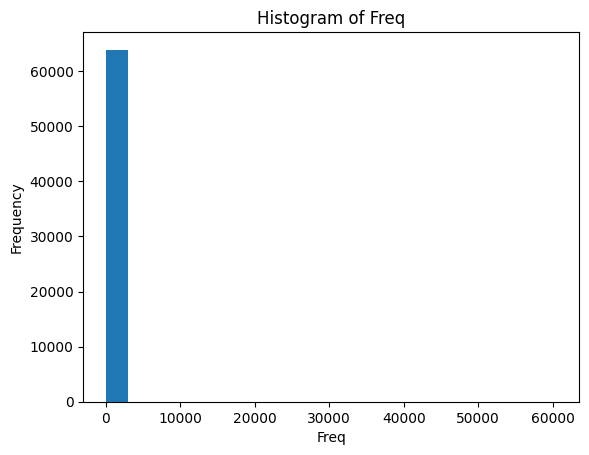

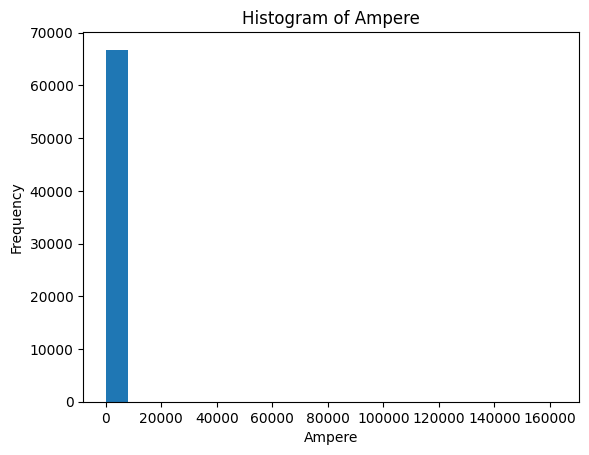

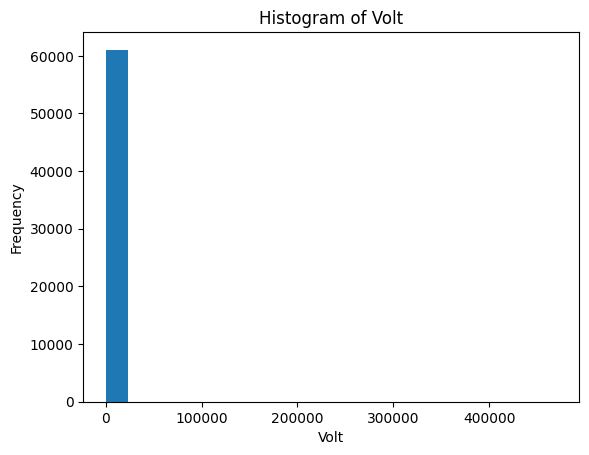

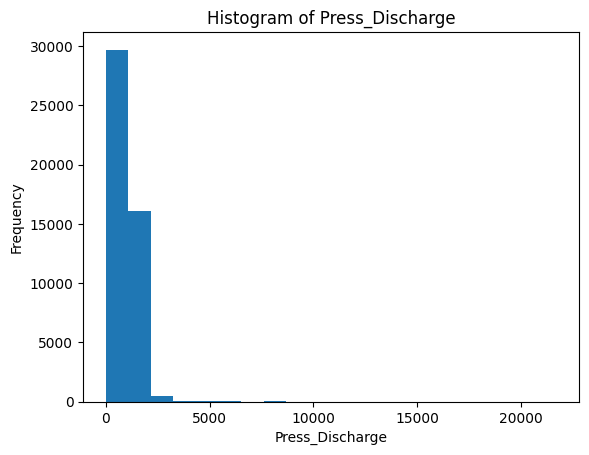

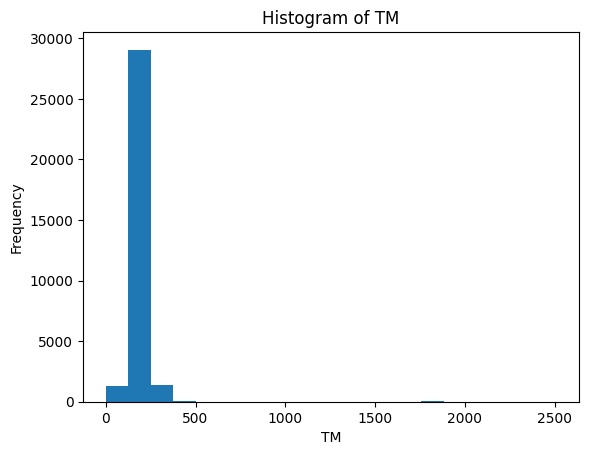

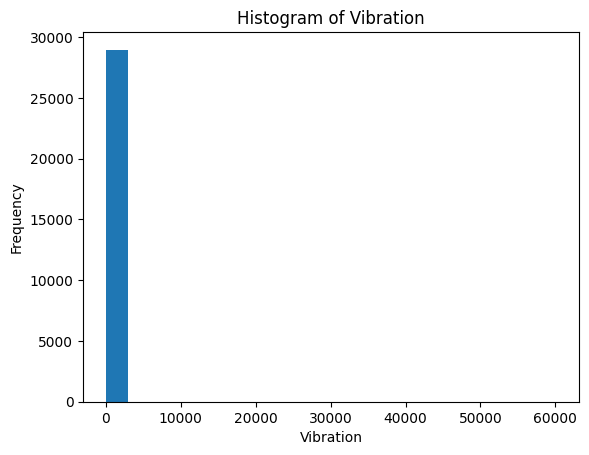

In [32]:
eda(train)

In [33]:
def clean_train(train):
    # Drop missing values
    train = train.dropna()
    # Check missing values
    print('Number of Missing Values:', train.isna().sum())
    # Check shape of data
    print('Train shape:', train.shape)
    print('Train info:', train.info())
    return train  # Return the cleaned DataFrame

def clean_test(test):
    # Drop missing values
    test = test.dropna()
    # Check missing values
    print('Number of Missing Values:', test.isna().sum())
    # Check shape of data
    print('Test shape:', test.shape)
    return test  # Return the cleaned DataFrame


In [34]:
train=clean_train(train)
test=clean_test(test)

Number of Missing Values: Well               0
Date               0
Hours_Online       0
Freq               0
Ampere             0
Volt               0
Press_Discharge    0
TM                 0
Vibration          0
Gross_Rate         0
dtype: int64
Train shape: (23259, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23259 entries, 10574 to 131932
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Well             23259 non-null  object 
 1   Date             23259 non-null  object 
 2   Hours_Online     23259 non-null  float64
 3   Freq             23259 non-null  float64
 4   Ampere           23259 non-null  float64
 5   Volt             23259 non-null  float64
 6   Press_Discharge  23259 non-null  float64
 7   TM               23259 non-null  float64
 8   Vibration        23259 non-null  float64
 9   Gross_Rate       23259 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.0+ MB
Train in

In [35]:
def preprocess(train):
    # standardize the data
    scaler = StandardScaler()
    numeric_columns = ['Freq', 'Ampere', 'Volt', 'Press_Discharge', 'TM', 'Vibration']
    train_scaled = scaler.fit_transform(train[numeric_columns])
    train_scaled = pd.DataFrame(train_scaled, columns=numeric_columns)
    print(train_scaled.head())
    return train_scaled

In [36]:
# Assuming clean_train is defined correctly as a DataFrame
train_scaled = preprocess(train)

       Freq    Ampere      Volt  Press_Discharge        TM  Vibration
0 -0.377424 -0.046480 -0.023954        -0.710814 -0.320807   0.023742
1  0.369624  0.006979  0.015297         0.409312  0.259872  -0.008441
2  0.220214  0.131717  0.008161         0.766119 -0.170107  -0.007361
3  0.294919 -0.022096 -0.024927         0.139488  0.757597  -0.010454
4 -0.078605 -0.016468  0.000375        -0.767619  0.481083  -0.007108


In [37]:
def apply_pca(train_scaled, feature_names, visualize=False):
    # Apply PCA with 3 components
    pca = PCA(n_components=4)
    principalComponents = pca.fit_transform(train_scaled)
    principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2','PC3','PC4'])
    print('Explained Variance Ratio:', pca.explained_variance_ratio_)
    
    # Extract and display loadings
    loadings = pca.components_.T
    loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3','PC4'], index=feature_names)
    print("Loadings:\n", loadings_df)
    
    if visualize:
        # Visualization: PCA Biplot for PC1 and PC2
        plt.figure(figsize=(10, 7))
        plt.scatter(principalDf['PC1'], principalDf['PC2'], alpha=0.3)  # Plotting data points
        
        # Adding feature vectors for PC1 and PC2
        for i, v in enumerate(loadings):
            plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, linewidth=2, color='red')
            plt.text(v[0]*1.2, v[1]*1.2, feature_names[i], color='black')
        
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.title("PCA Biplot with Loadings (PC1 vs PC2)")
        plt.grid(True)
        plt.axis('equal')  # Equal scaling for both axes
        plt.show()
    
    return principalDf

# Usage example, assuming 'data_scaled' is your standardized data and 'feature_names' are column names
# train_scaled = scaler.fit_transform(data)  # Assuming the data has already been scaled
# apply_pca(train_scaled, data.columns, visualize=True)


Explained Variance Ratio: [0.17520744 0.16820757 0.16677687 0.16644338]
Loadings:
                       PC1       PC2       PC3       PC4
Freq             0.307739  0.713080 -0.061438 -0.003354
Ampere           0.212145 -0.185322 -0.244978  0.882308
Volt             0.023208  0.451770 -0.505260  0.140990
Press_Discharge  0.615276 -0.419934 -0.007185 -0.056982
TM               0.693625  0.100851  0.135424 -0.217782
Vibration       -0.008488  0.257994  0.813961  0.388545


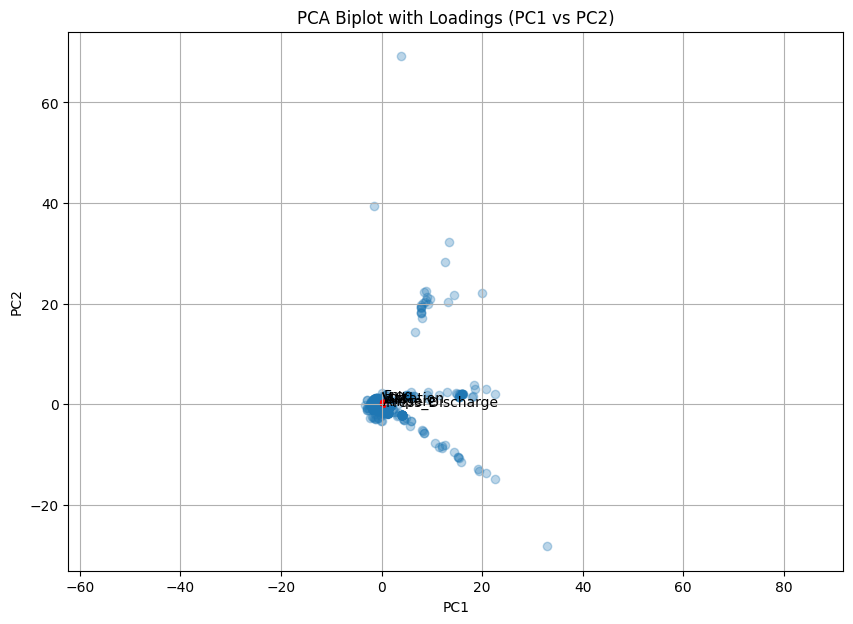

In [38]:
principalDF=apply_pca(train_scaled,train_scaled.columns,visualize=True)

In [39]:
def elbow_method(principalDF):
    distortions = []
    K = range(1, 11)

    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=5)
        kmeanModel.fit(principalDF)
        distortions.append(kmeanModel.inertia_)

    plt.figure(figsize=(16, 8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal k')
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

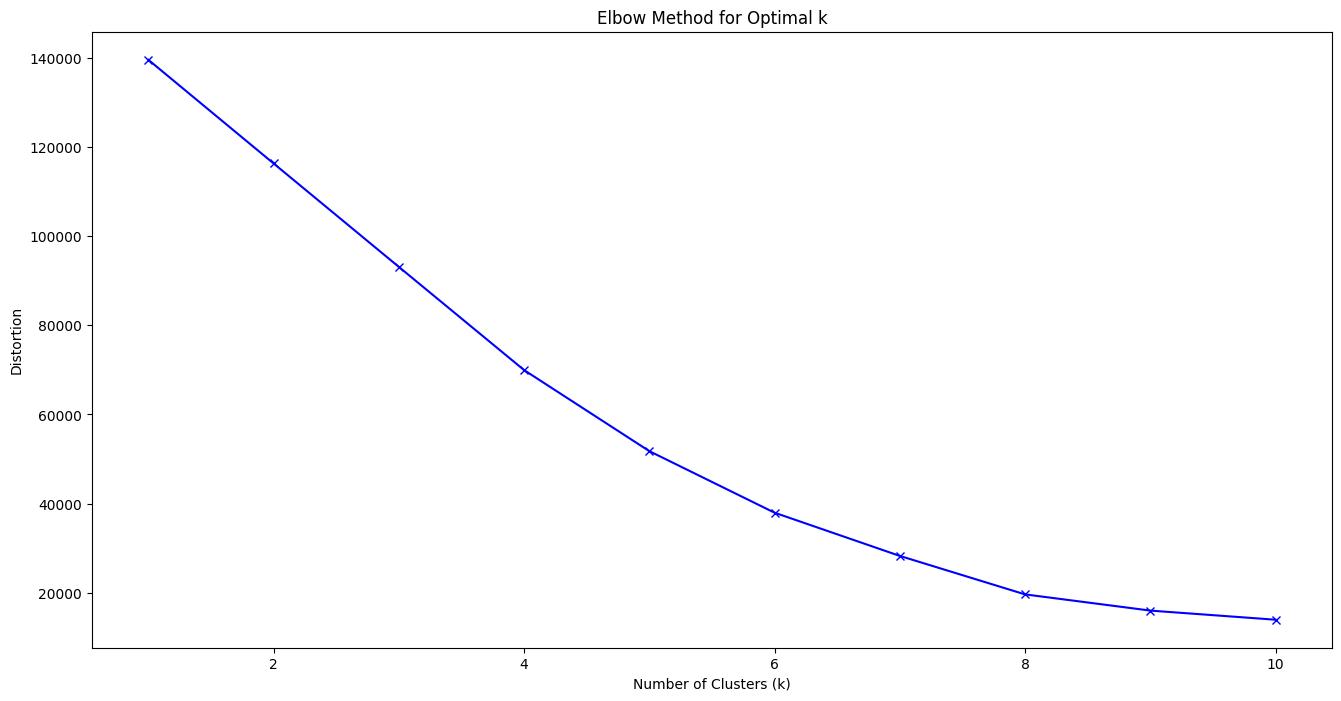

In [40]:
elbow_method(train_scaled)

In [41]:
# Assuming principalComponents is your PCA result with the necessary components
def make_cluster(principalDF):
    # Assuming principalDF is a DataFrame with PCA results
    kmeans = KMeans(n_clusters=4, random_state=0)  # Adjust the number of clusters as necessary
    clusters = kmeans.fit_predict(principalDF[['PC1', 'PC2','PC3','PC4']])  # Use all available principal components

    # Plot the clusters
    plt.scatter(principalDF['PC1'], principalDF['PC2'], c=clusters, cmap='viridis')  # Plot based on PC1 and PC2 for visualization
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)  # Cluster centers
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Clusters')
    plt.show()

    # Return the DataFrame with clusters
    principalDF['cluster'] = clusters
    return principalDF

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


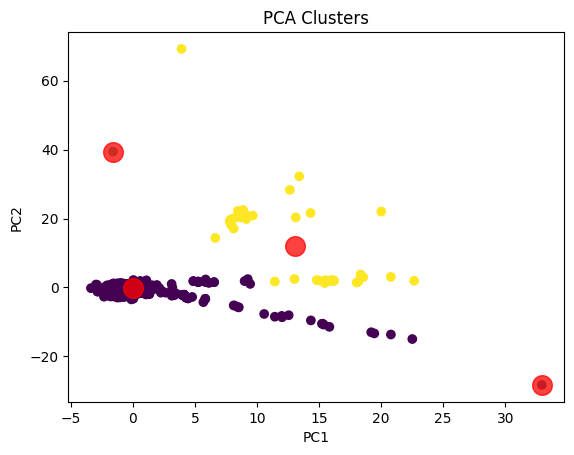

In [42]:
principalDF=make_cluster(principalDF)

In [43]:
#print unique values of well from train, and make a dictionary
well_dict=train['Well'].unique()
print(well_dict)

['BS3' 'MHN-6' 'YN-8SI' 'MHNW-2' 'MHN-8' 'MHN-2' 'BC1' 'YN-12SI'
 'YKN-24HZ' 'MHNW-1' 'MHN-5' 'YN-11SI' 'YN-17HZ' 'MHNW-3' 'YCA-8HZ'
 'MHN-7' 'BC2' 'MHN-13' 'YWB-15' 'YCA-7HZ' 'YN-7SI' 'MHN-3' 'YKN-23HZ'
 'MHN-9' 'YCB-9SI' 'MHN-4' 'YCA-11HZ' 'YW-1' 'YCA-10HZ' 'YN-10SI'
 'YN-16HZ' 'YCB-2HZ' 'YW-8SI' 'YO-4A' 'YCB-8HZ']


In [44]:
#plot line plot with x as date y as Freq of each unique well one by one and set the figsize
def plot_freq(train,well_dict):
    for well in well_dict:
        df=train[train['Well']==well]
        plt.figure(figsize=(15,20))
        plt.plot(df['Date'],df['Freq'])
        plt.xlabel('Date')
        plt.ylabel('Freq')
        plt.title('Well '+well)
        plt.show()

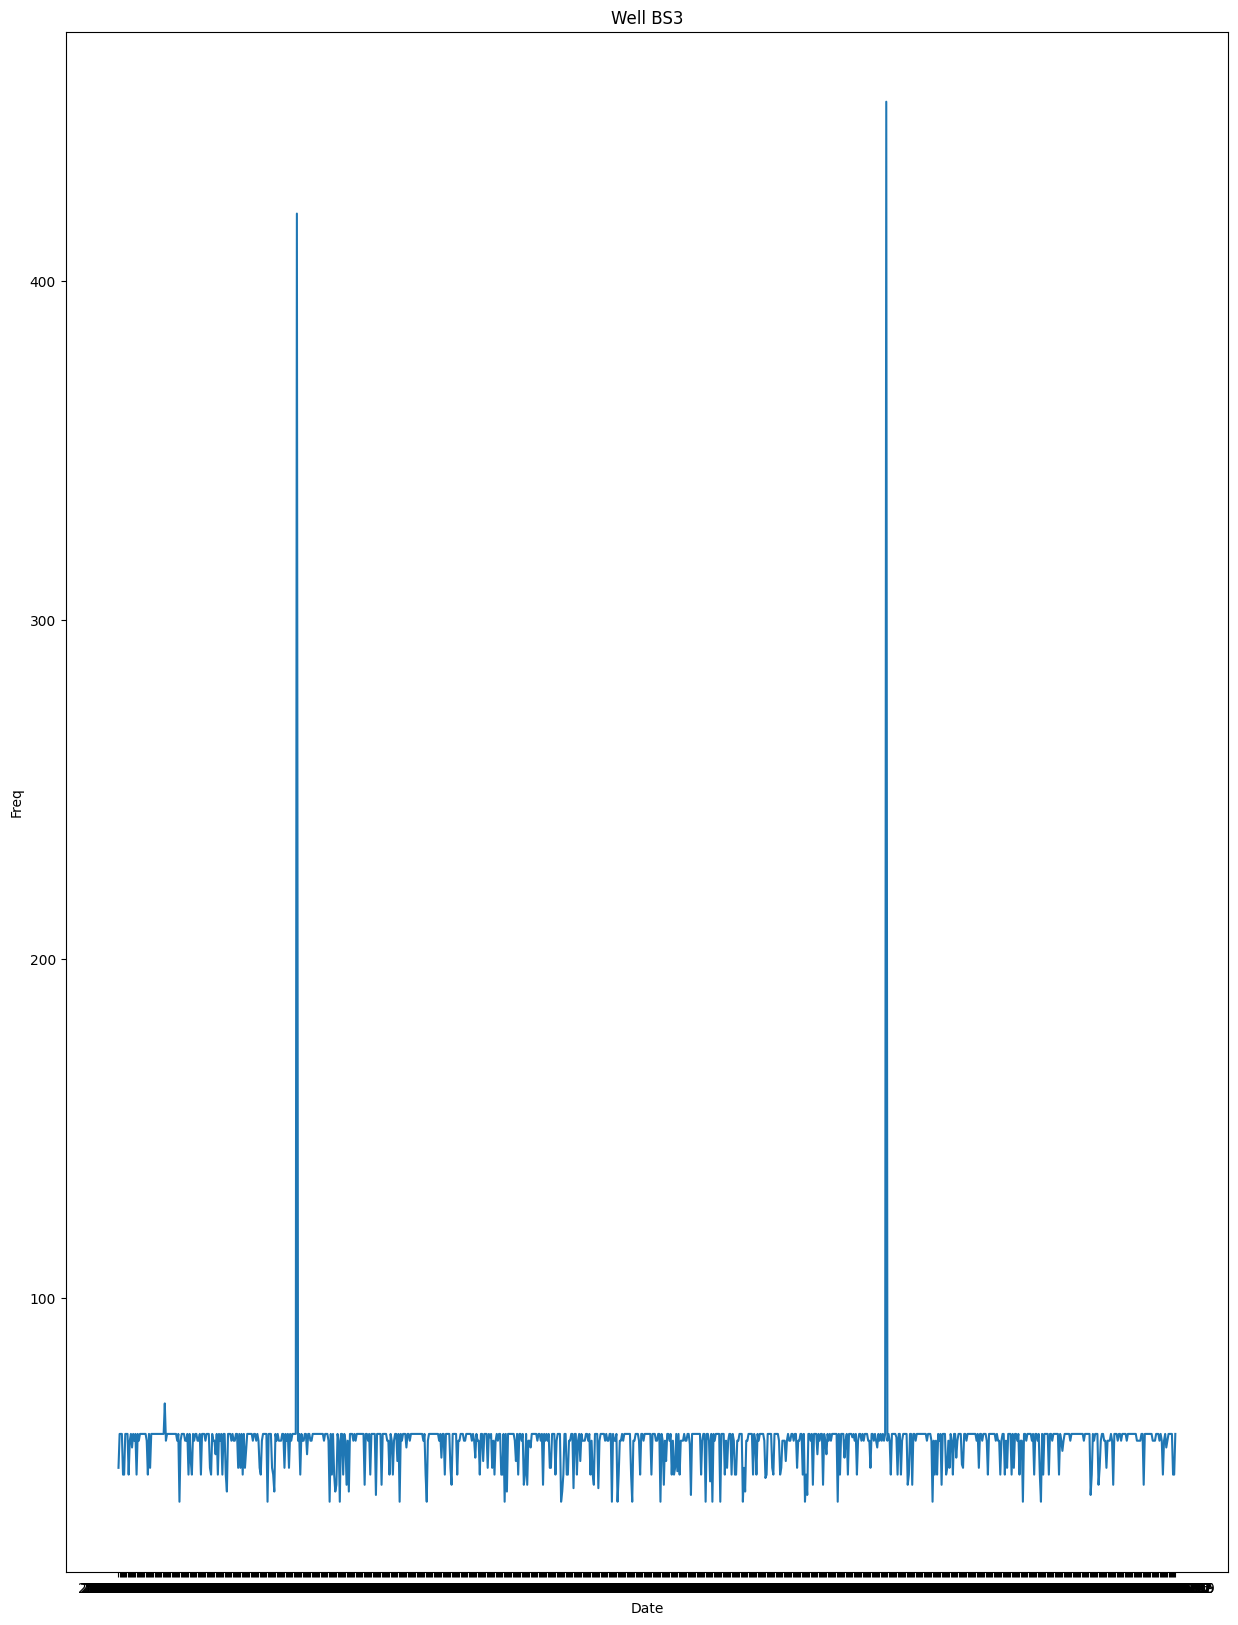

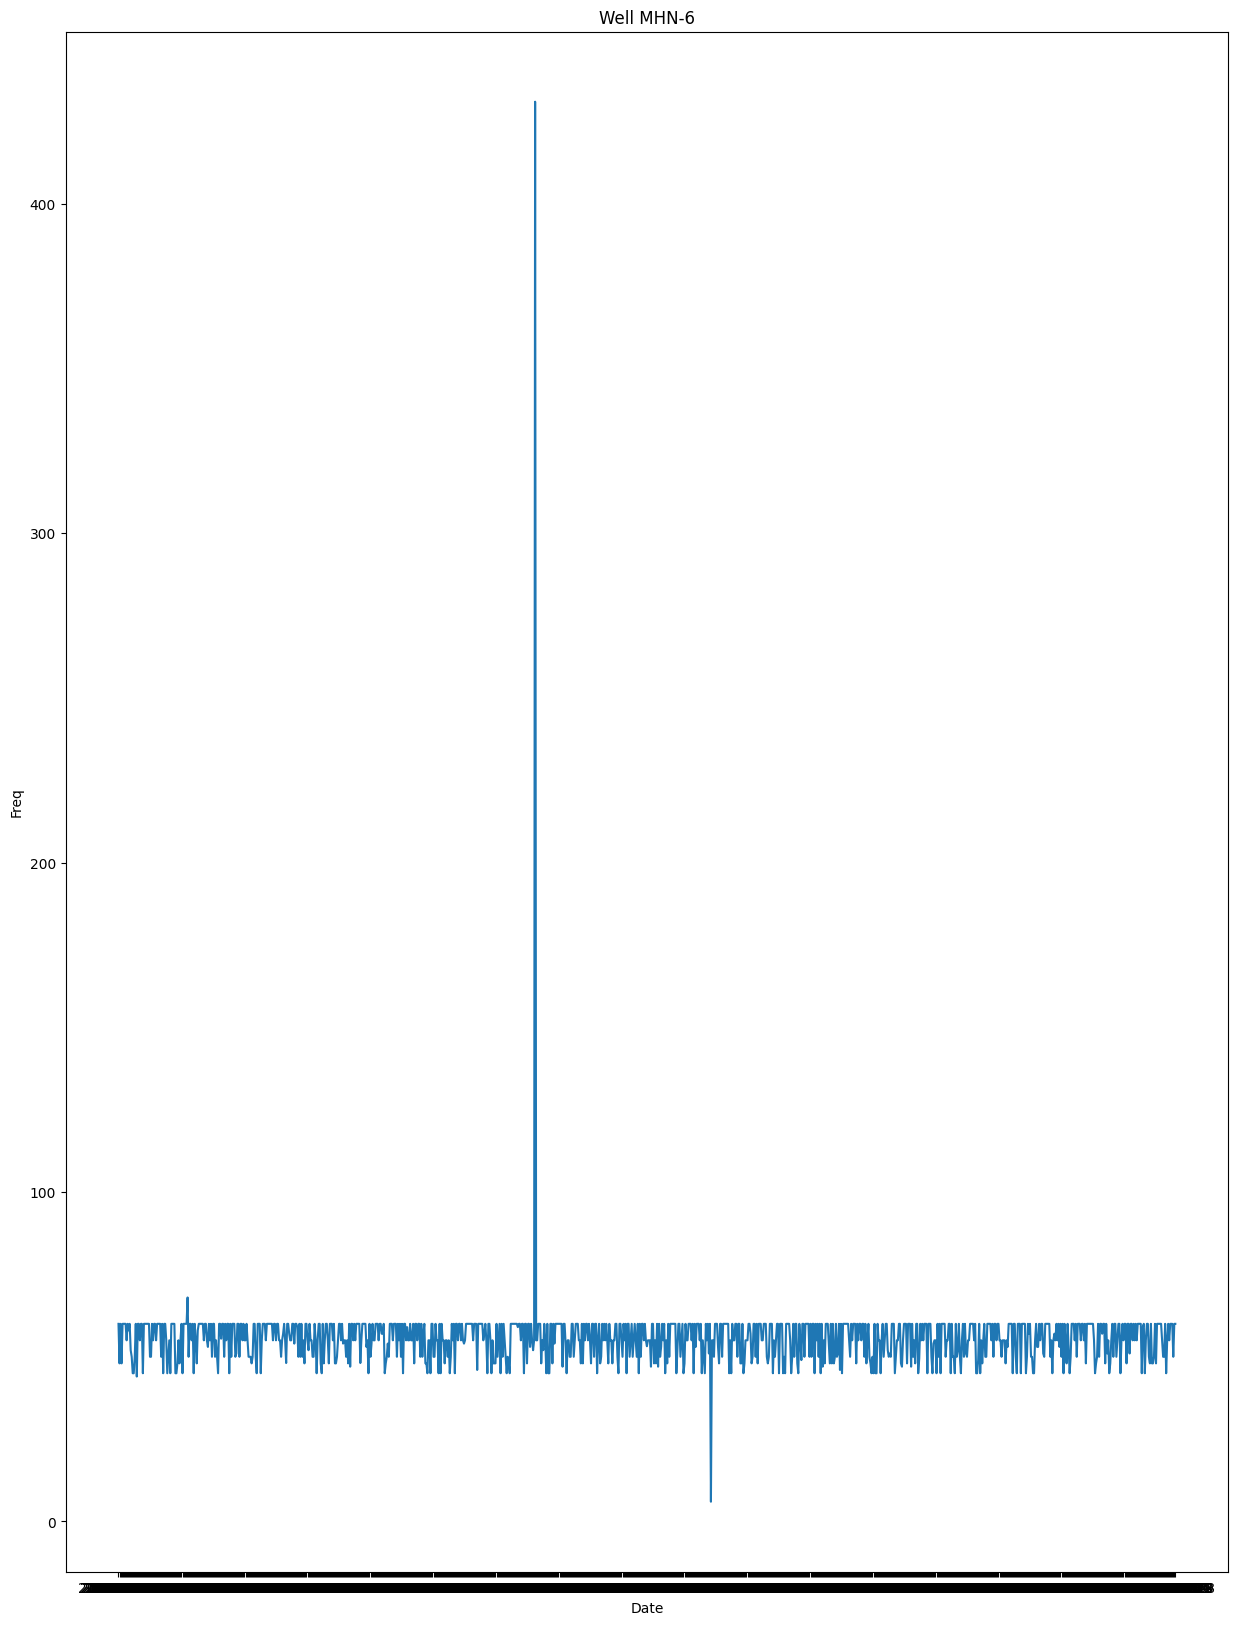

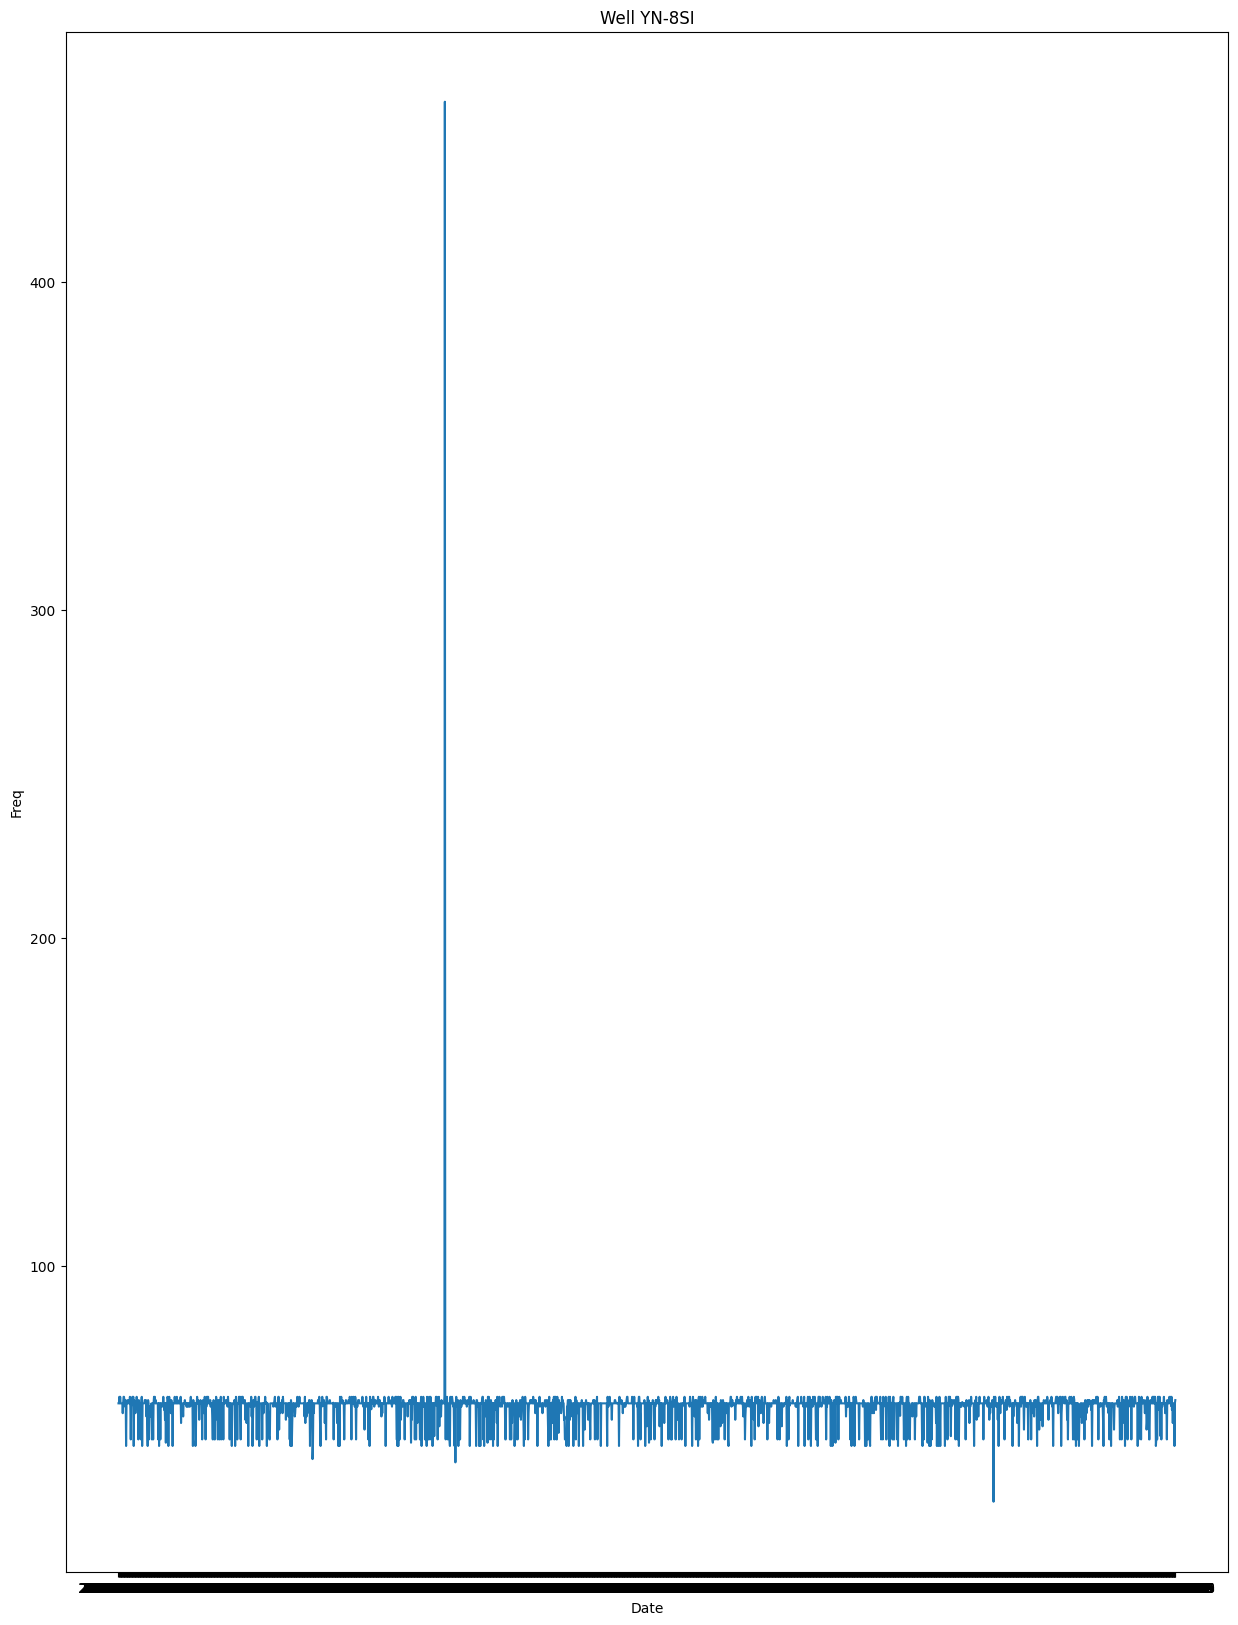

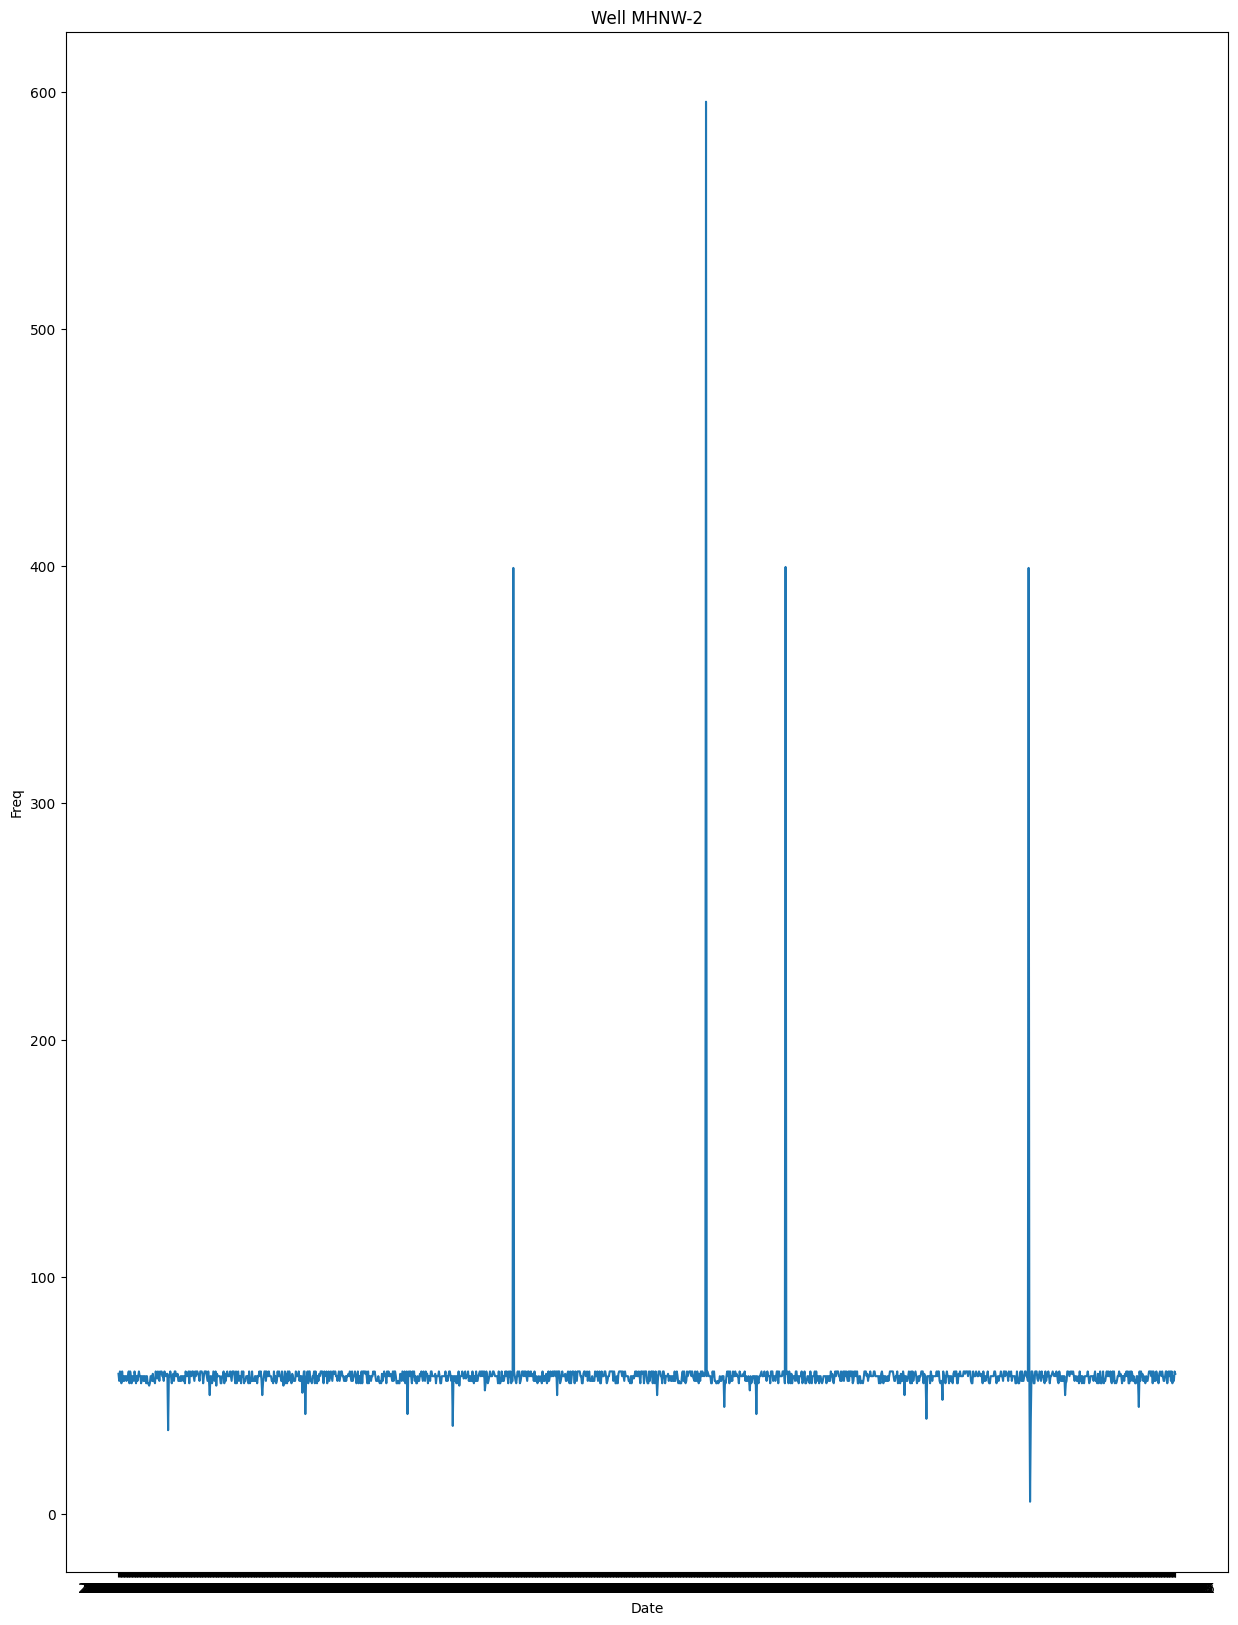

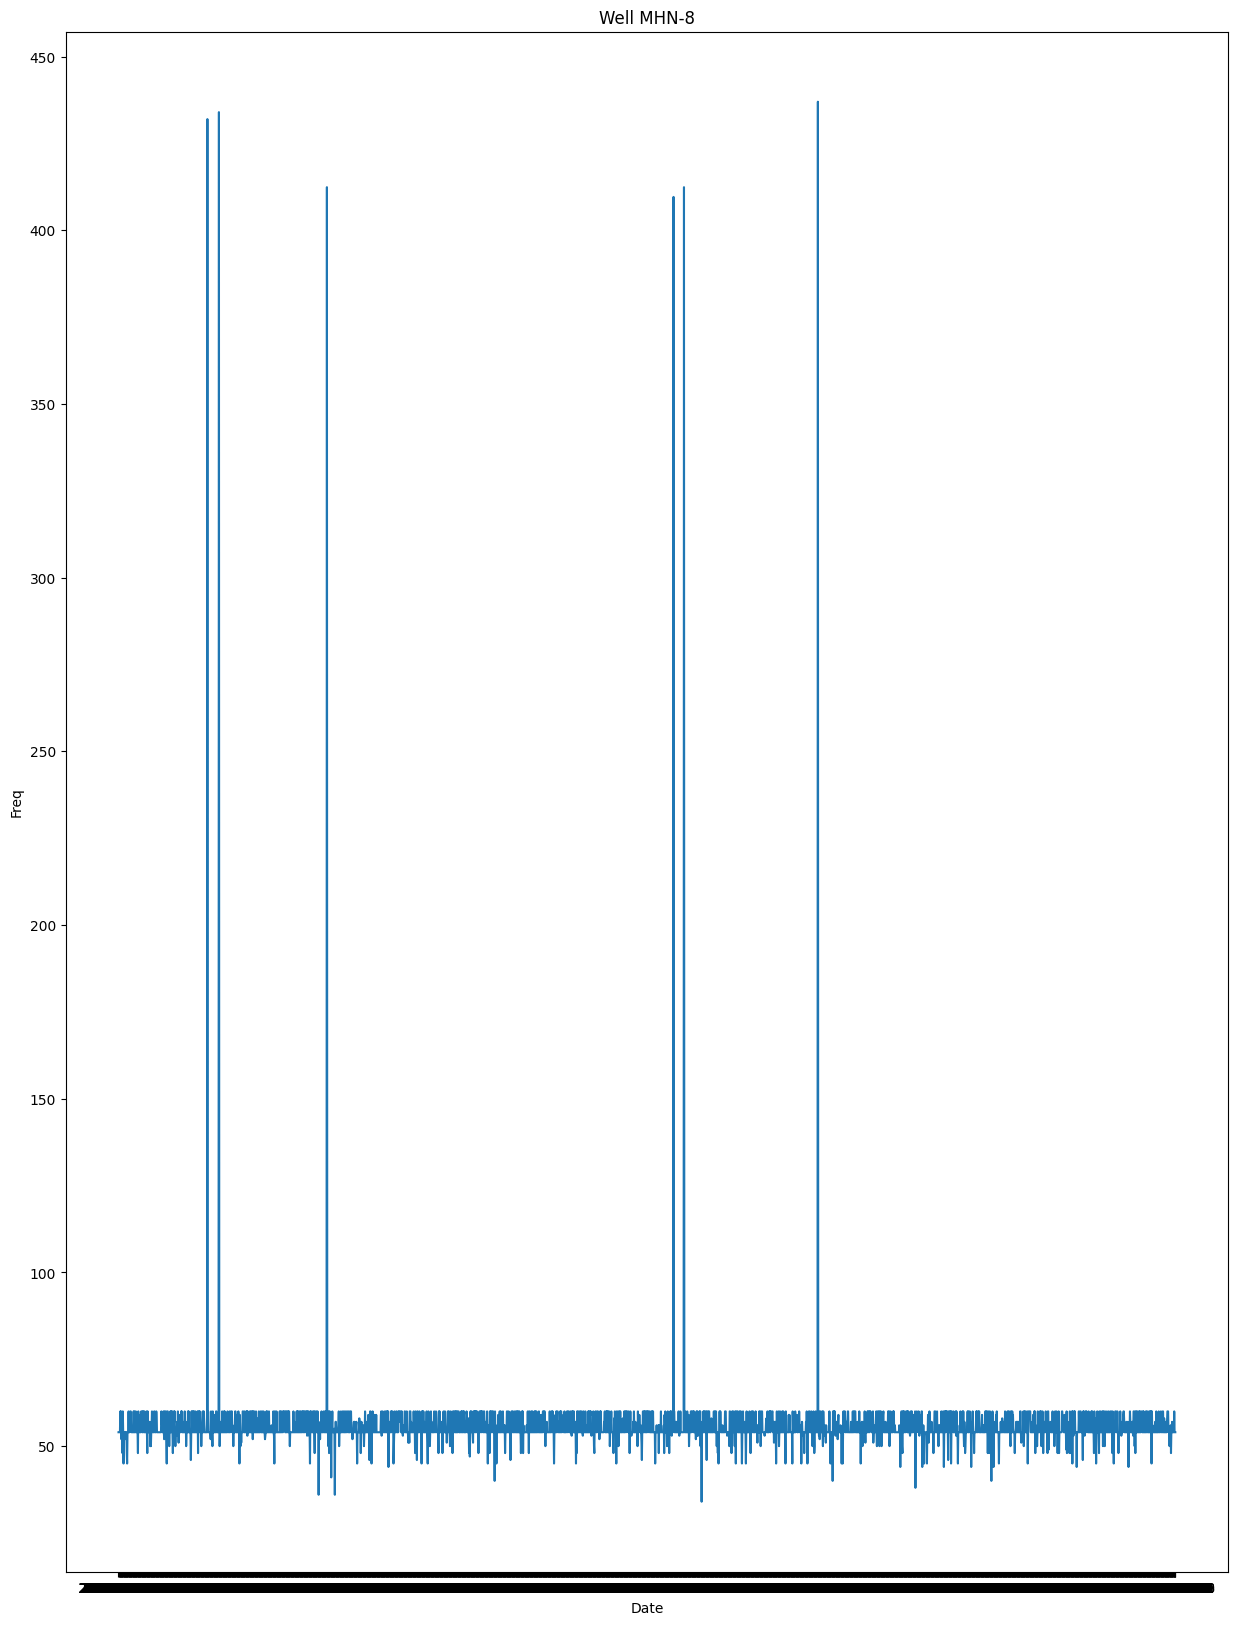

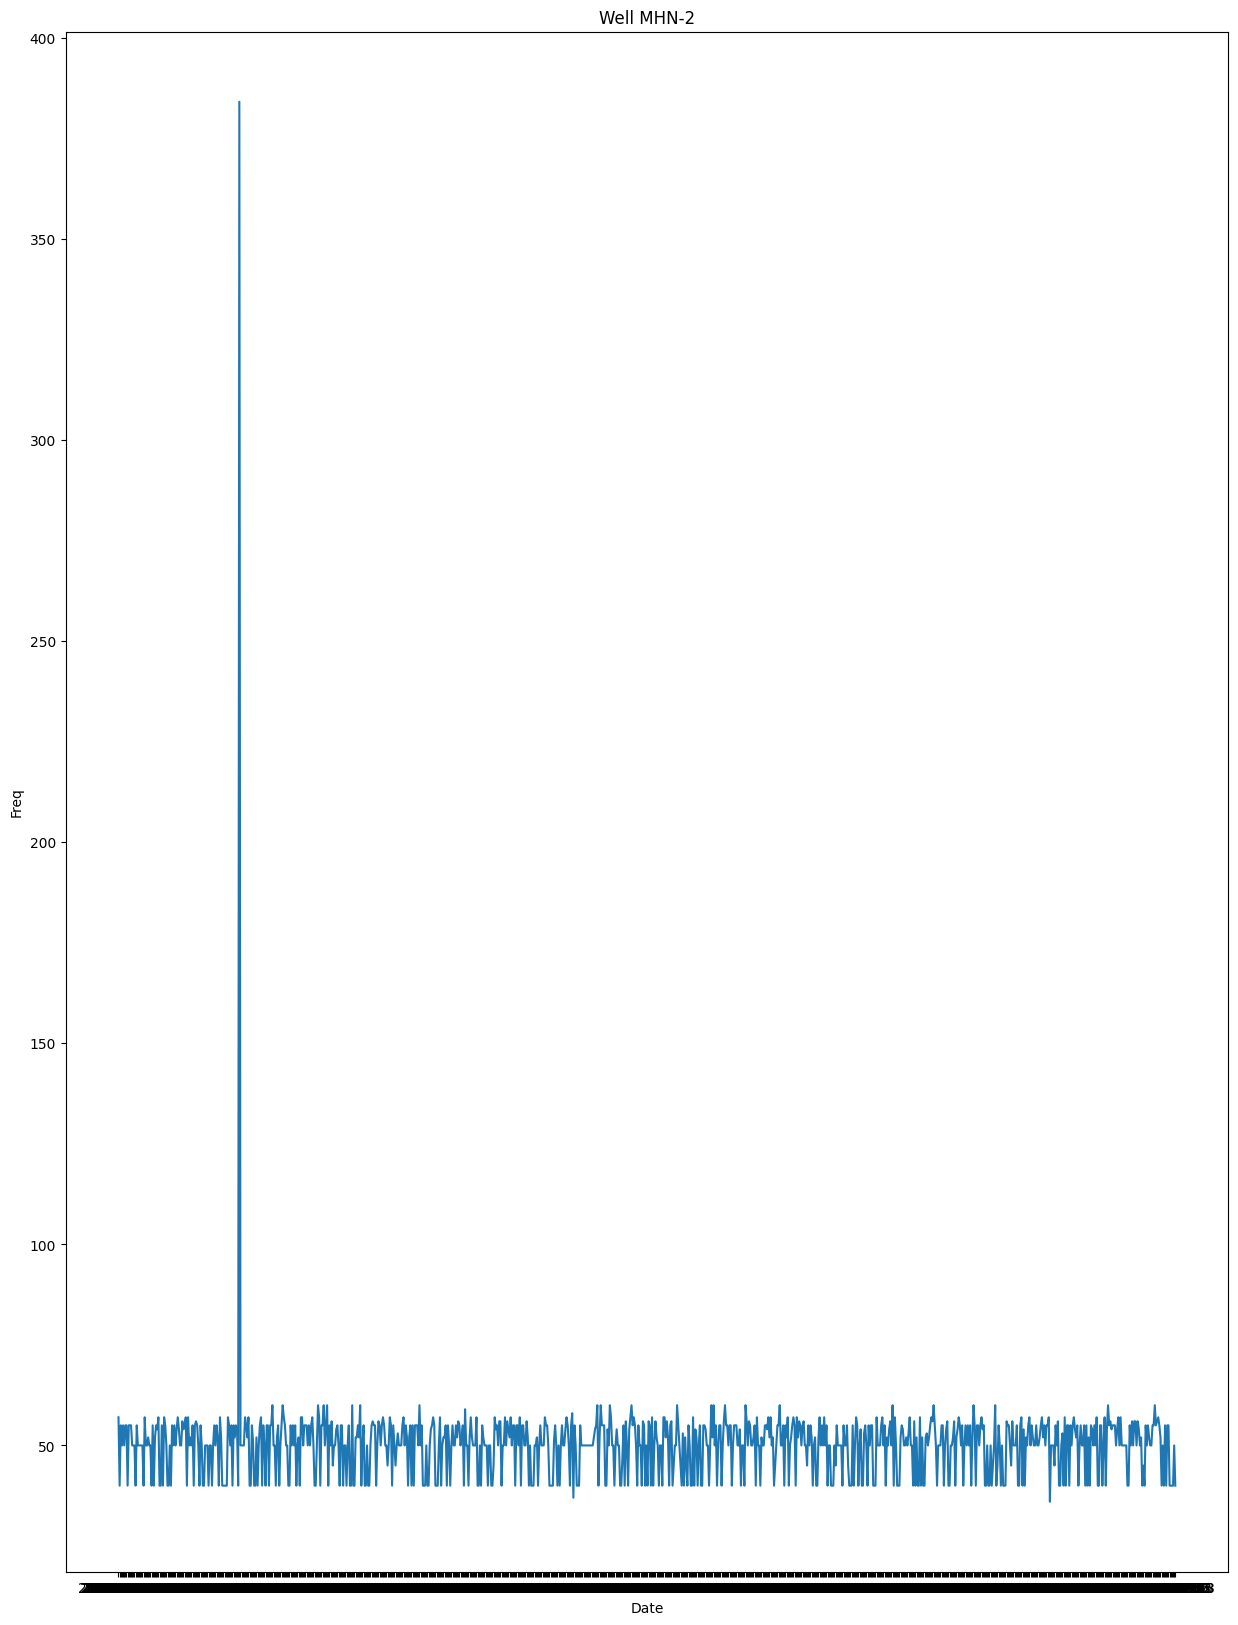

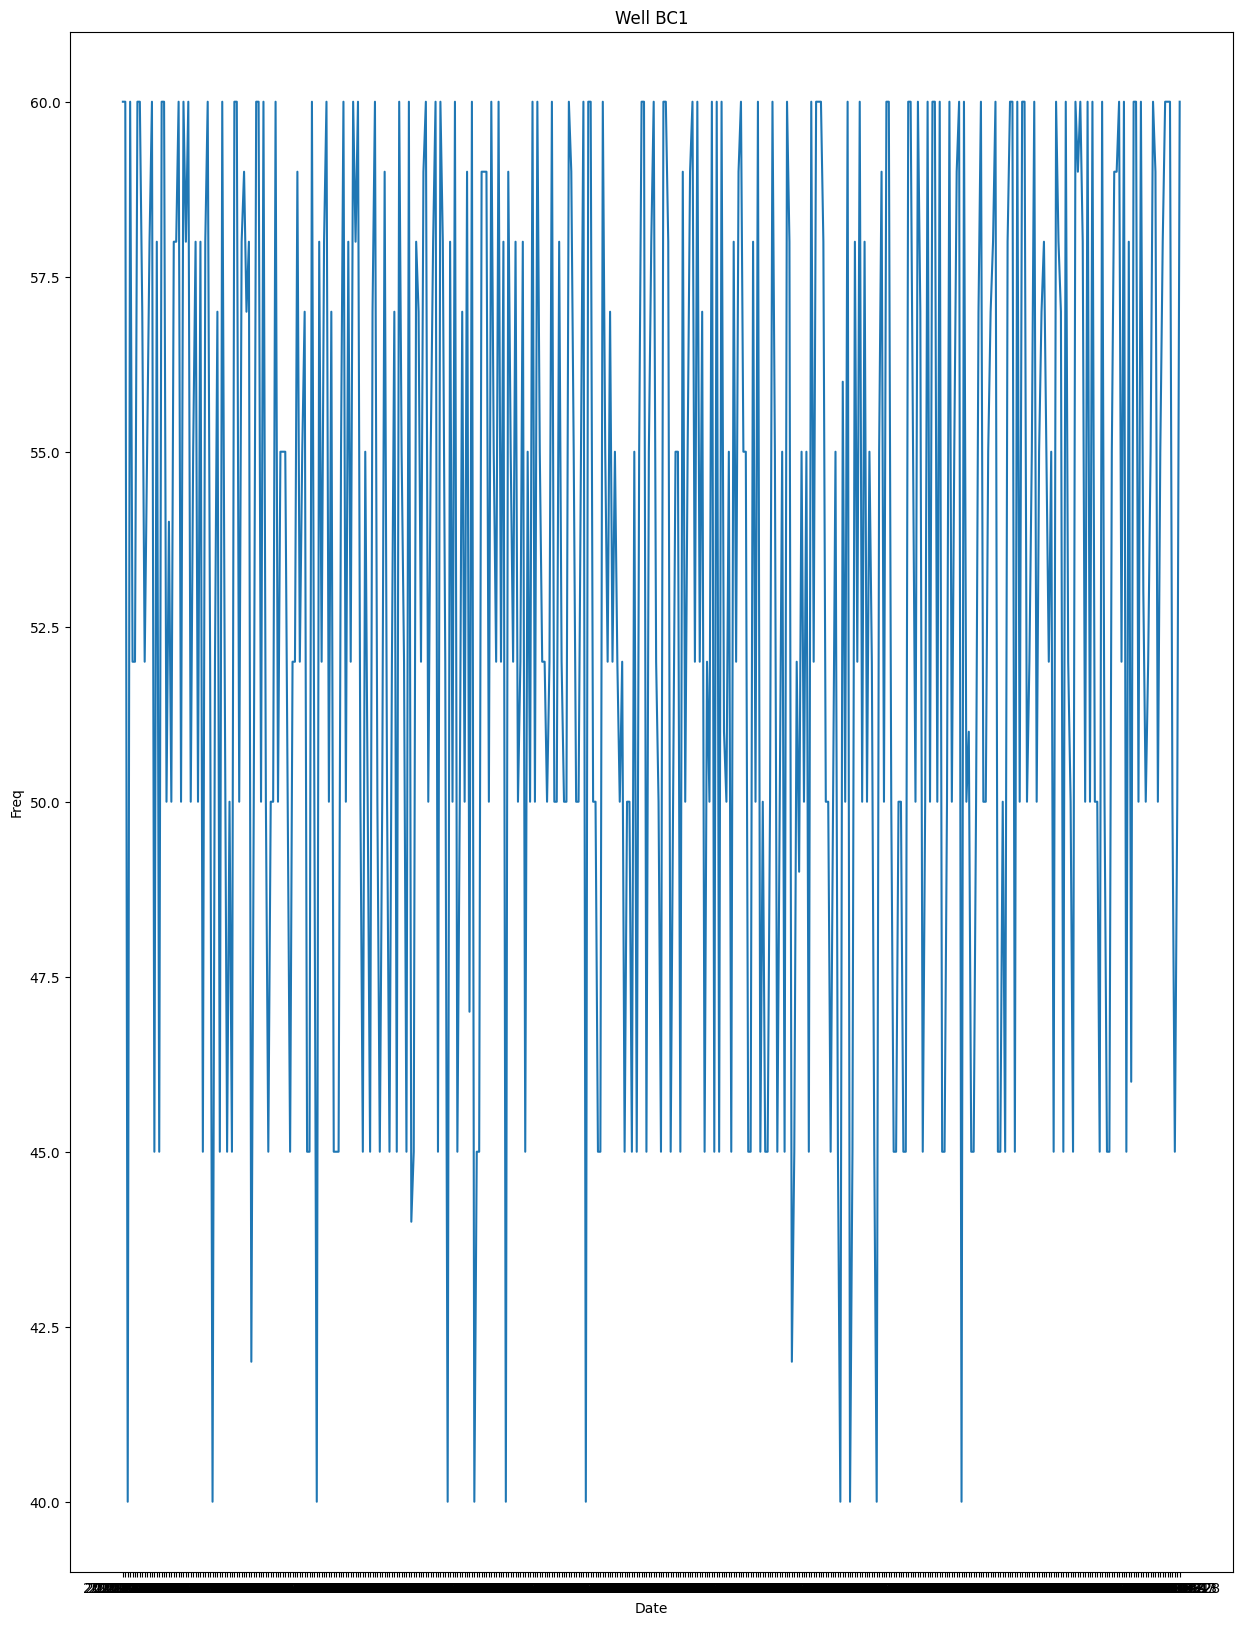

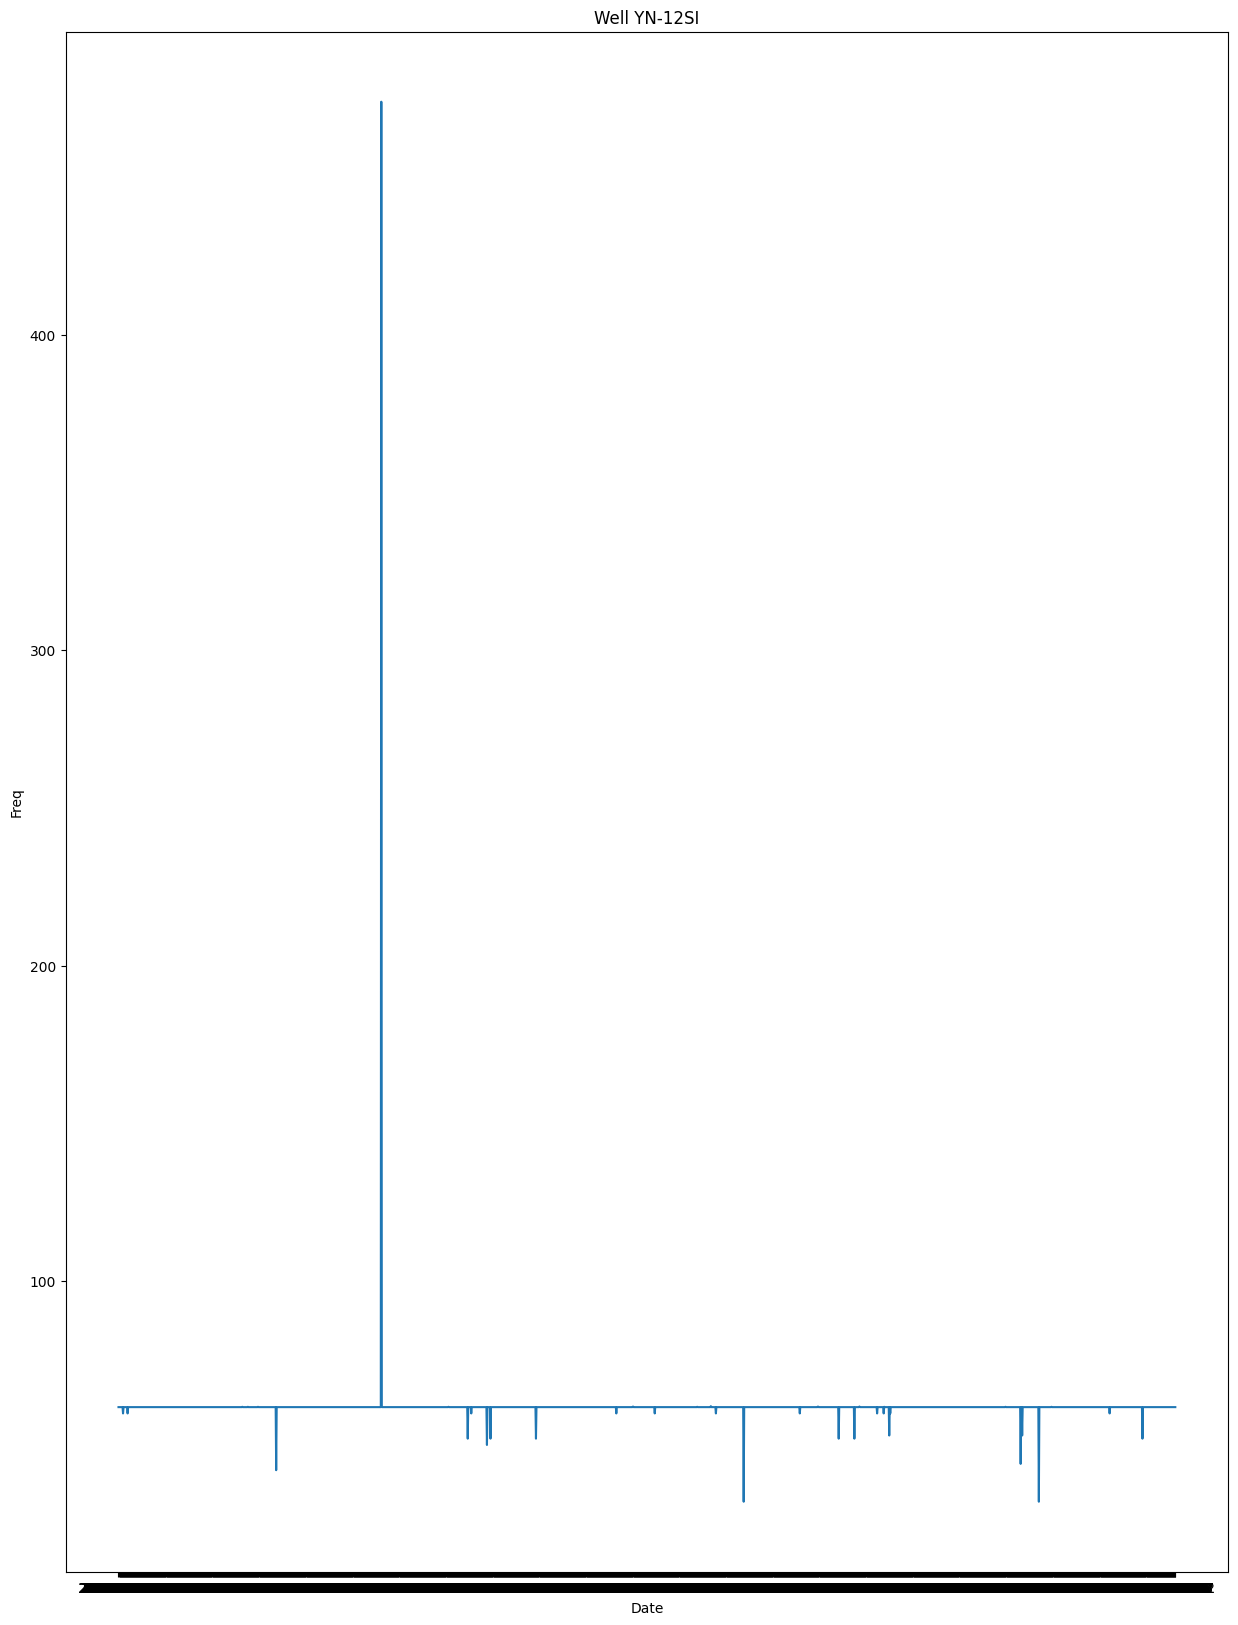

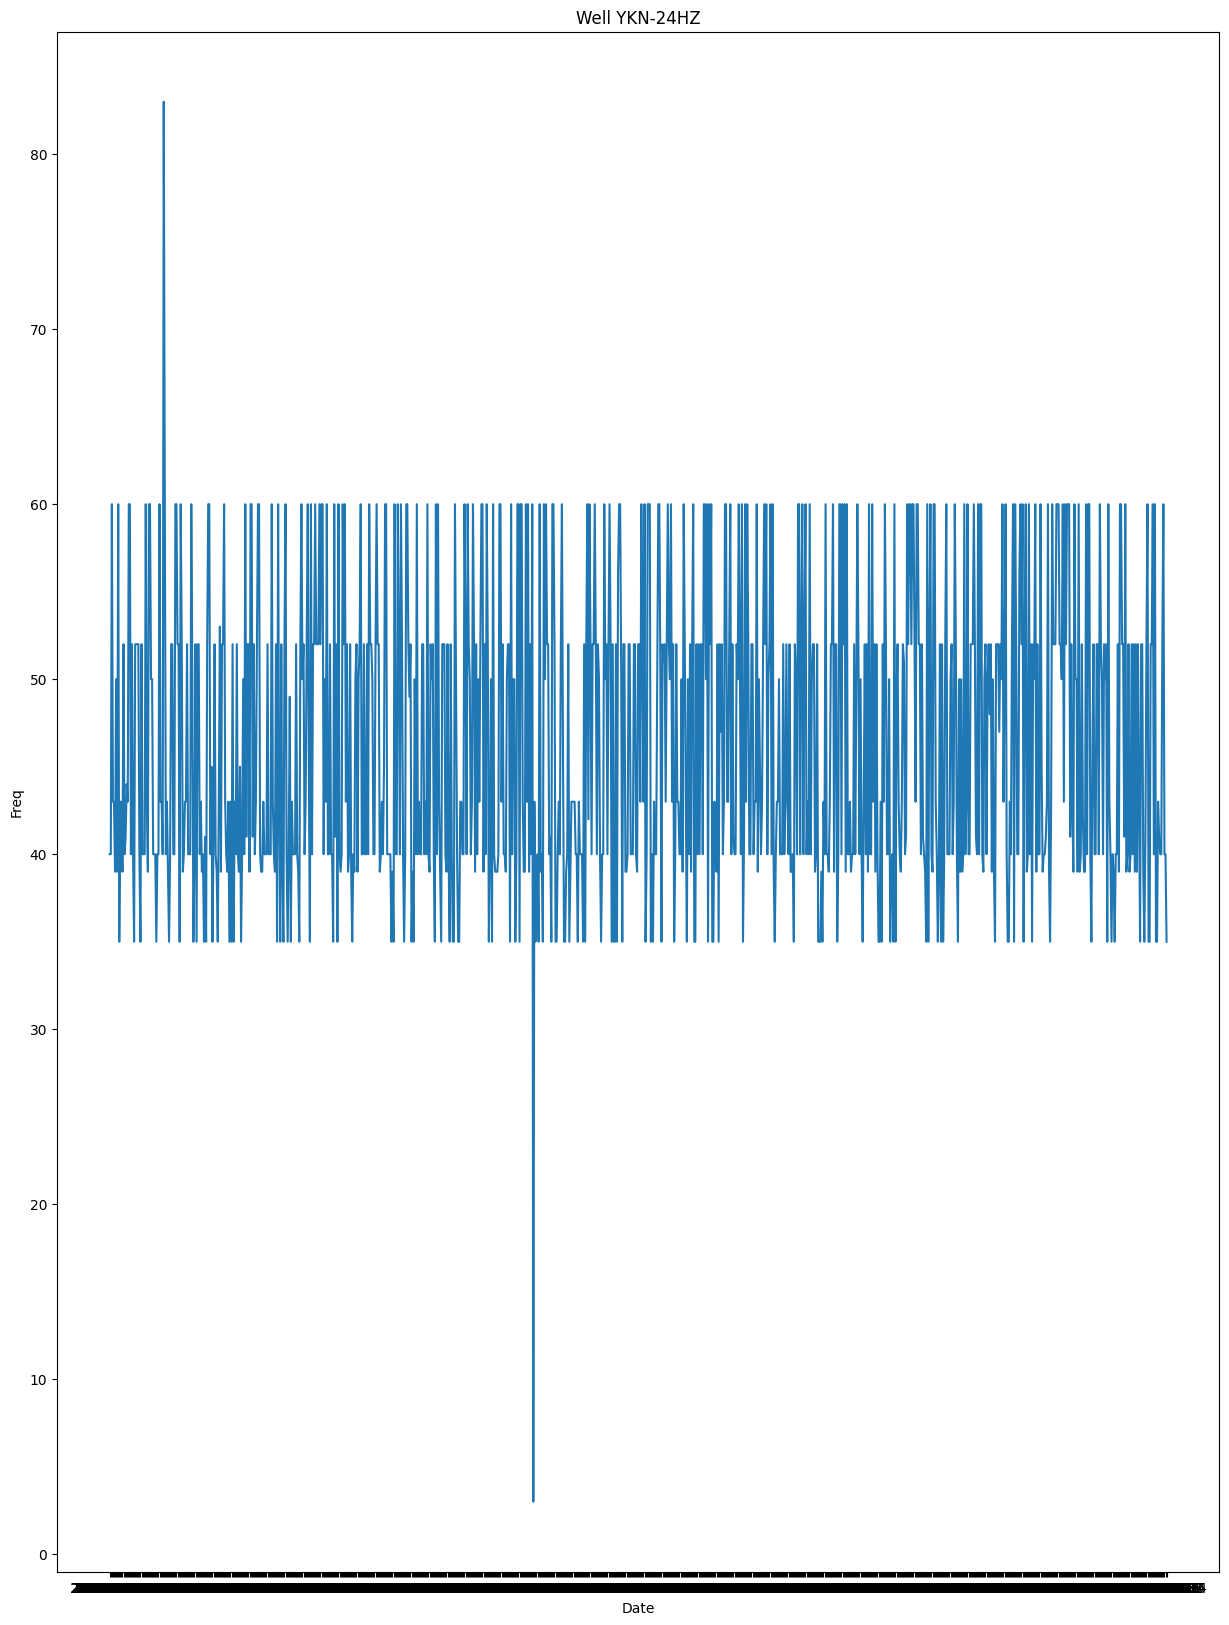

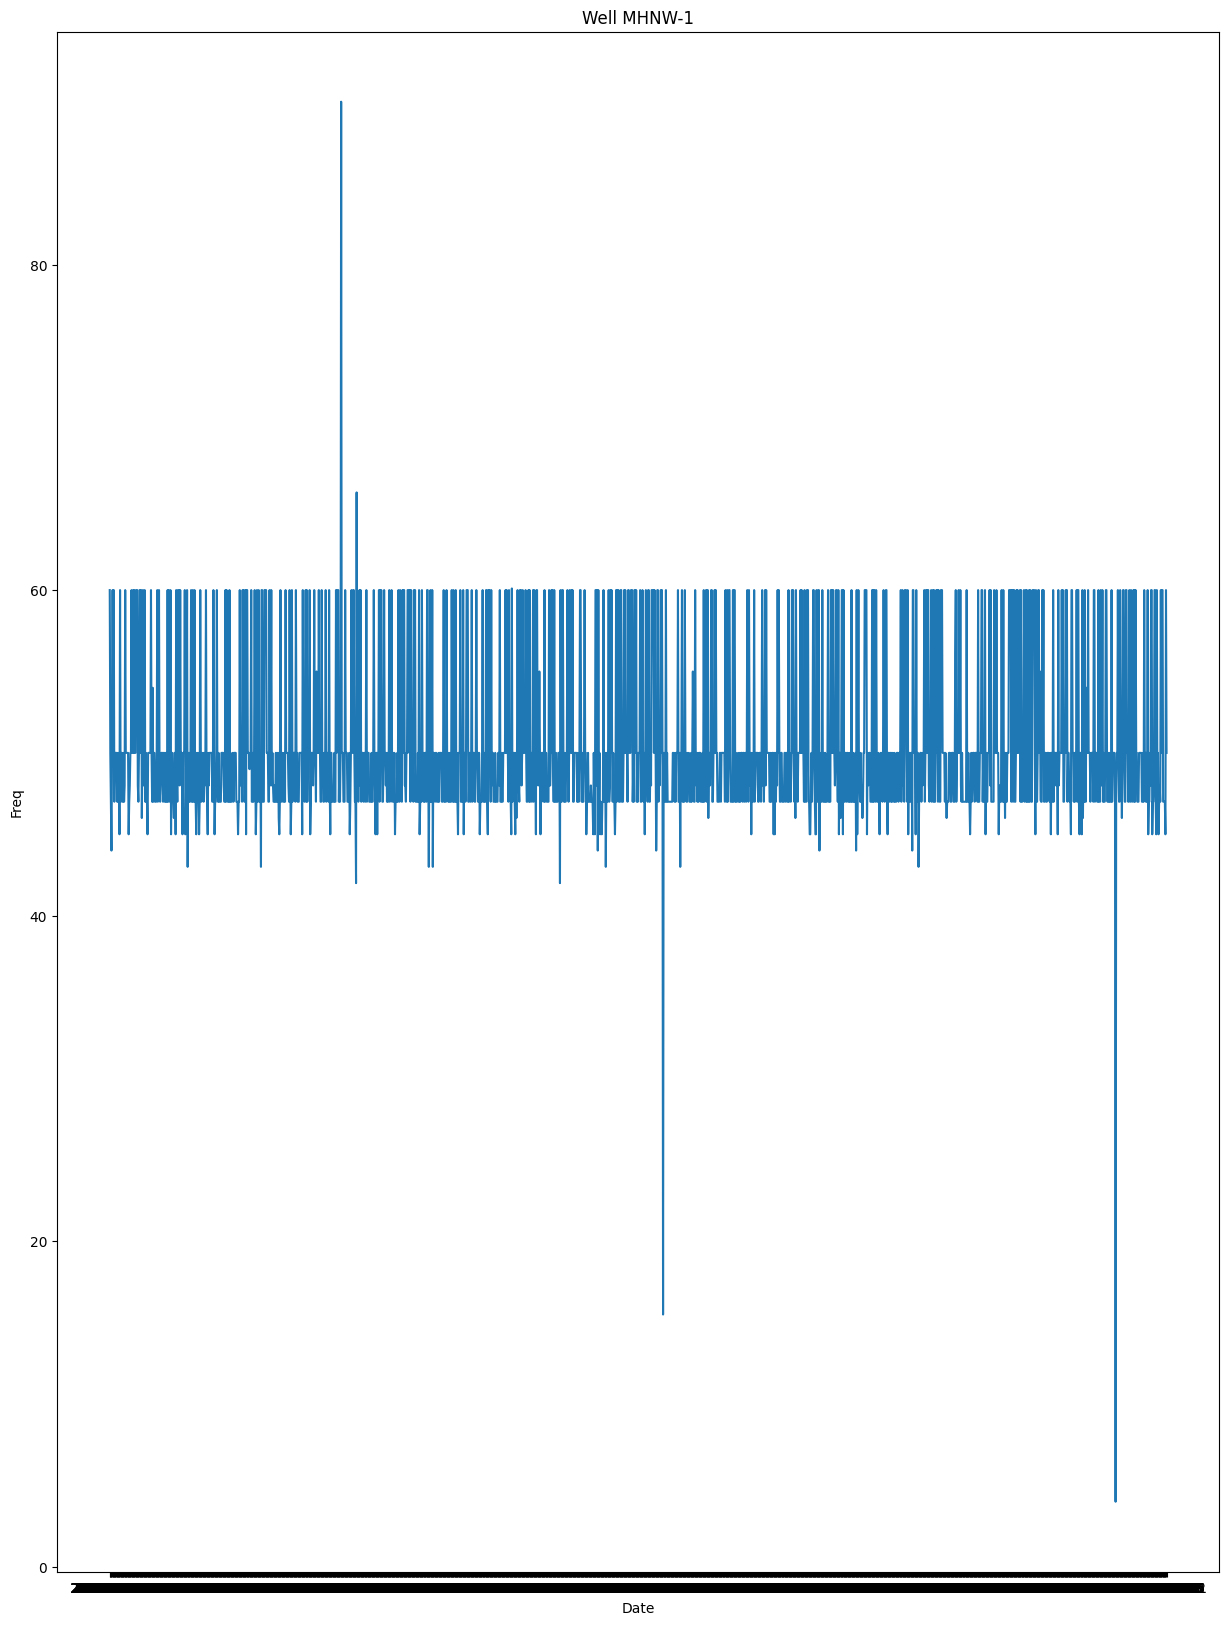

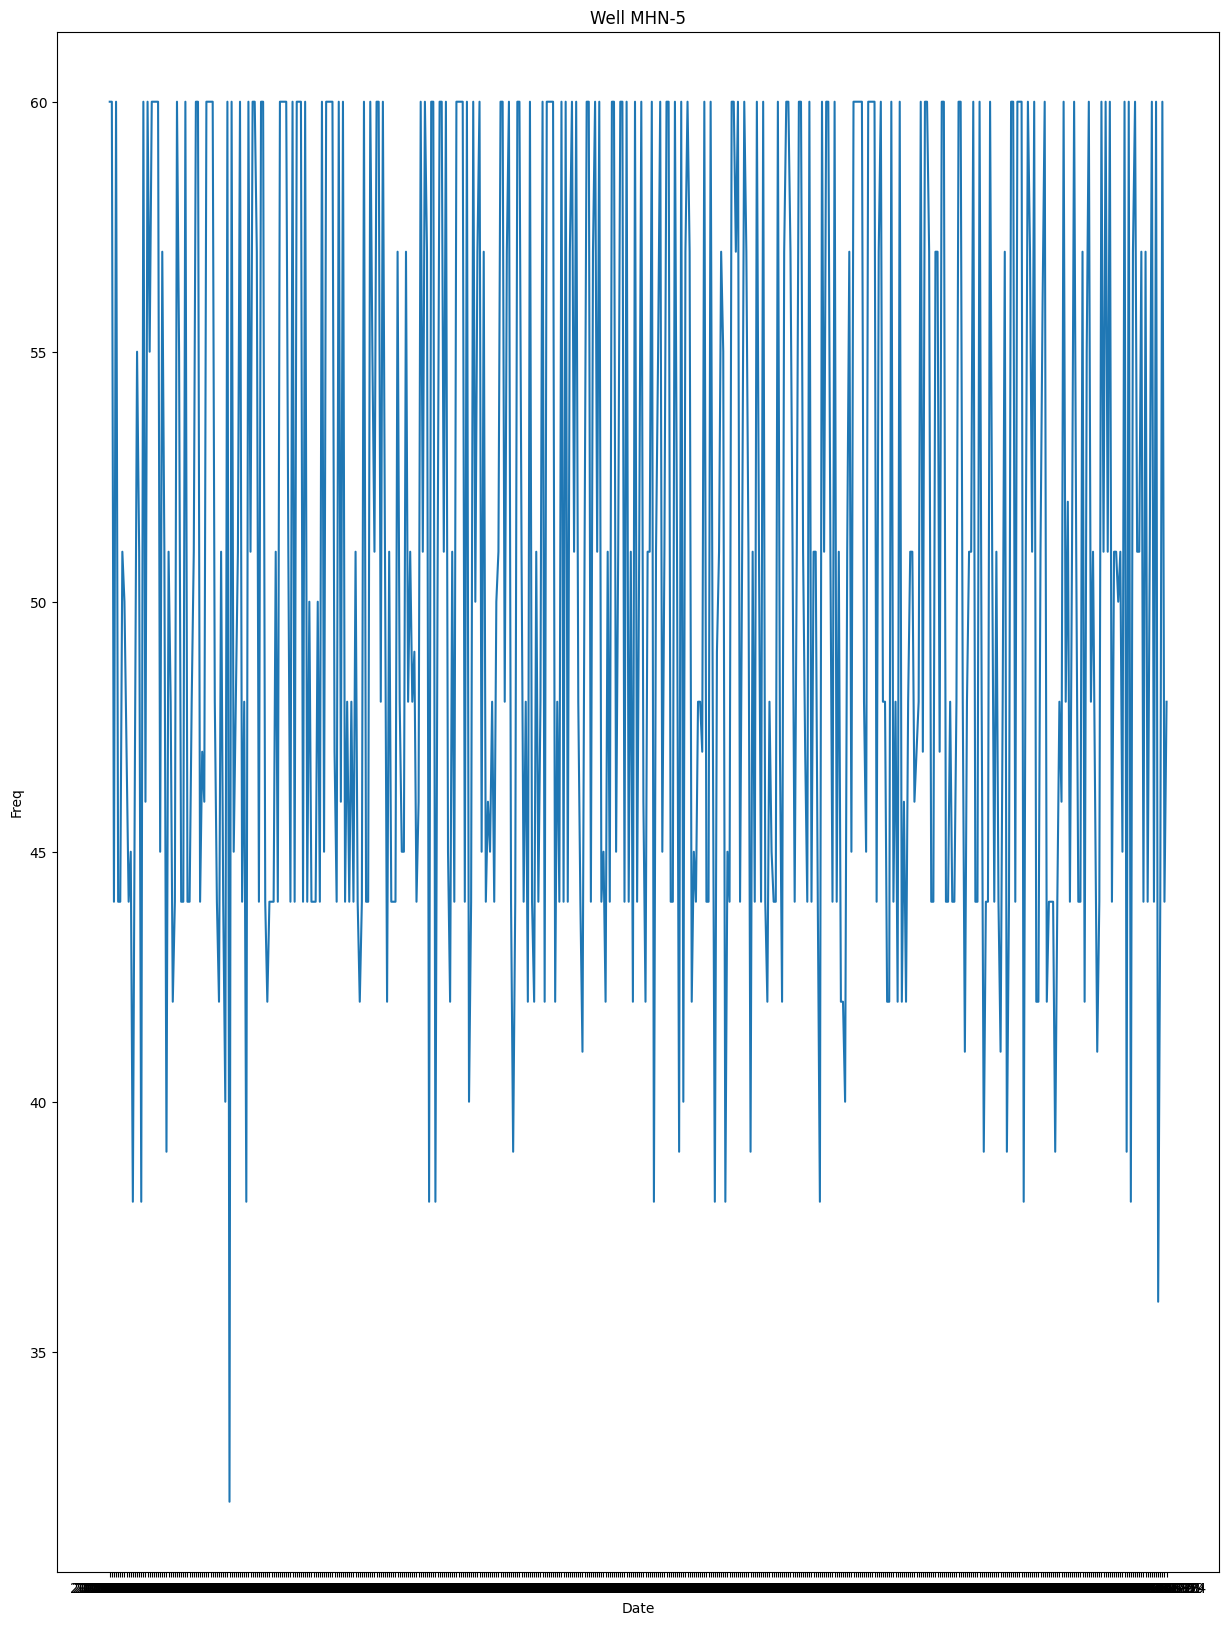

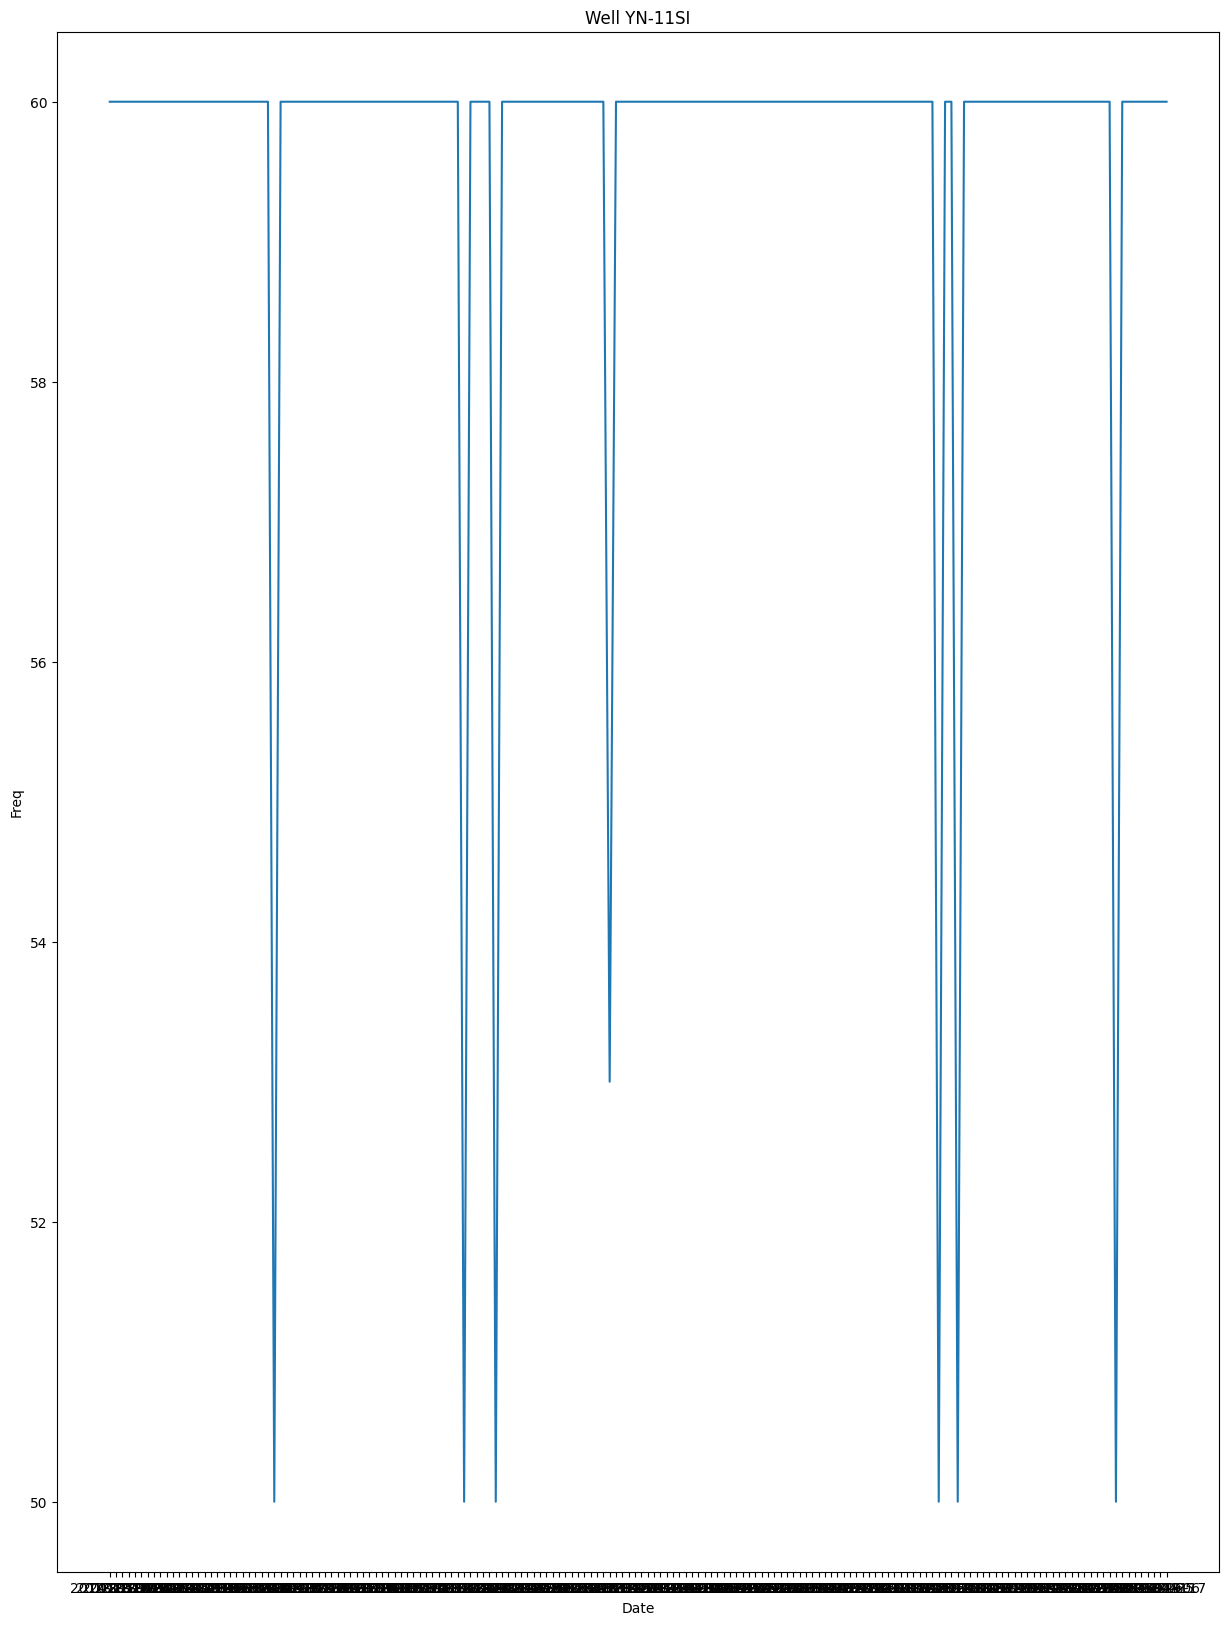

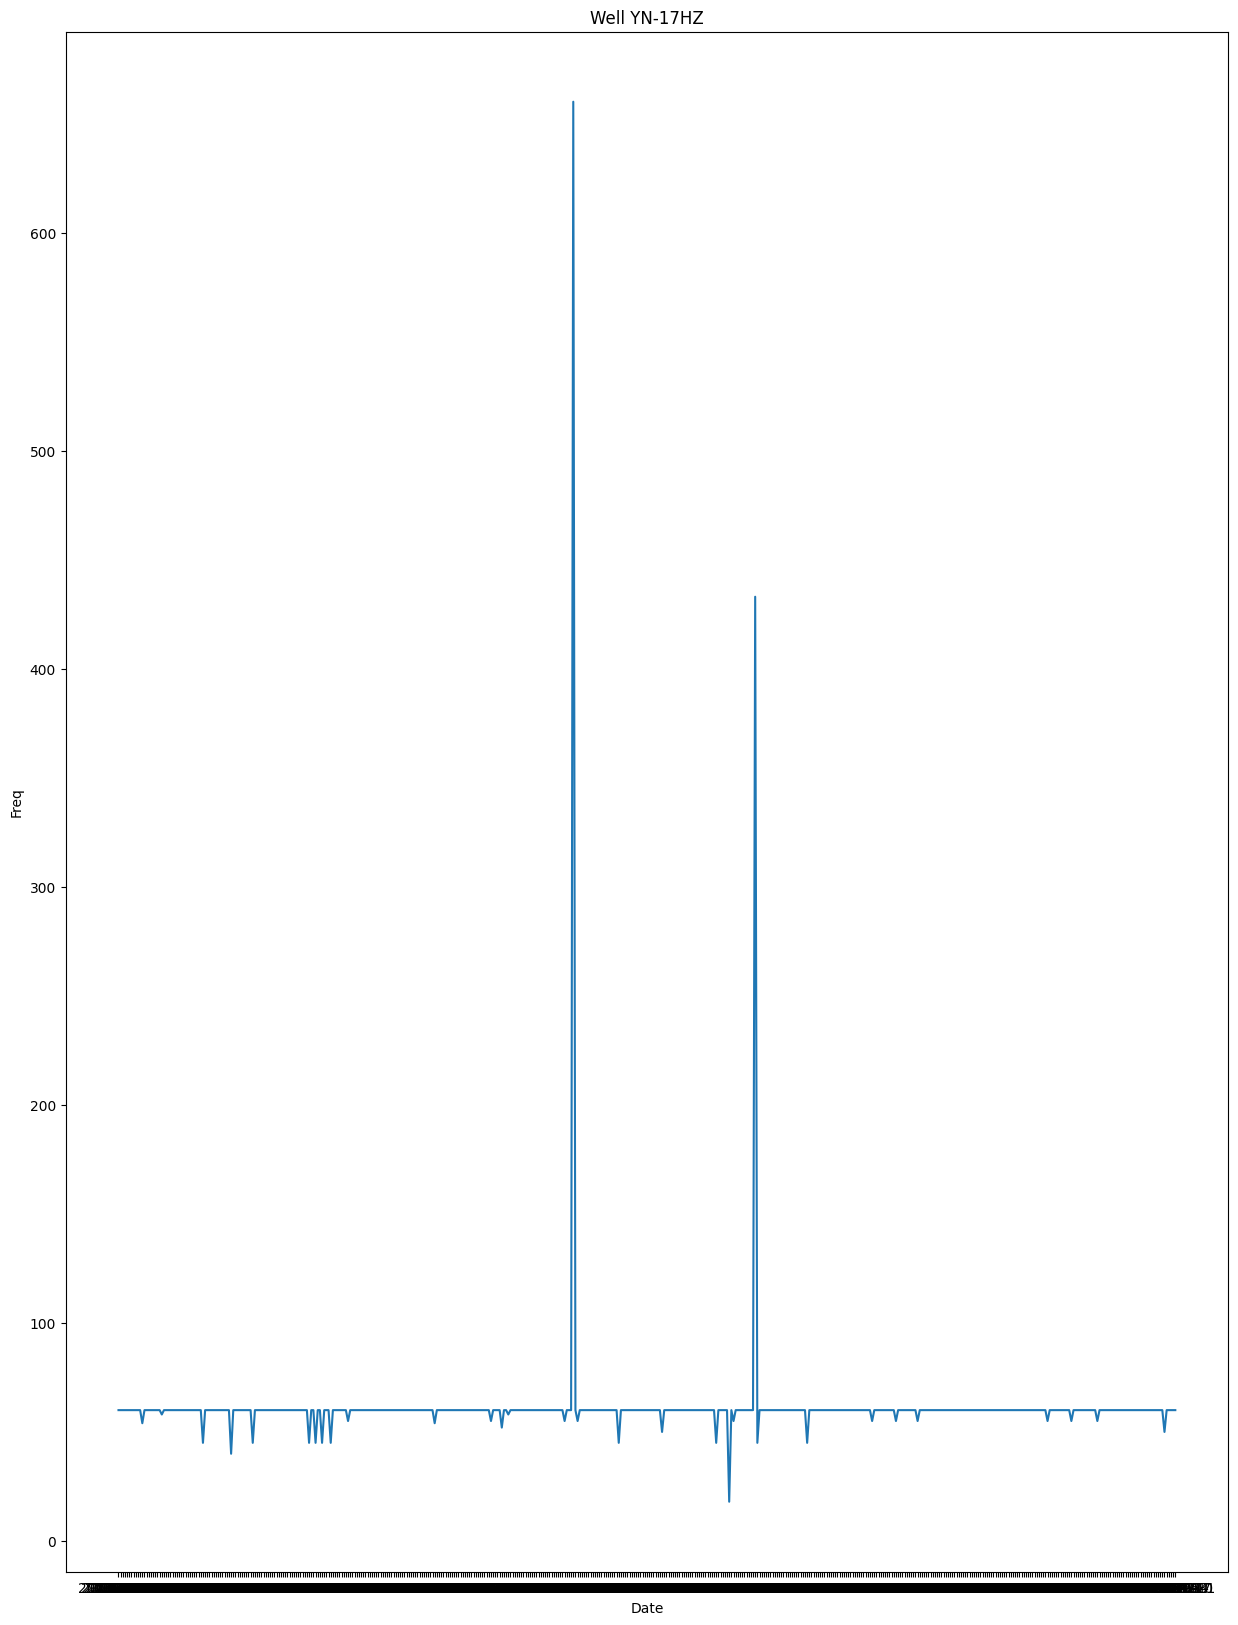

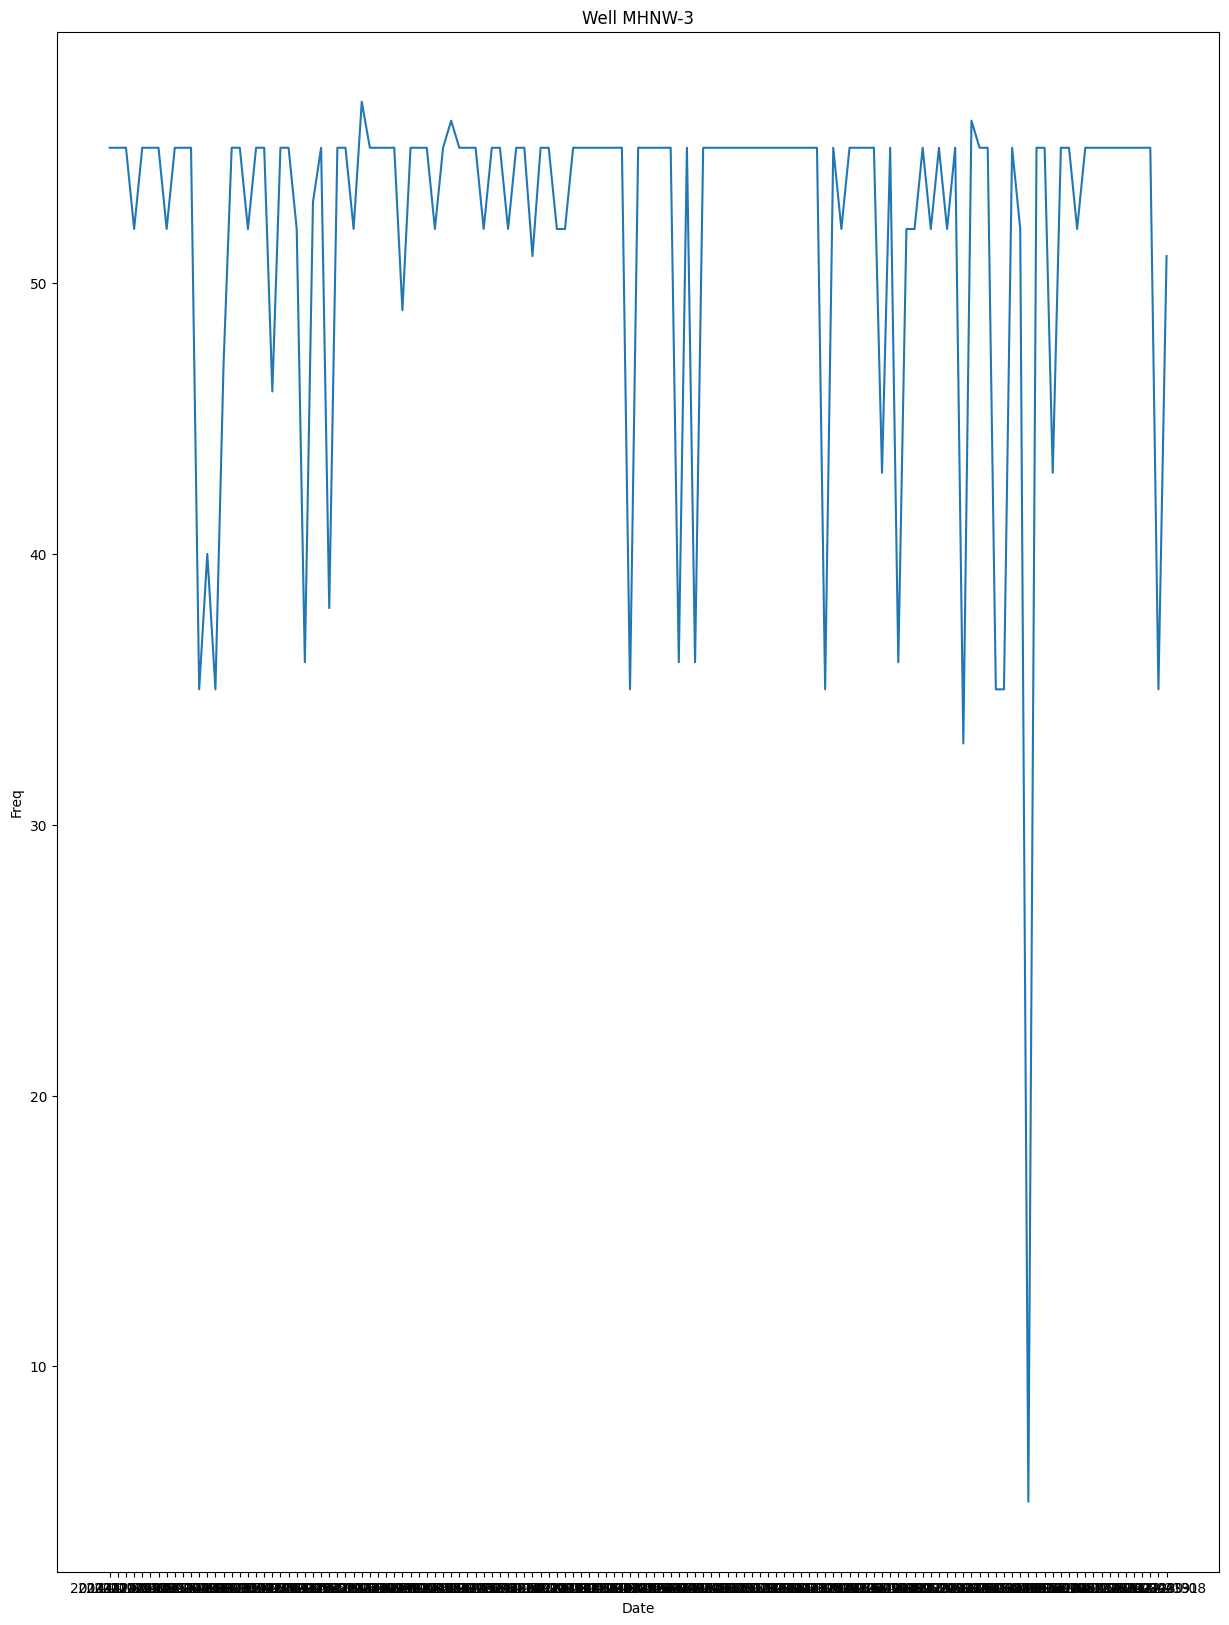

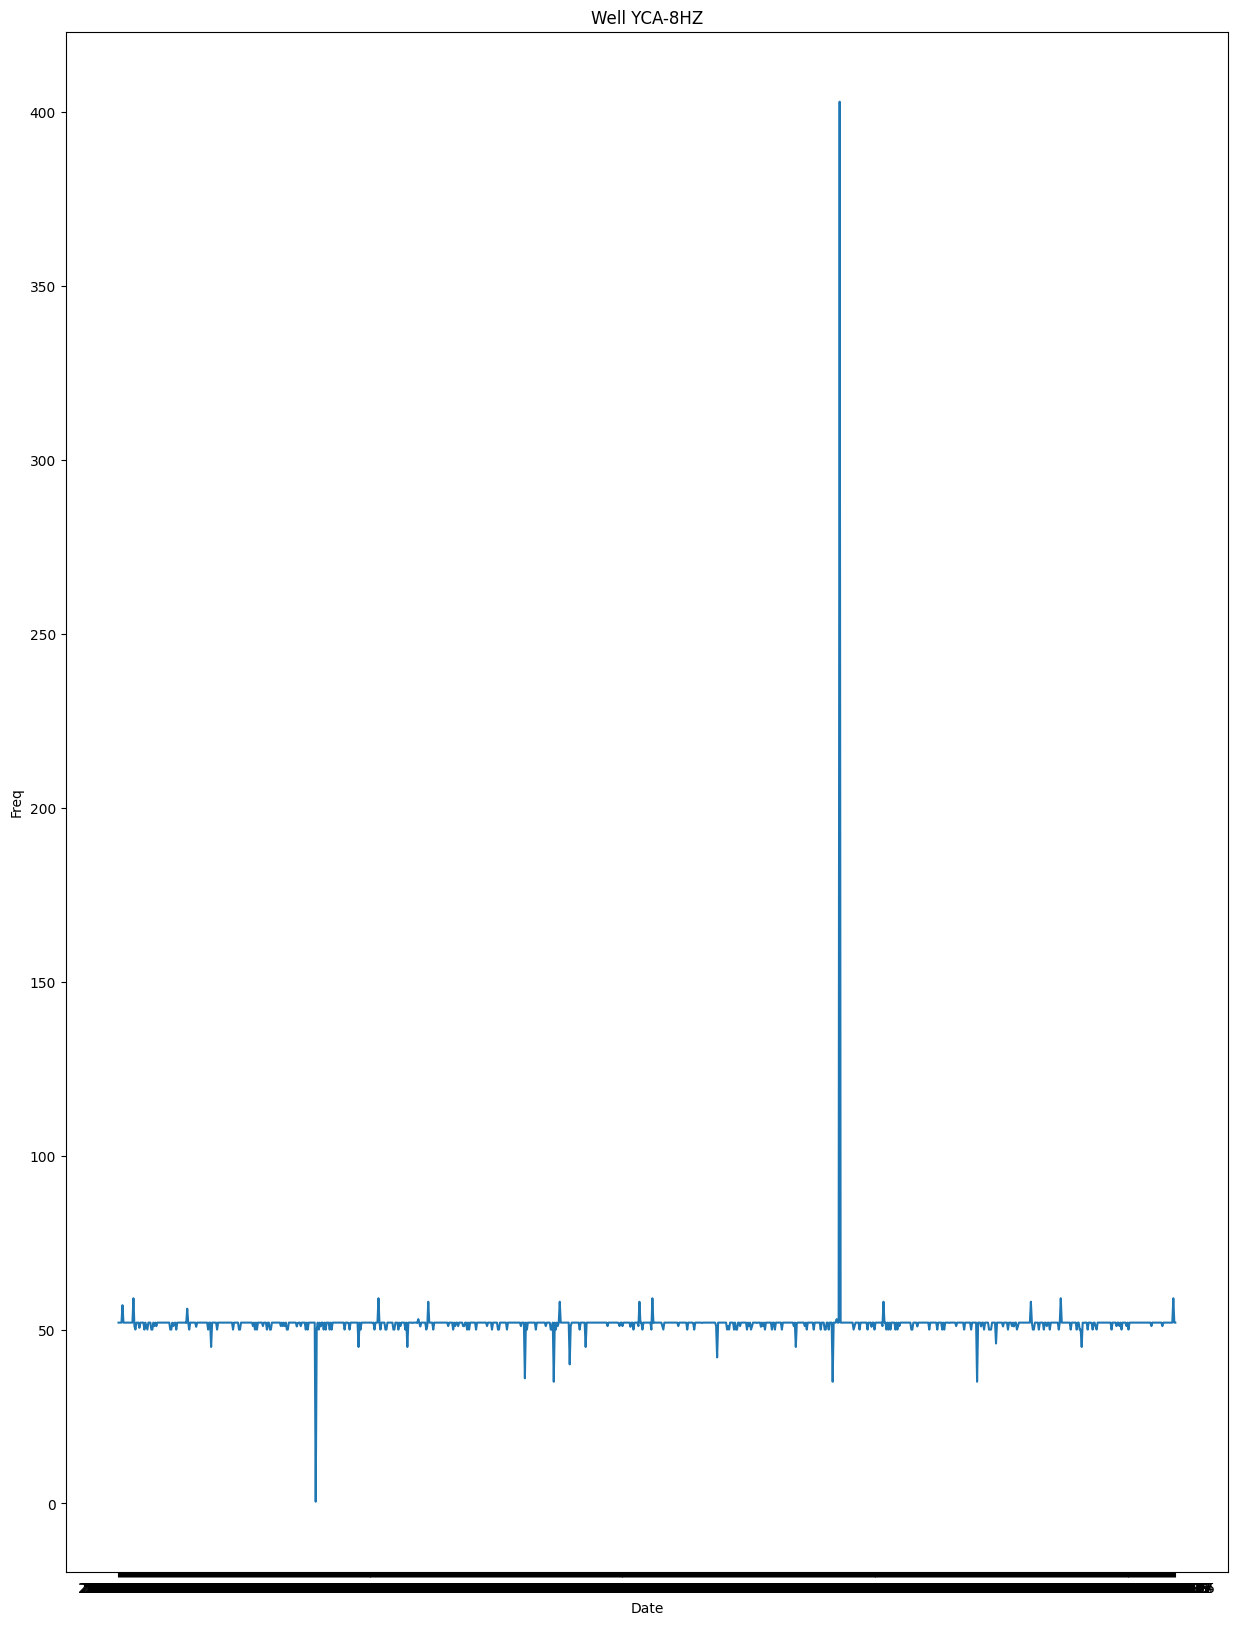

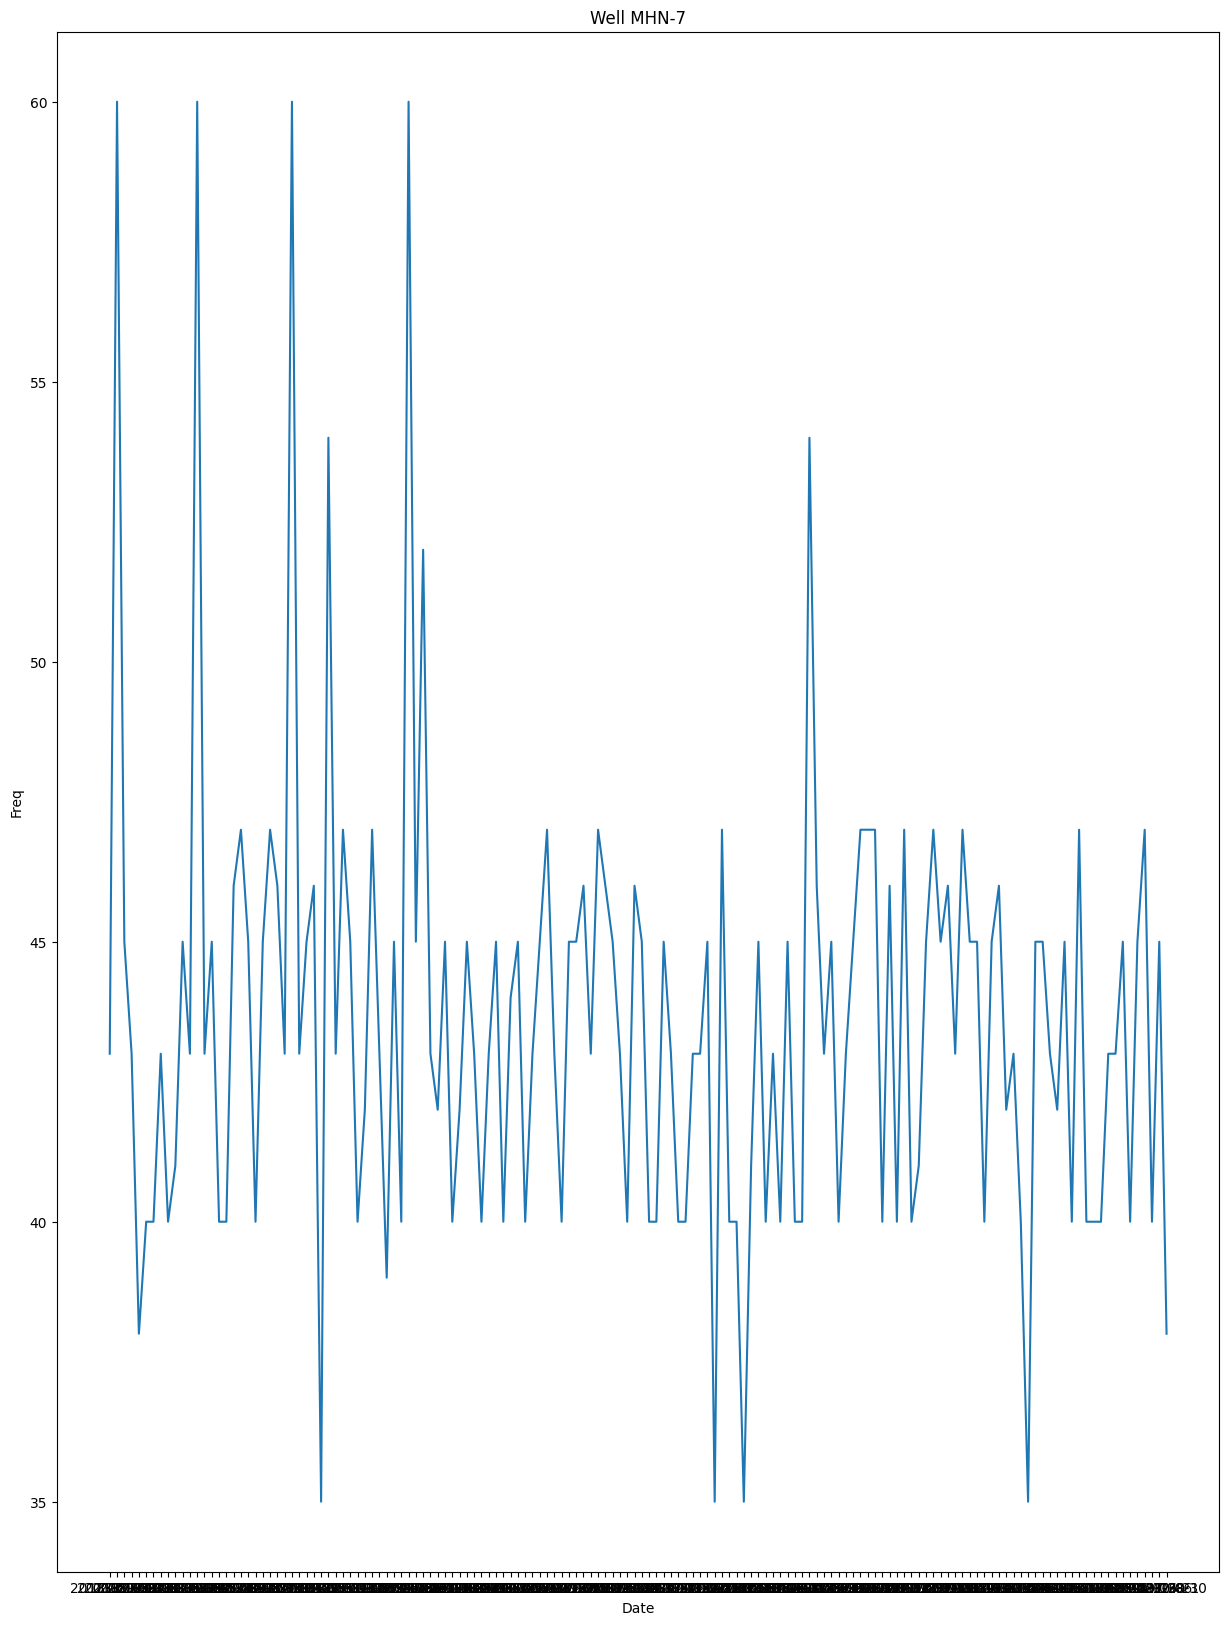

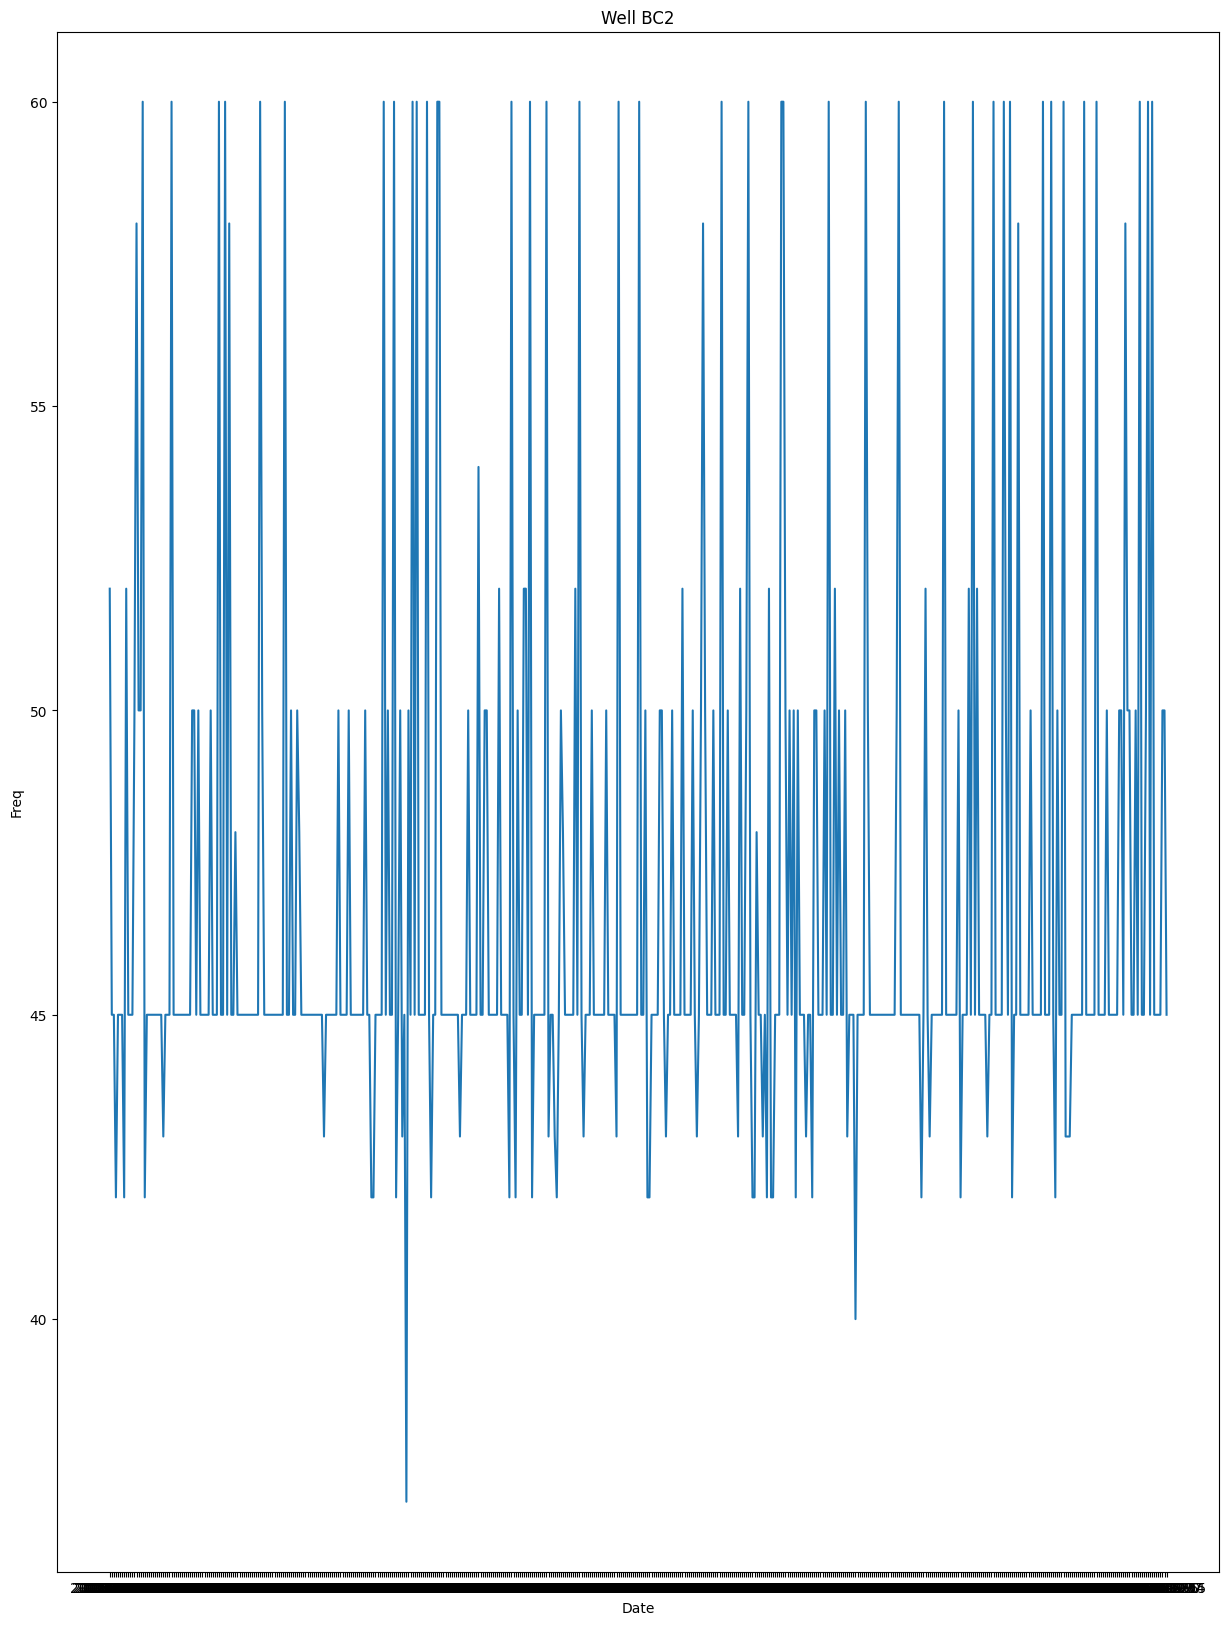

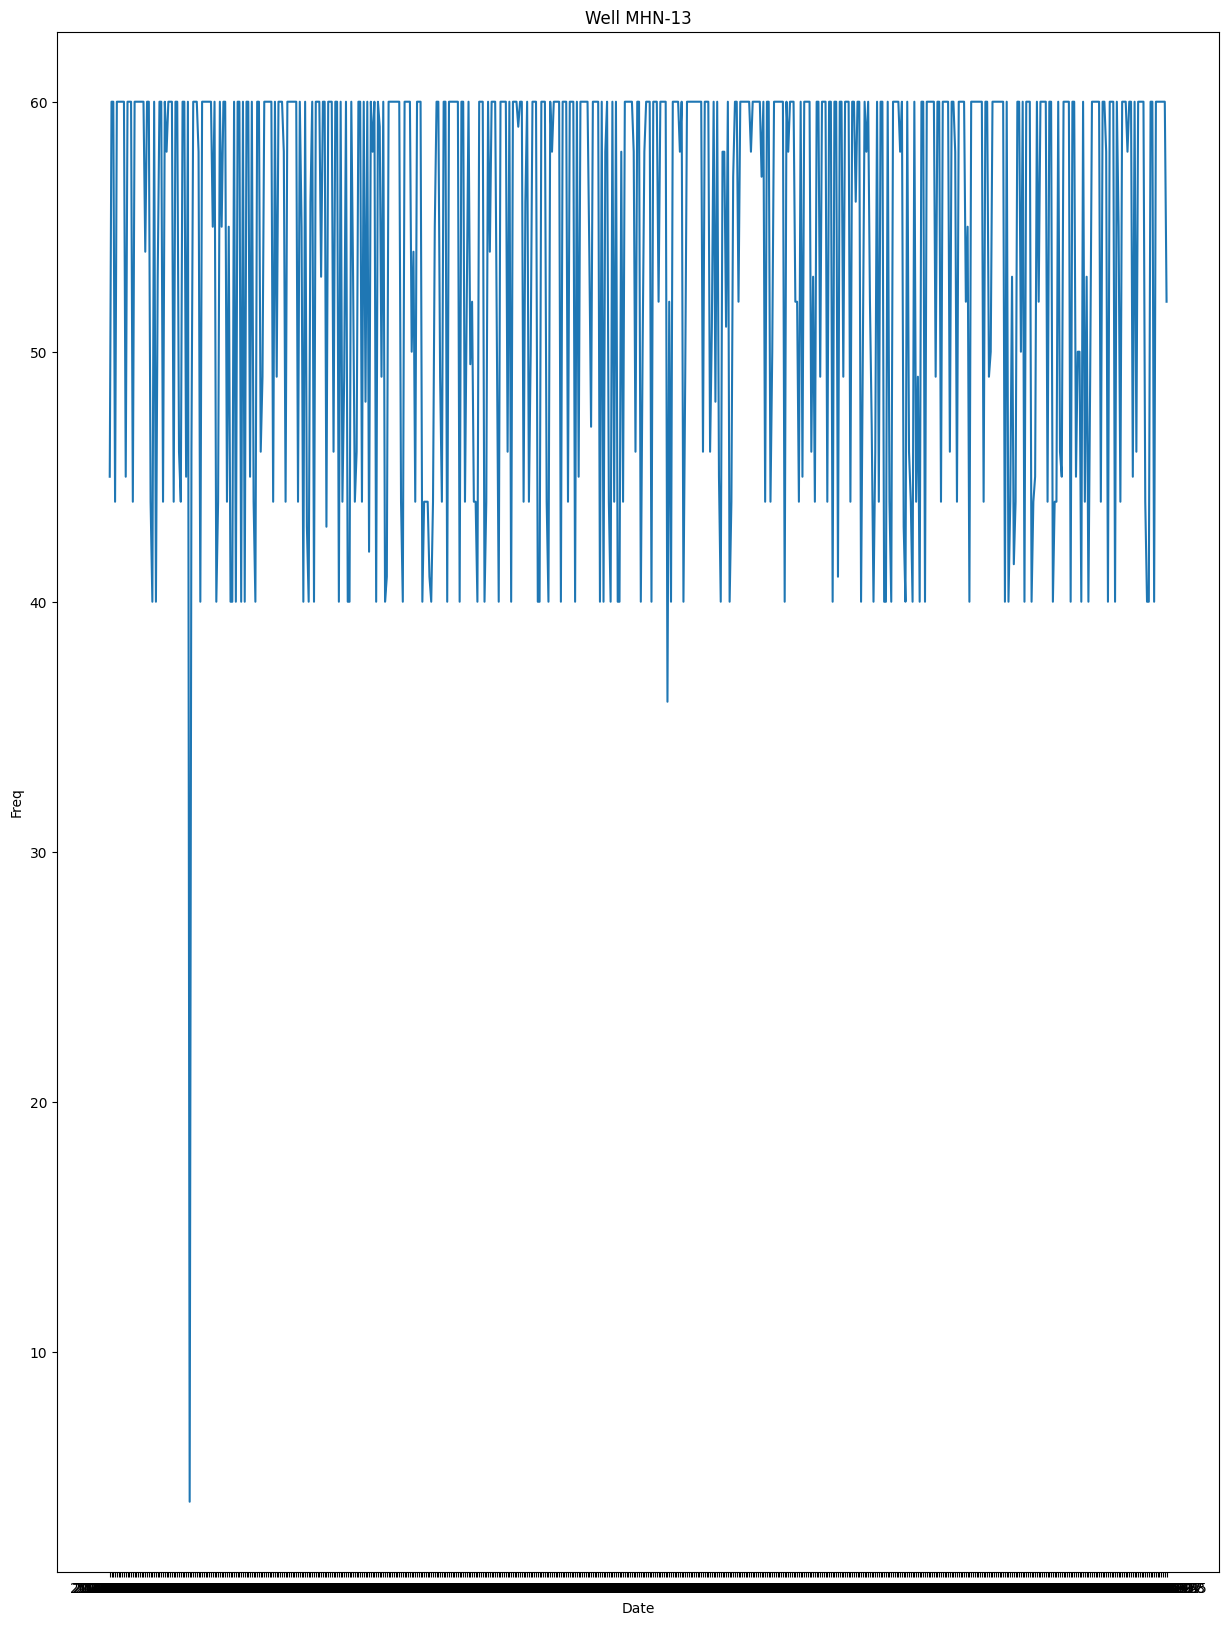

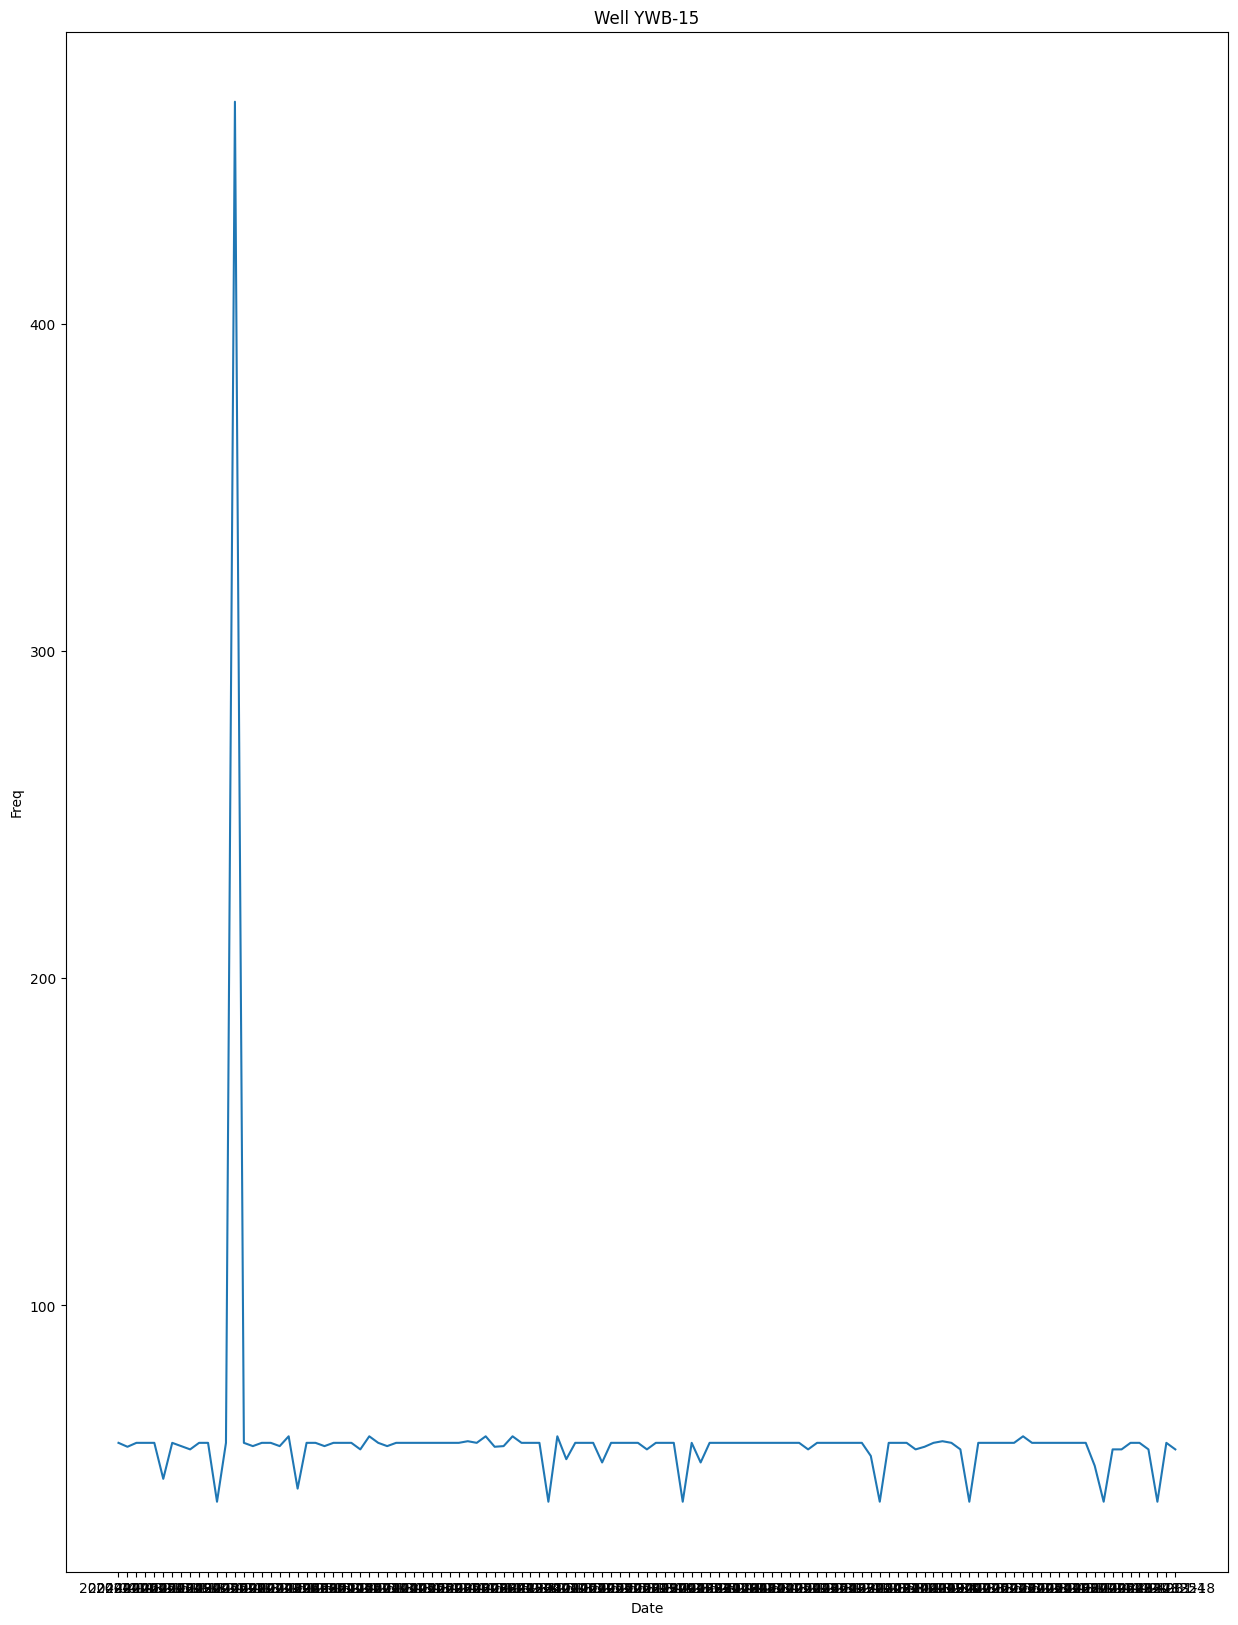

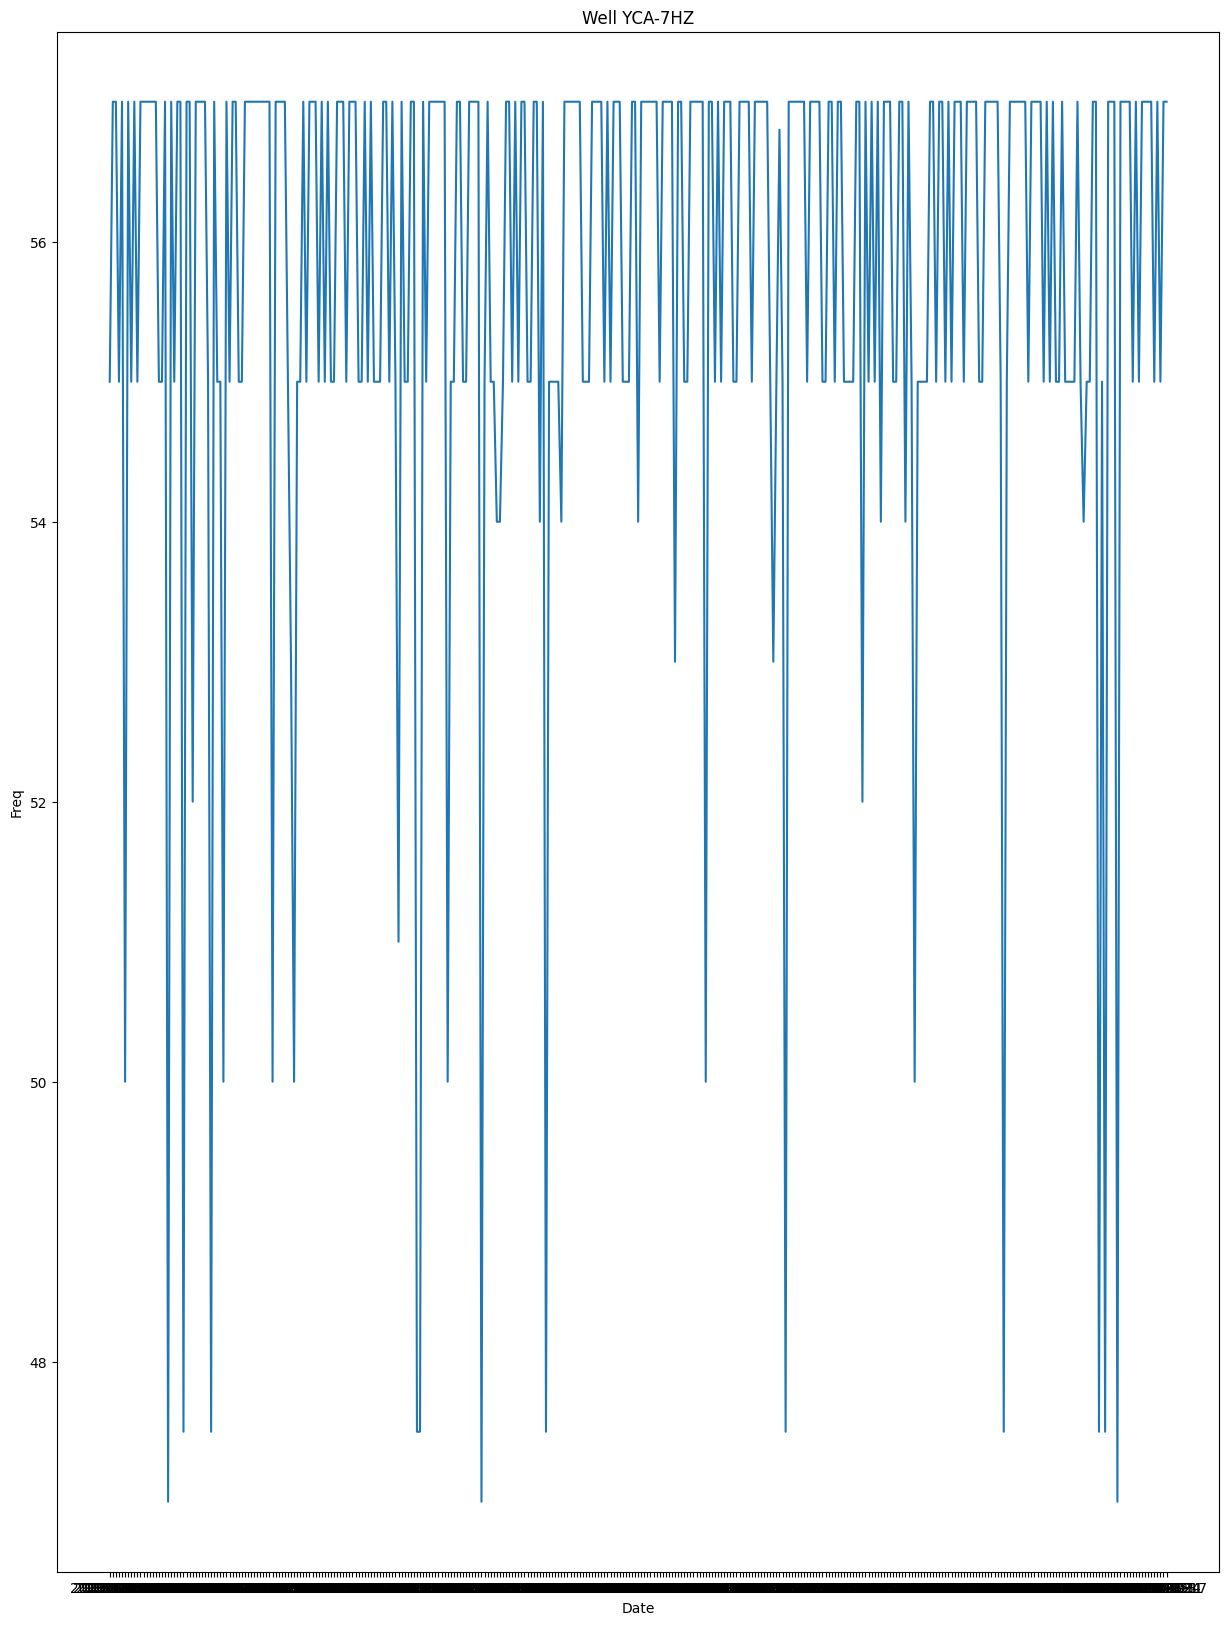

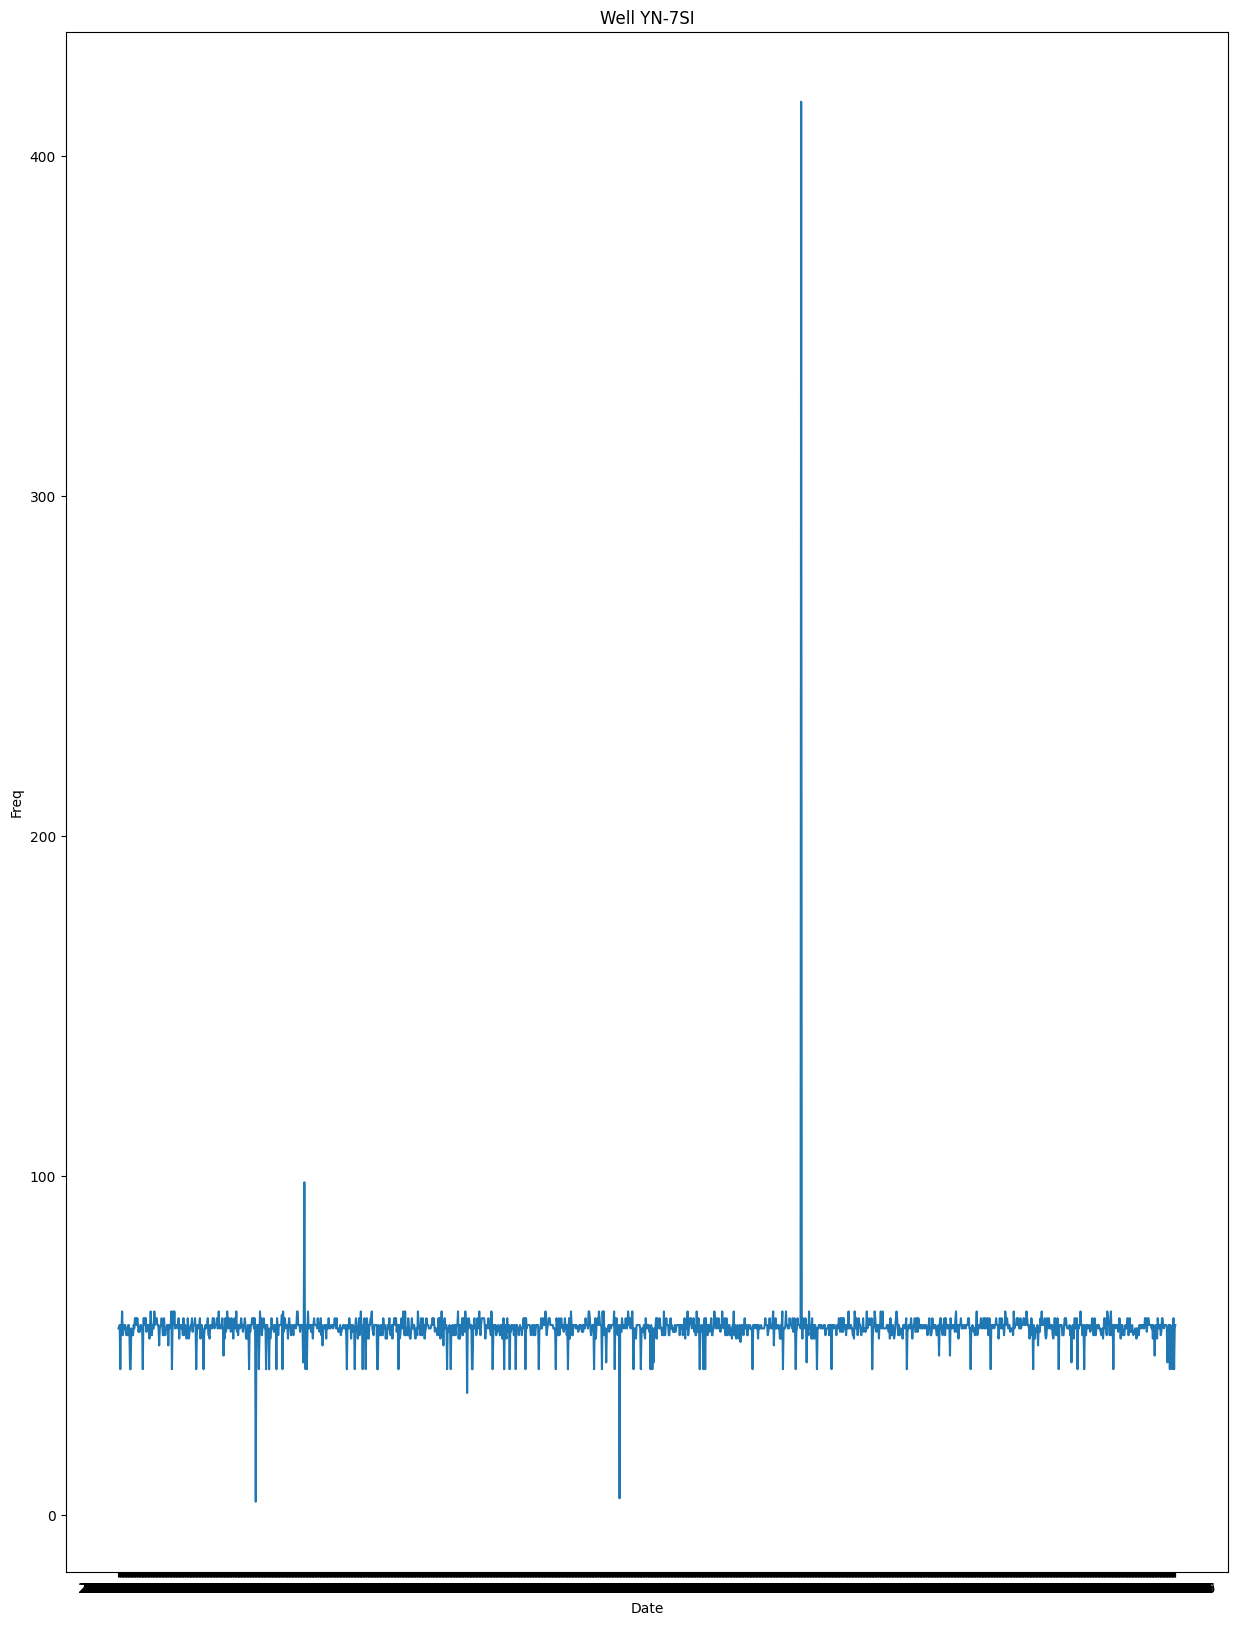

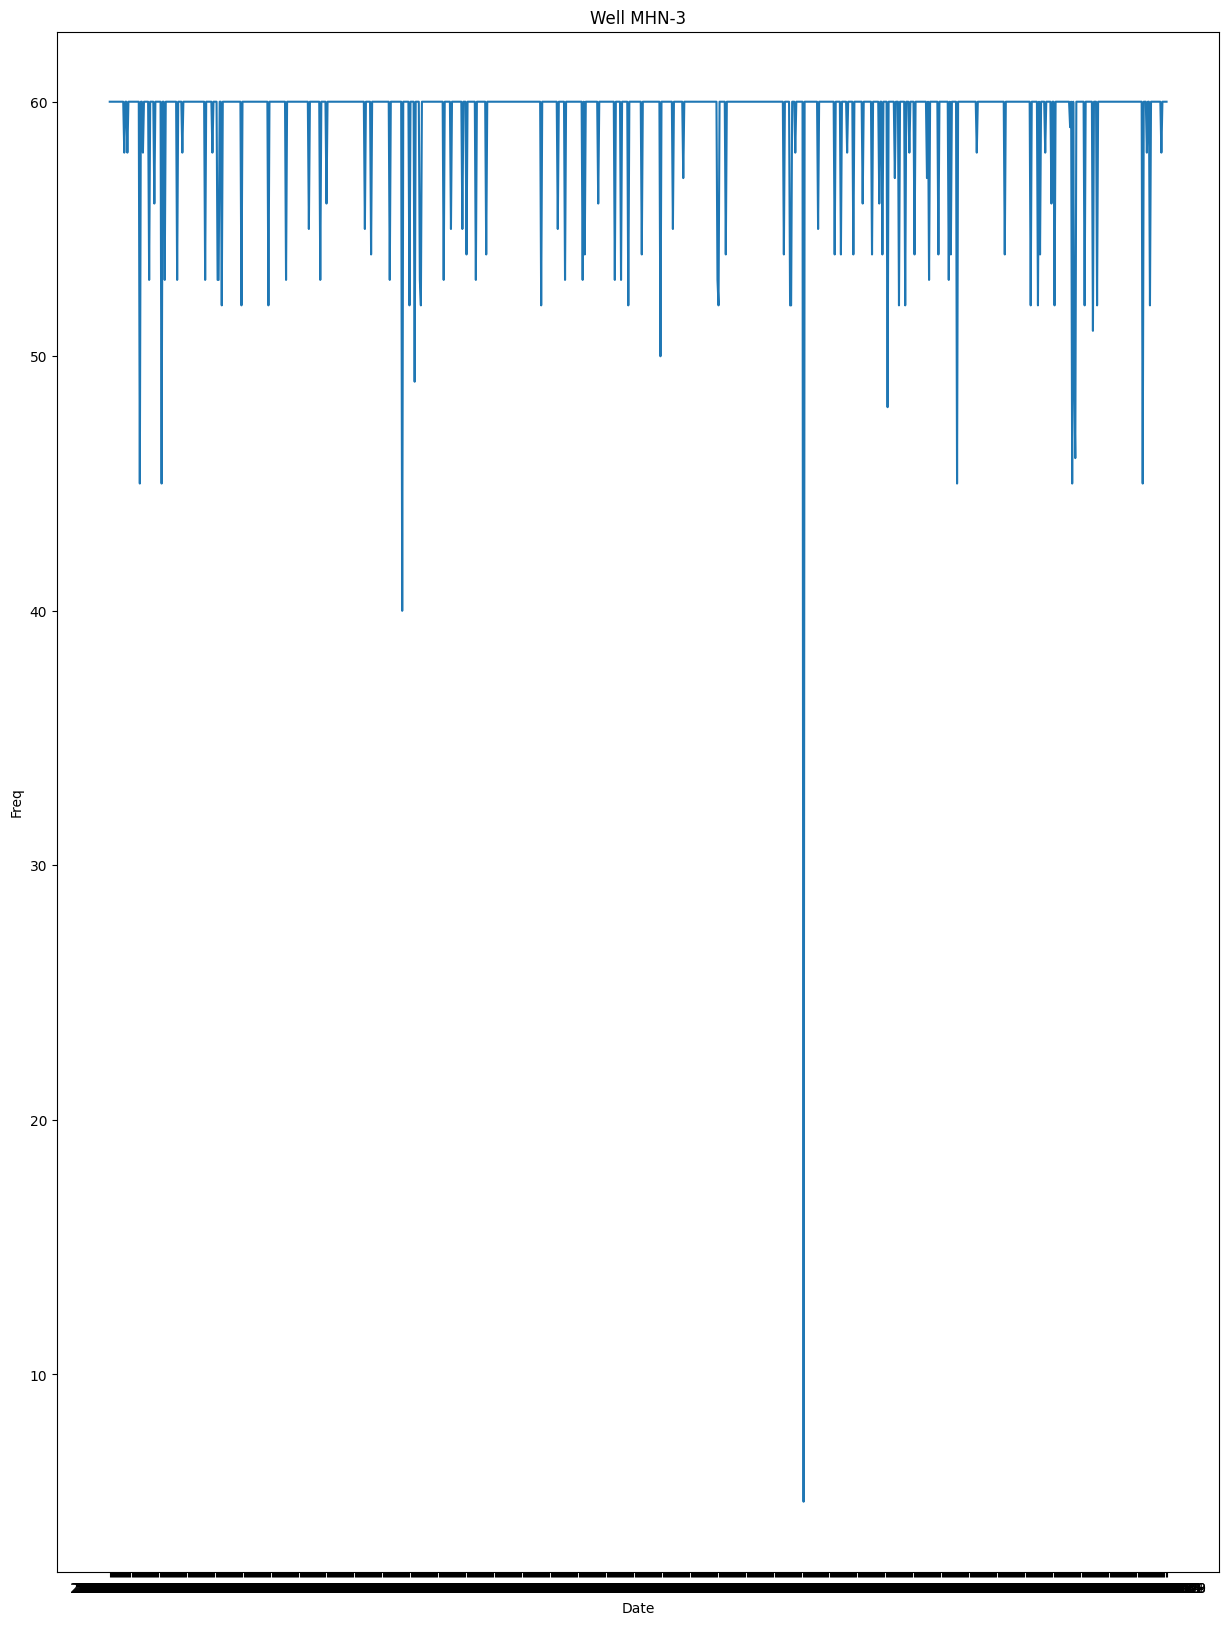

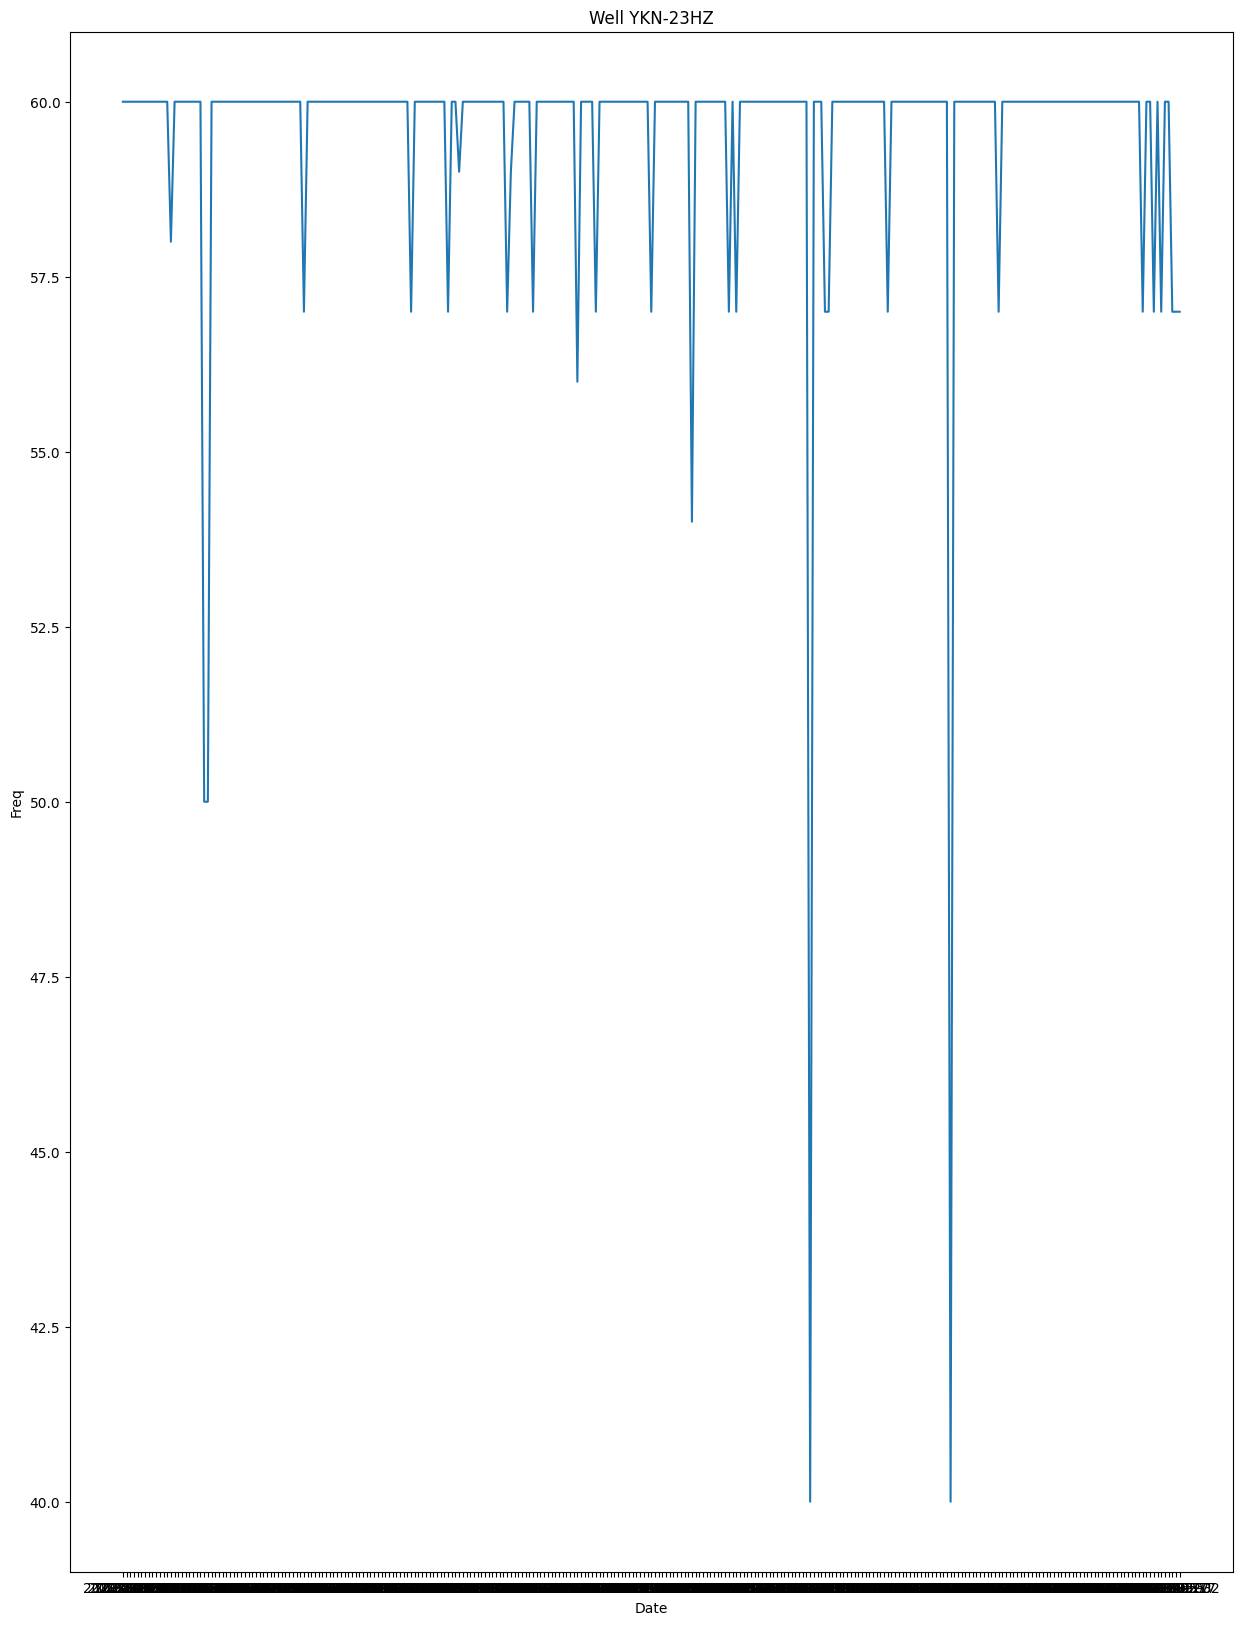

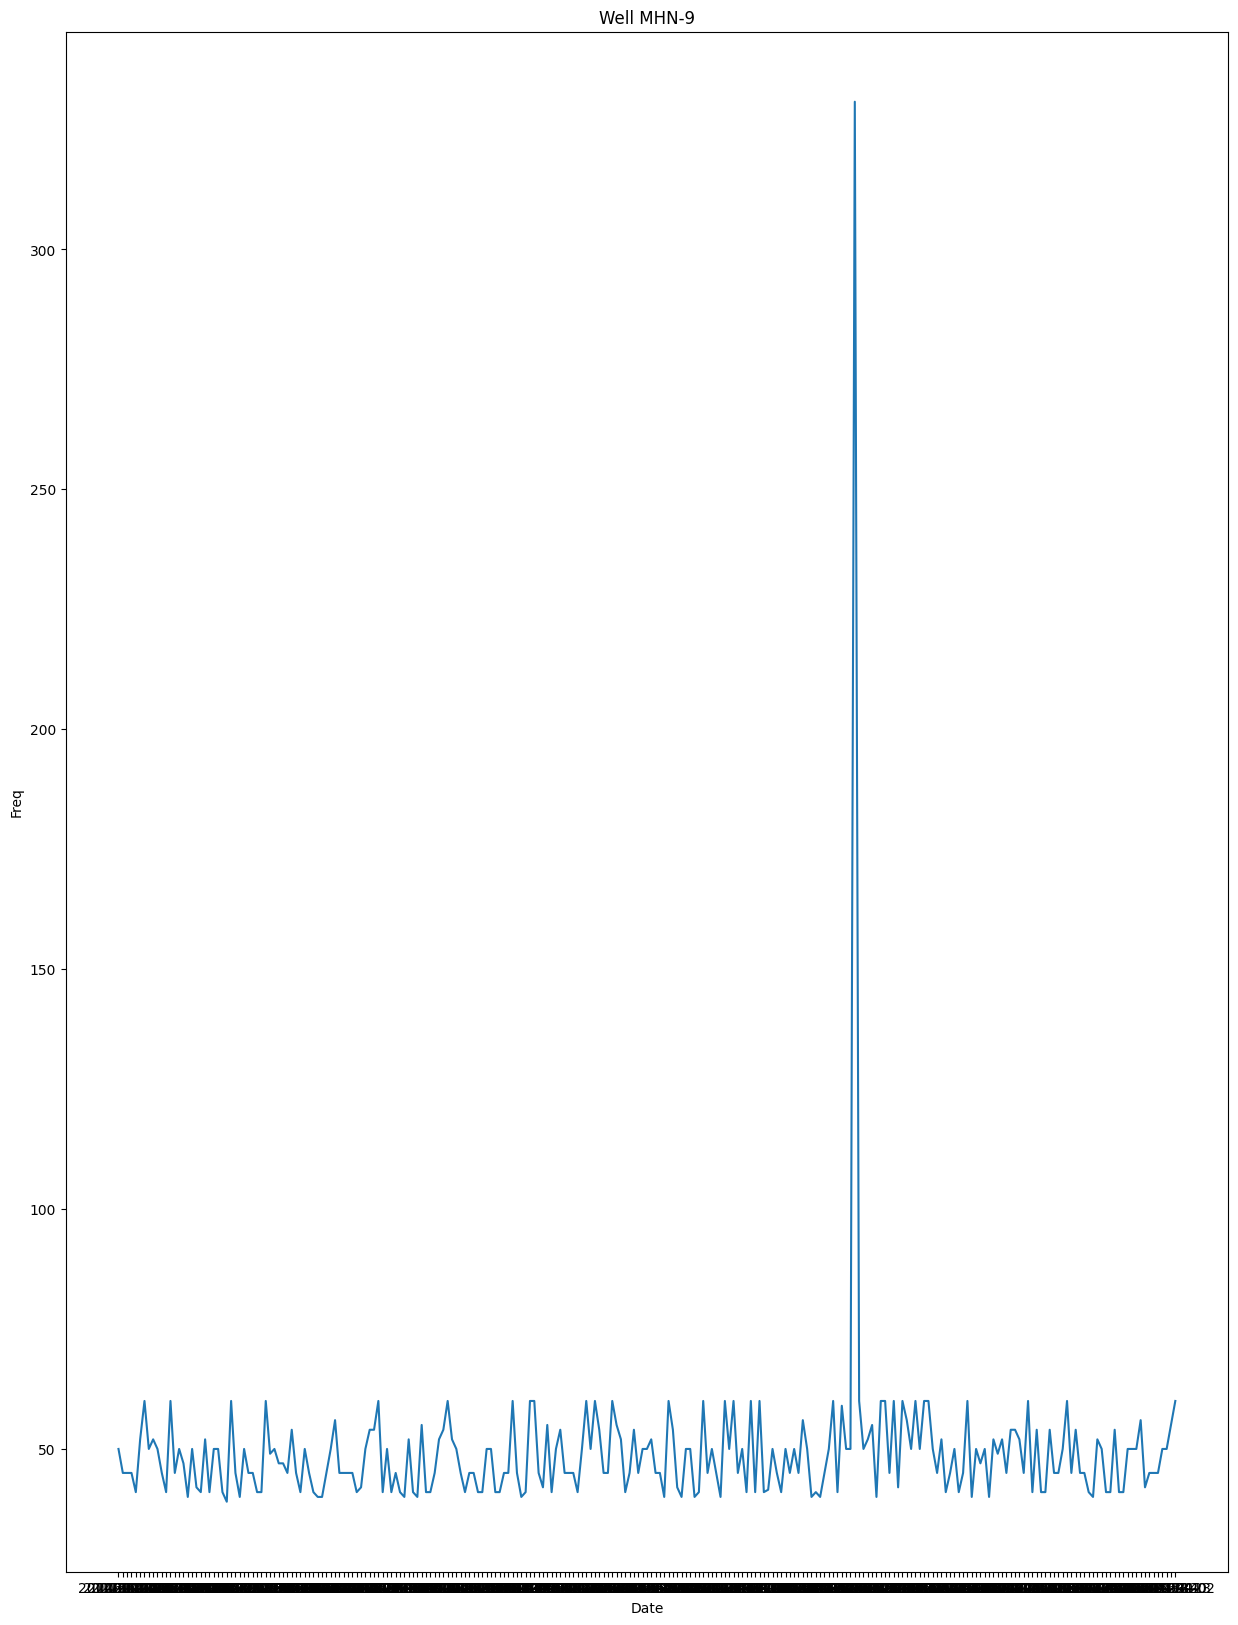

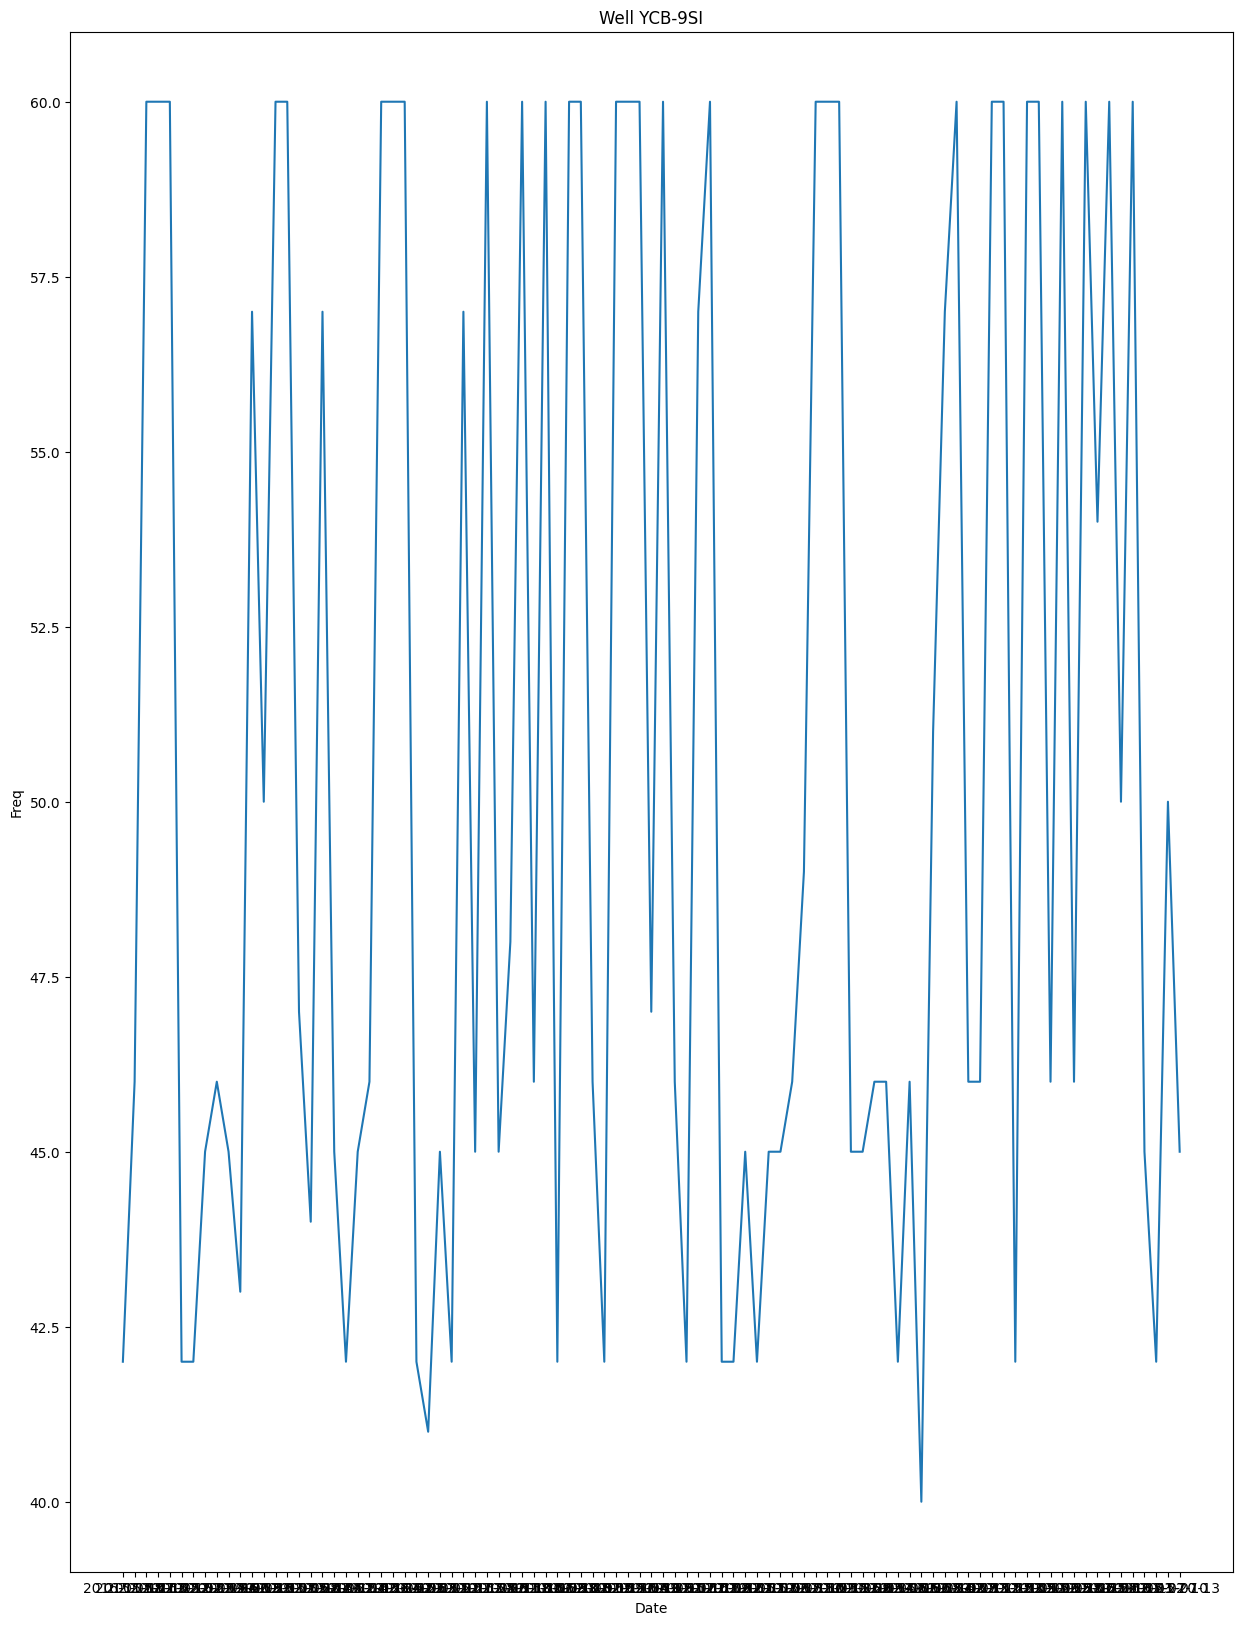

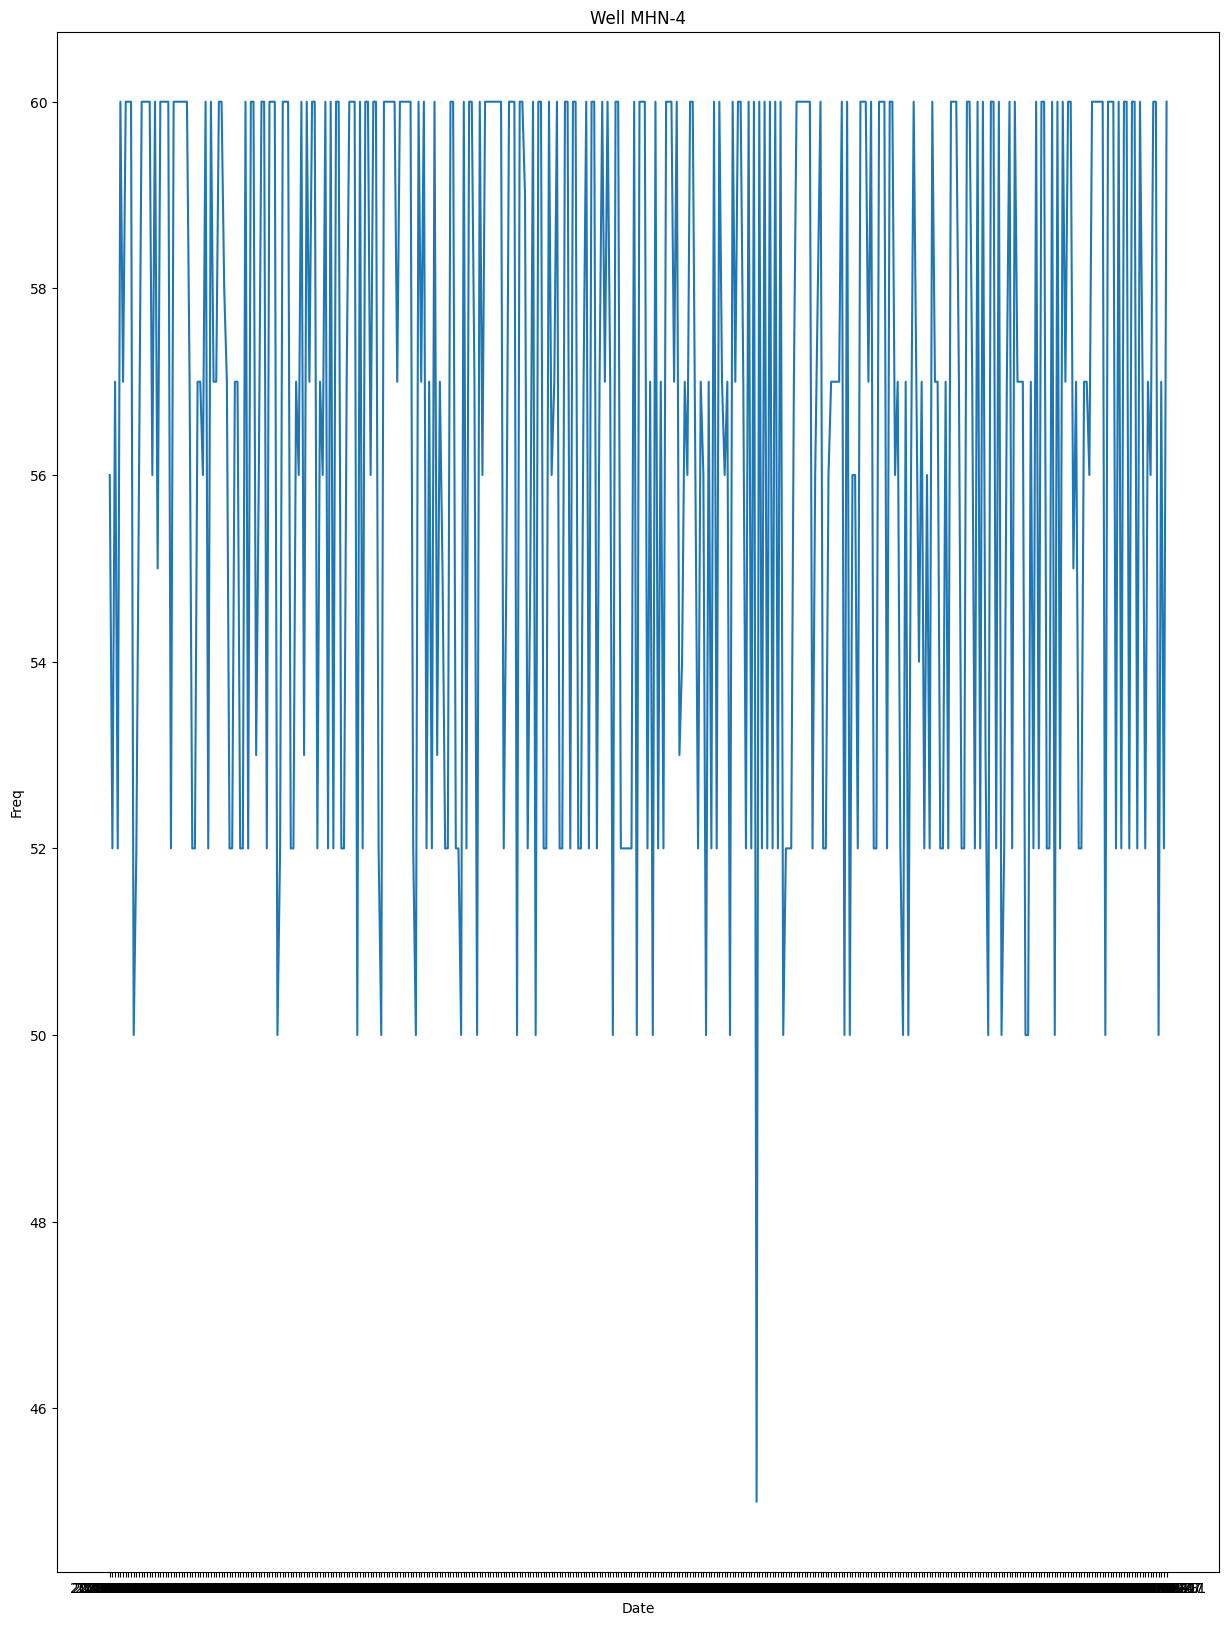

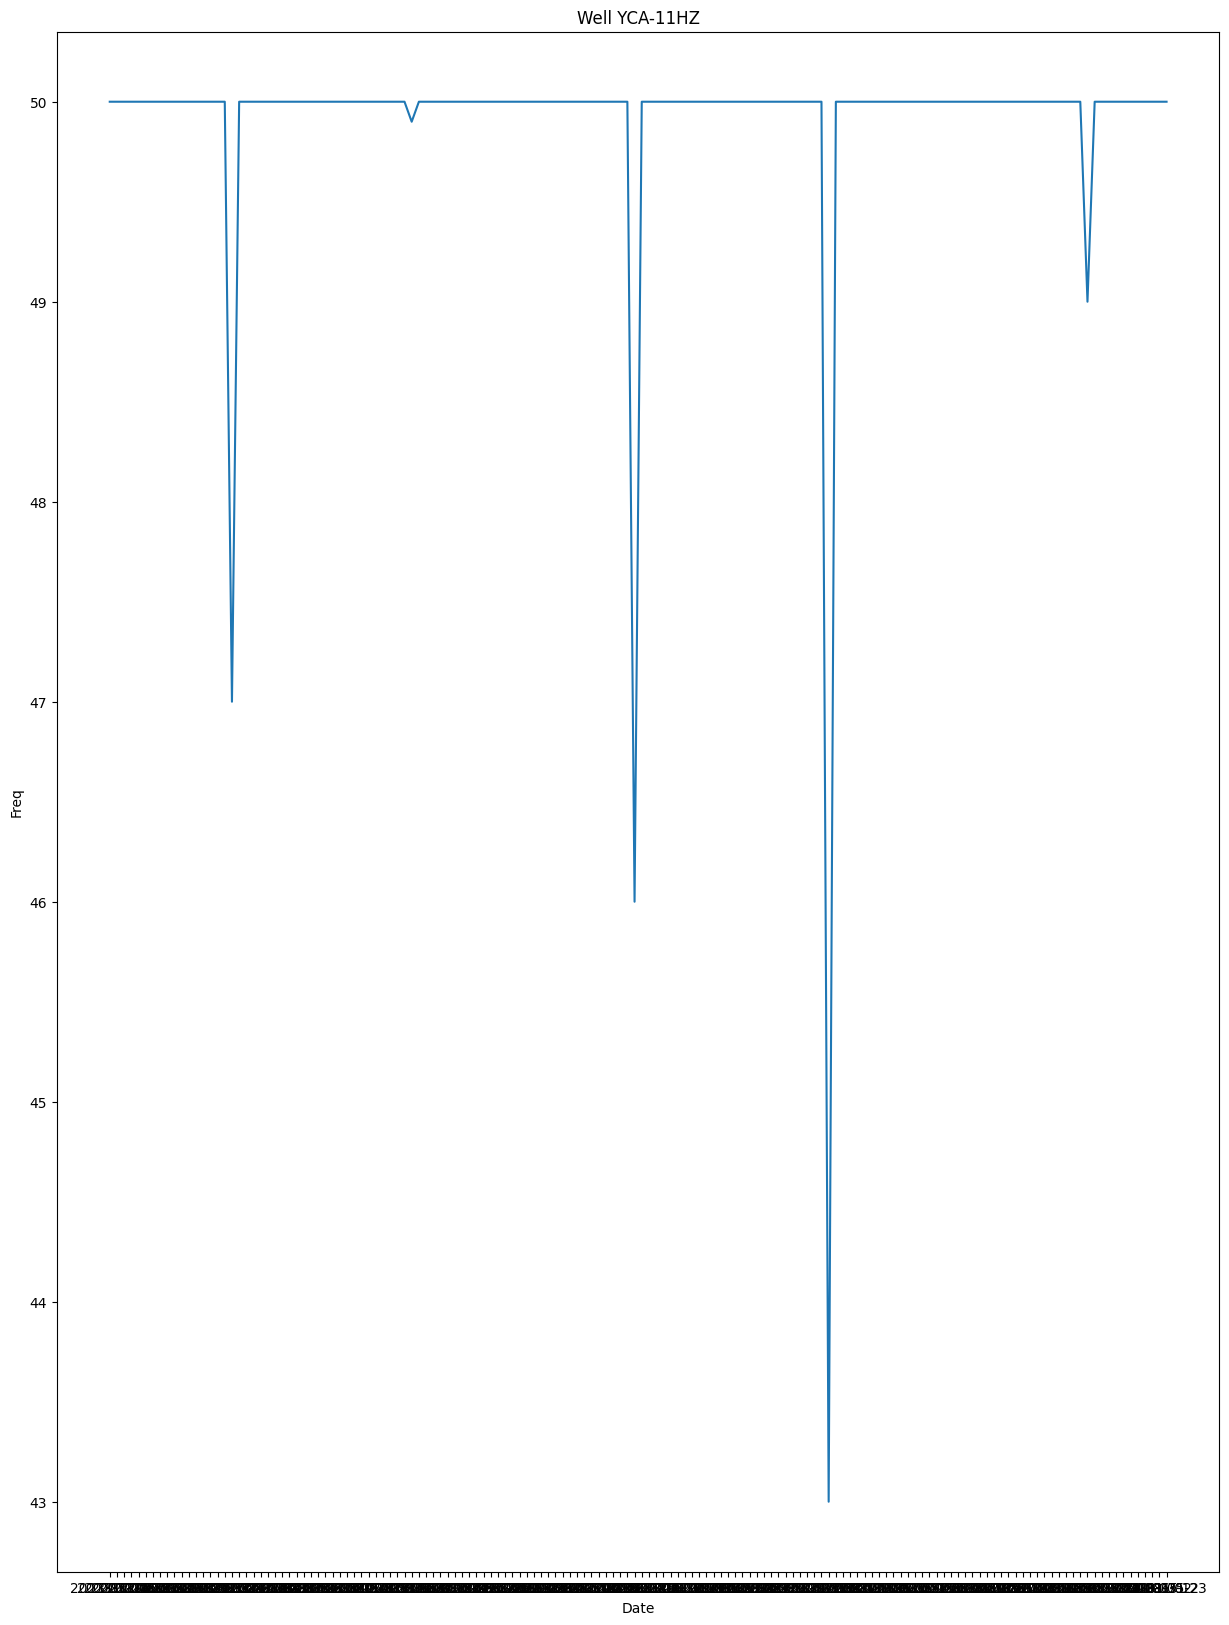

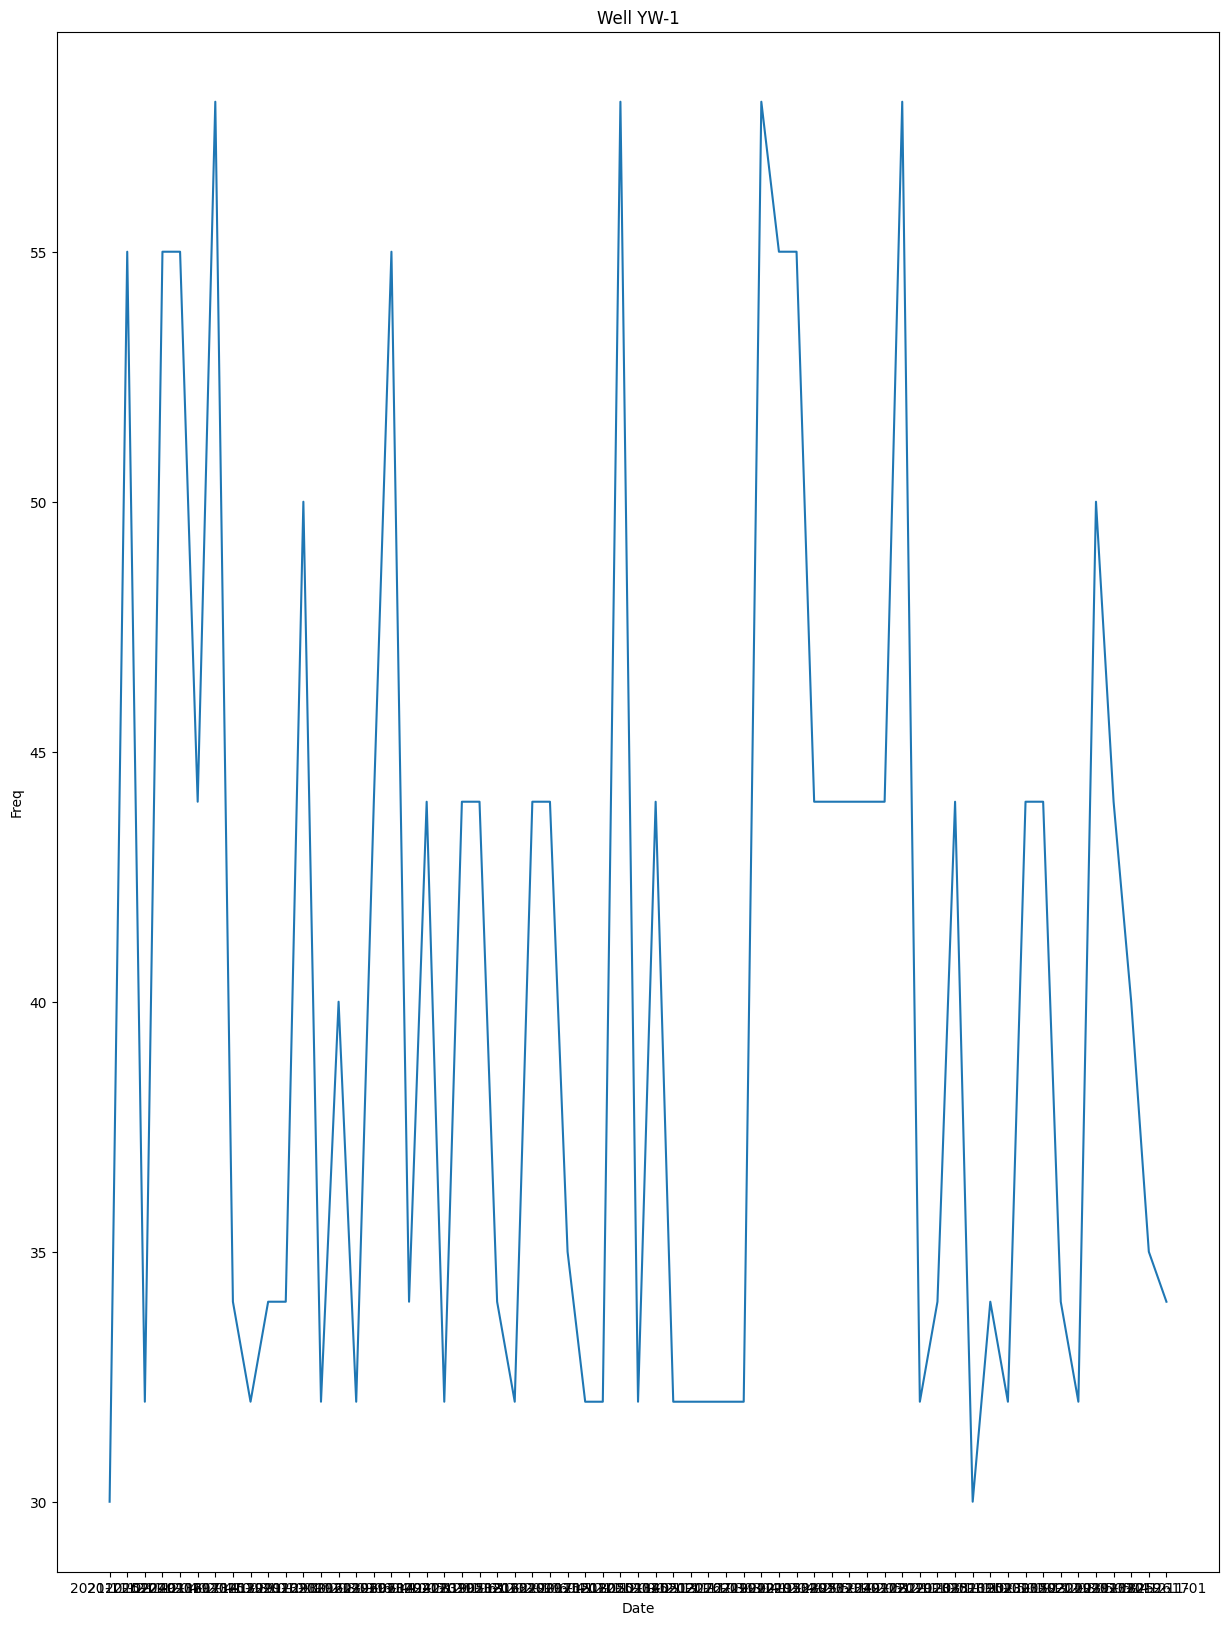

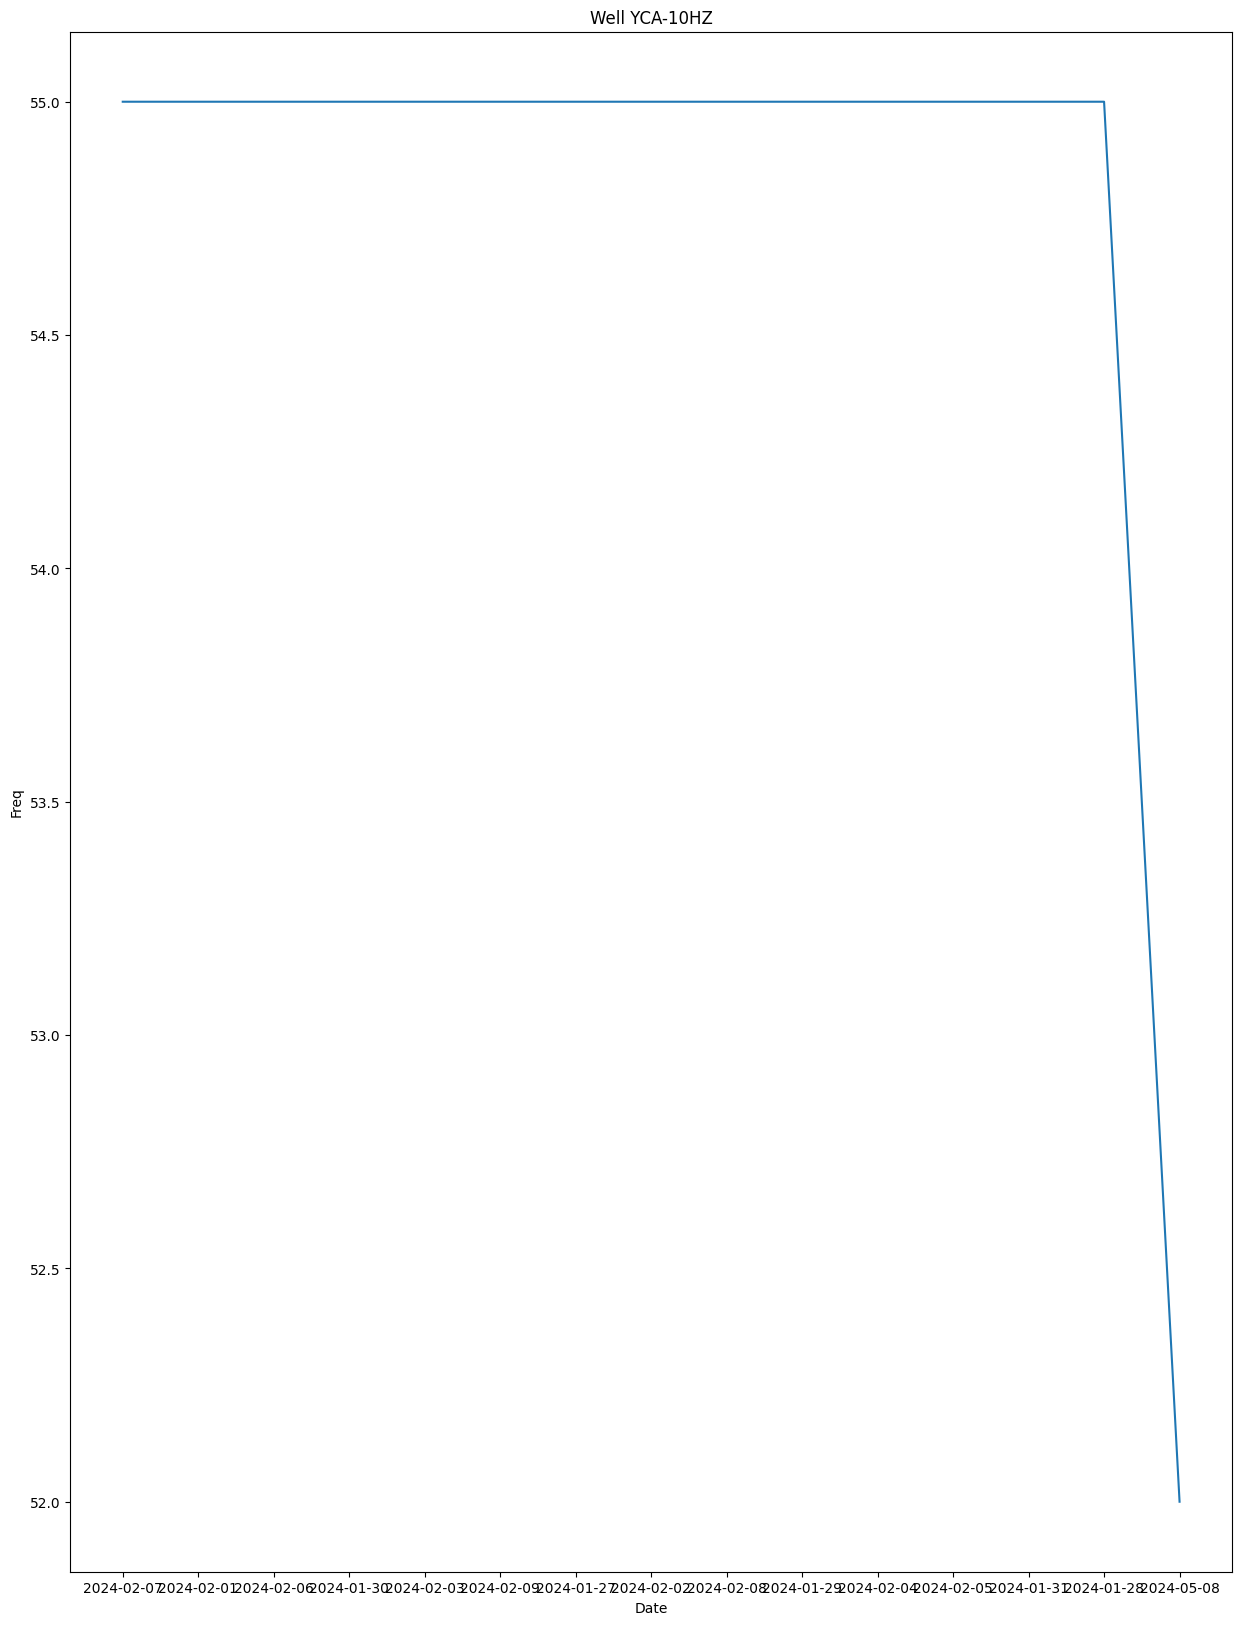

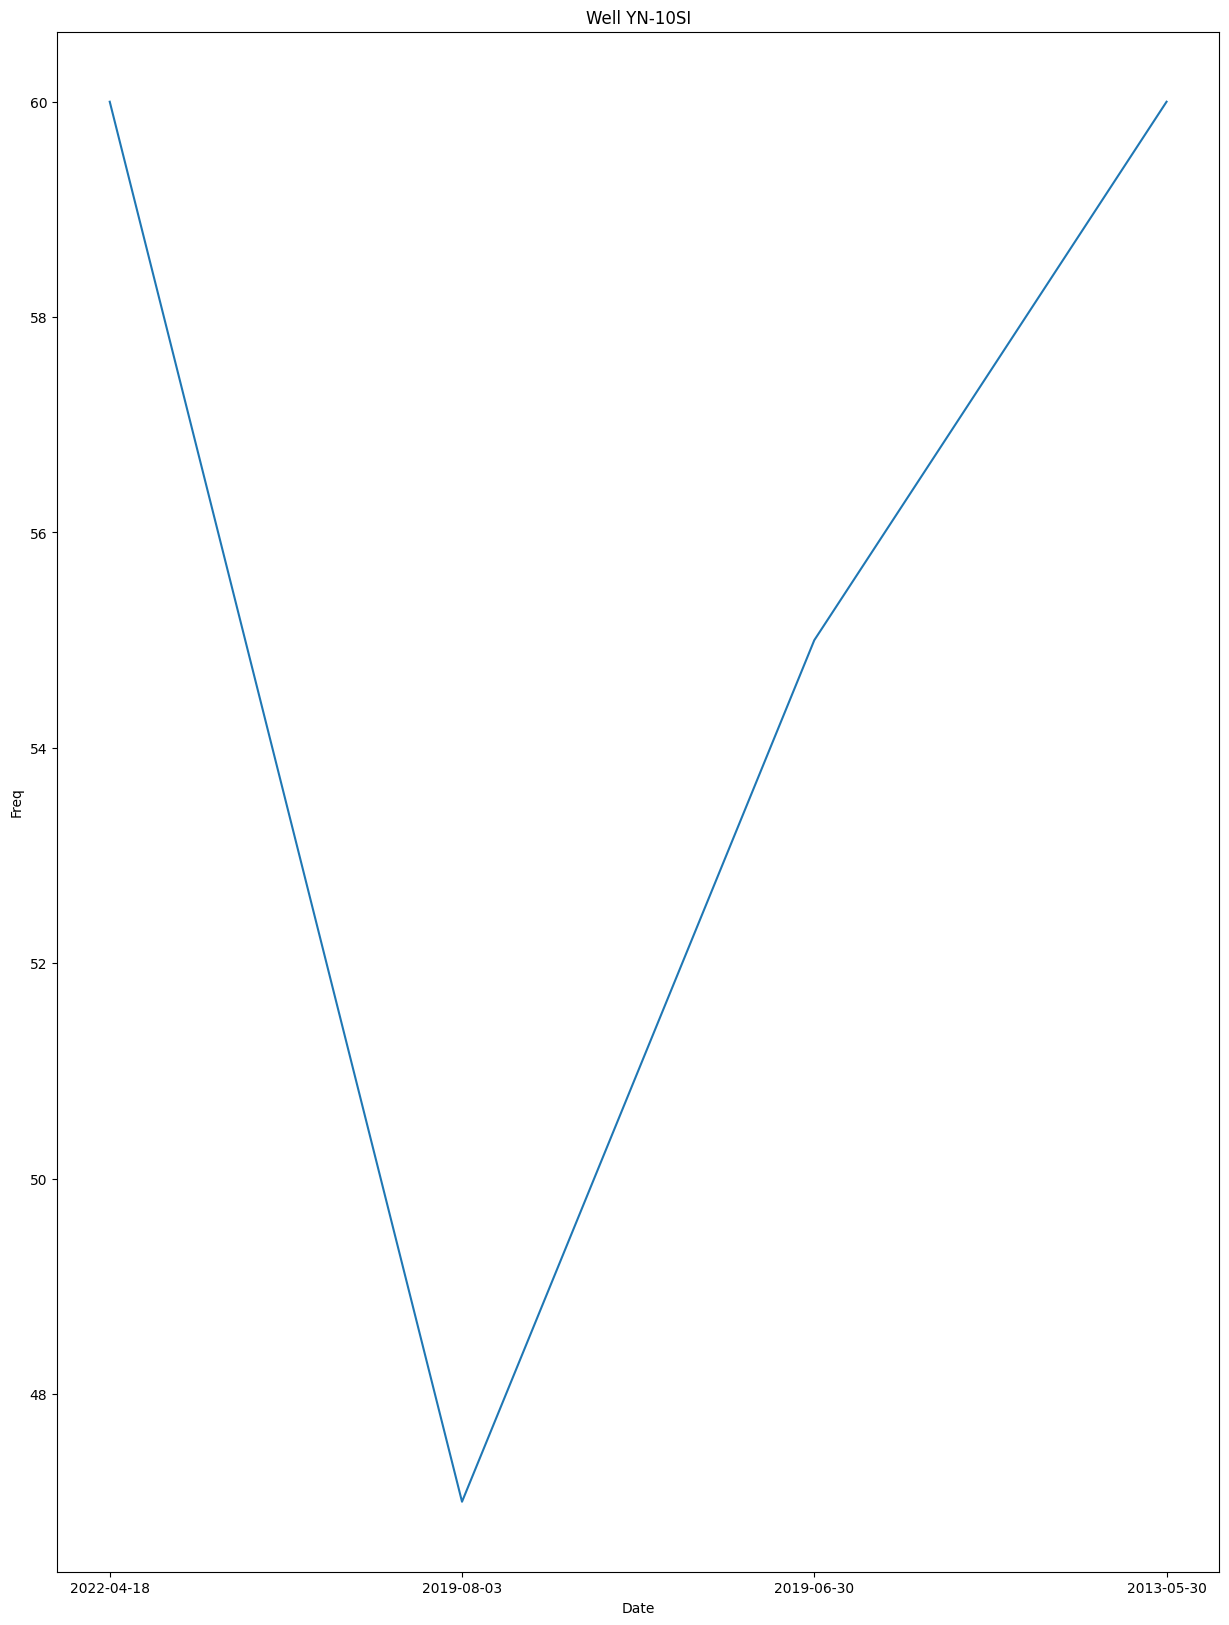

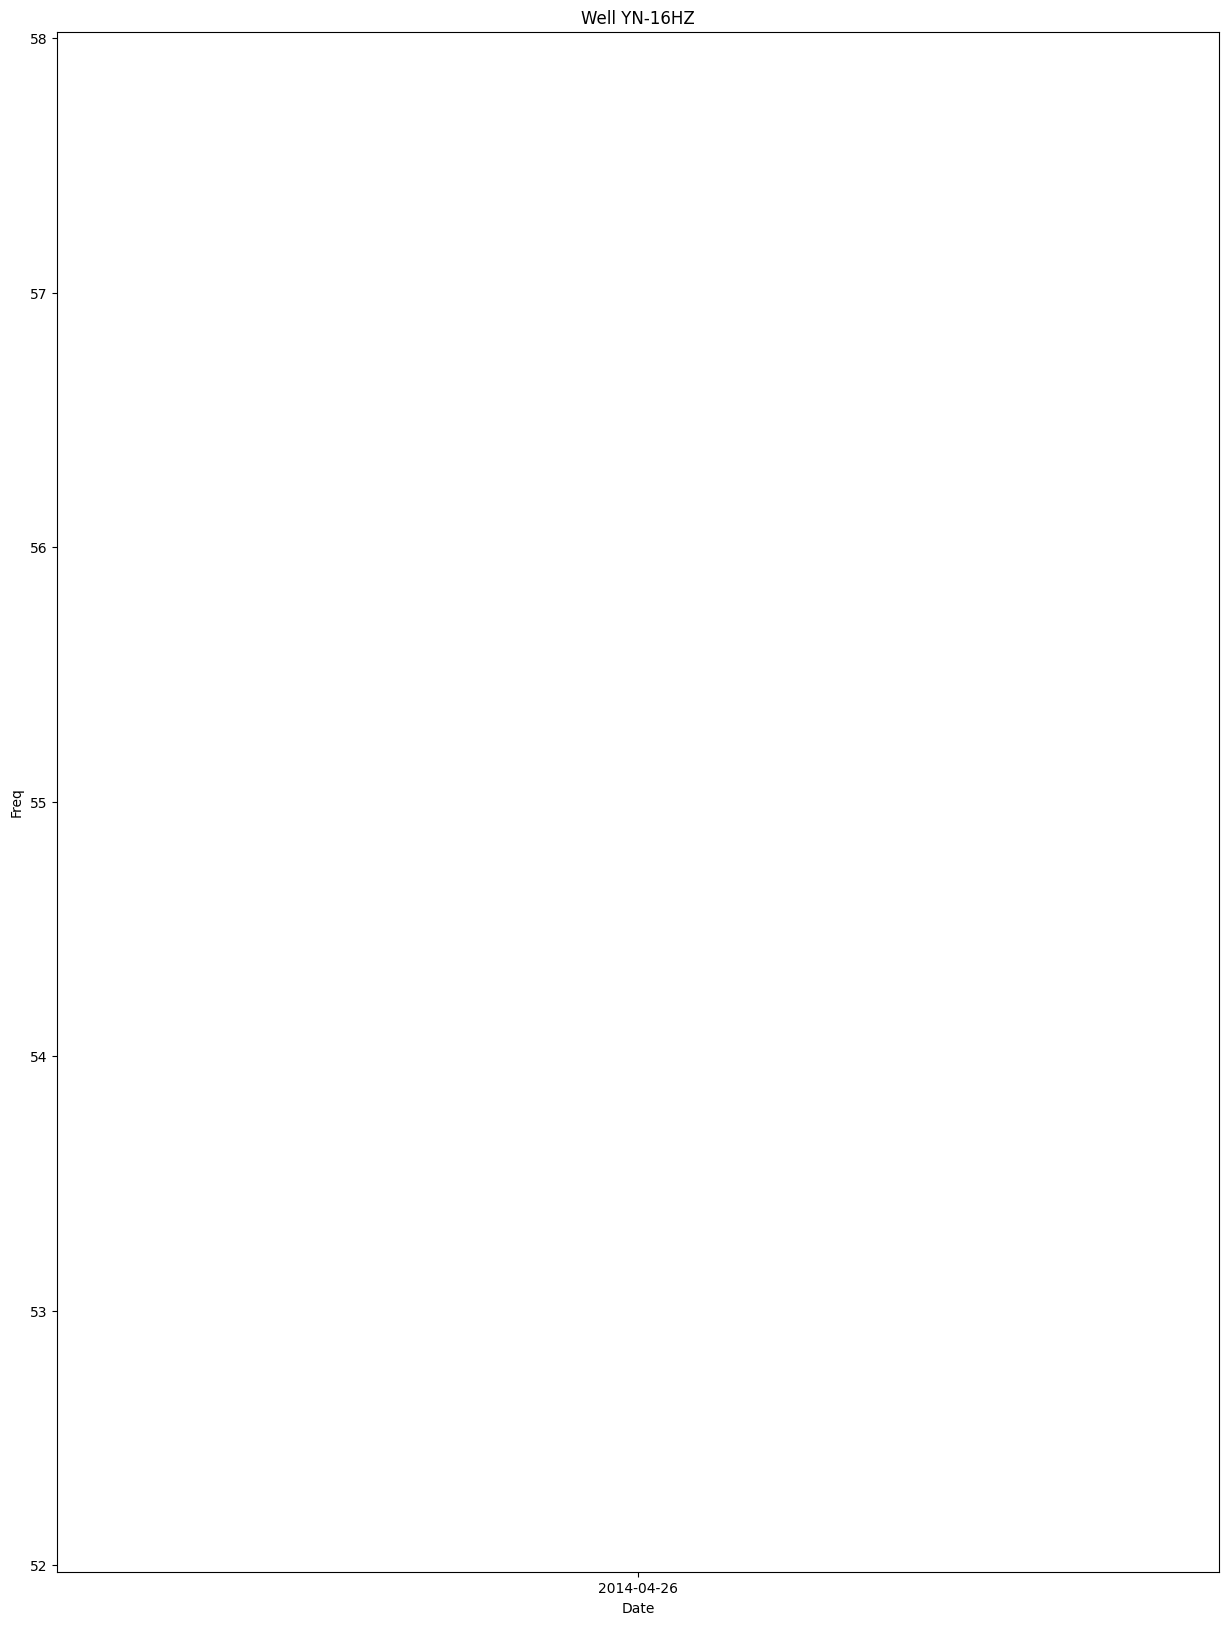

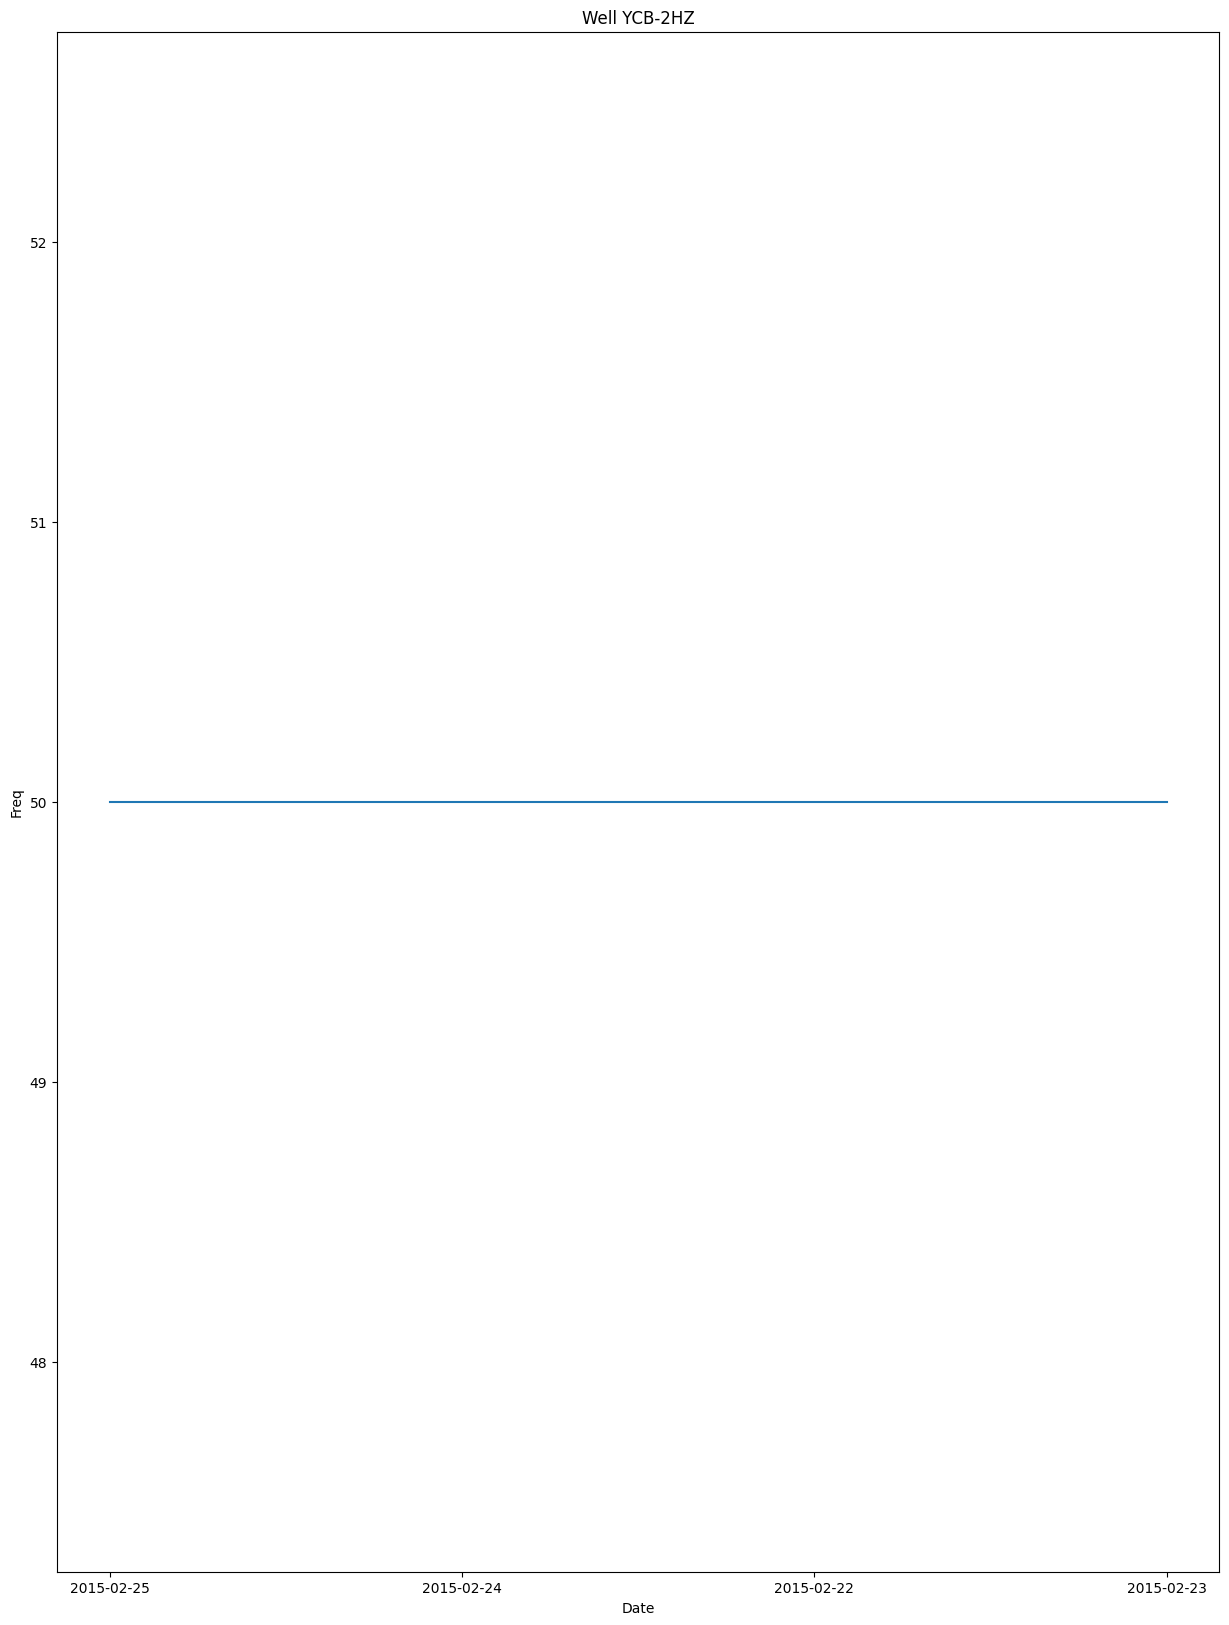

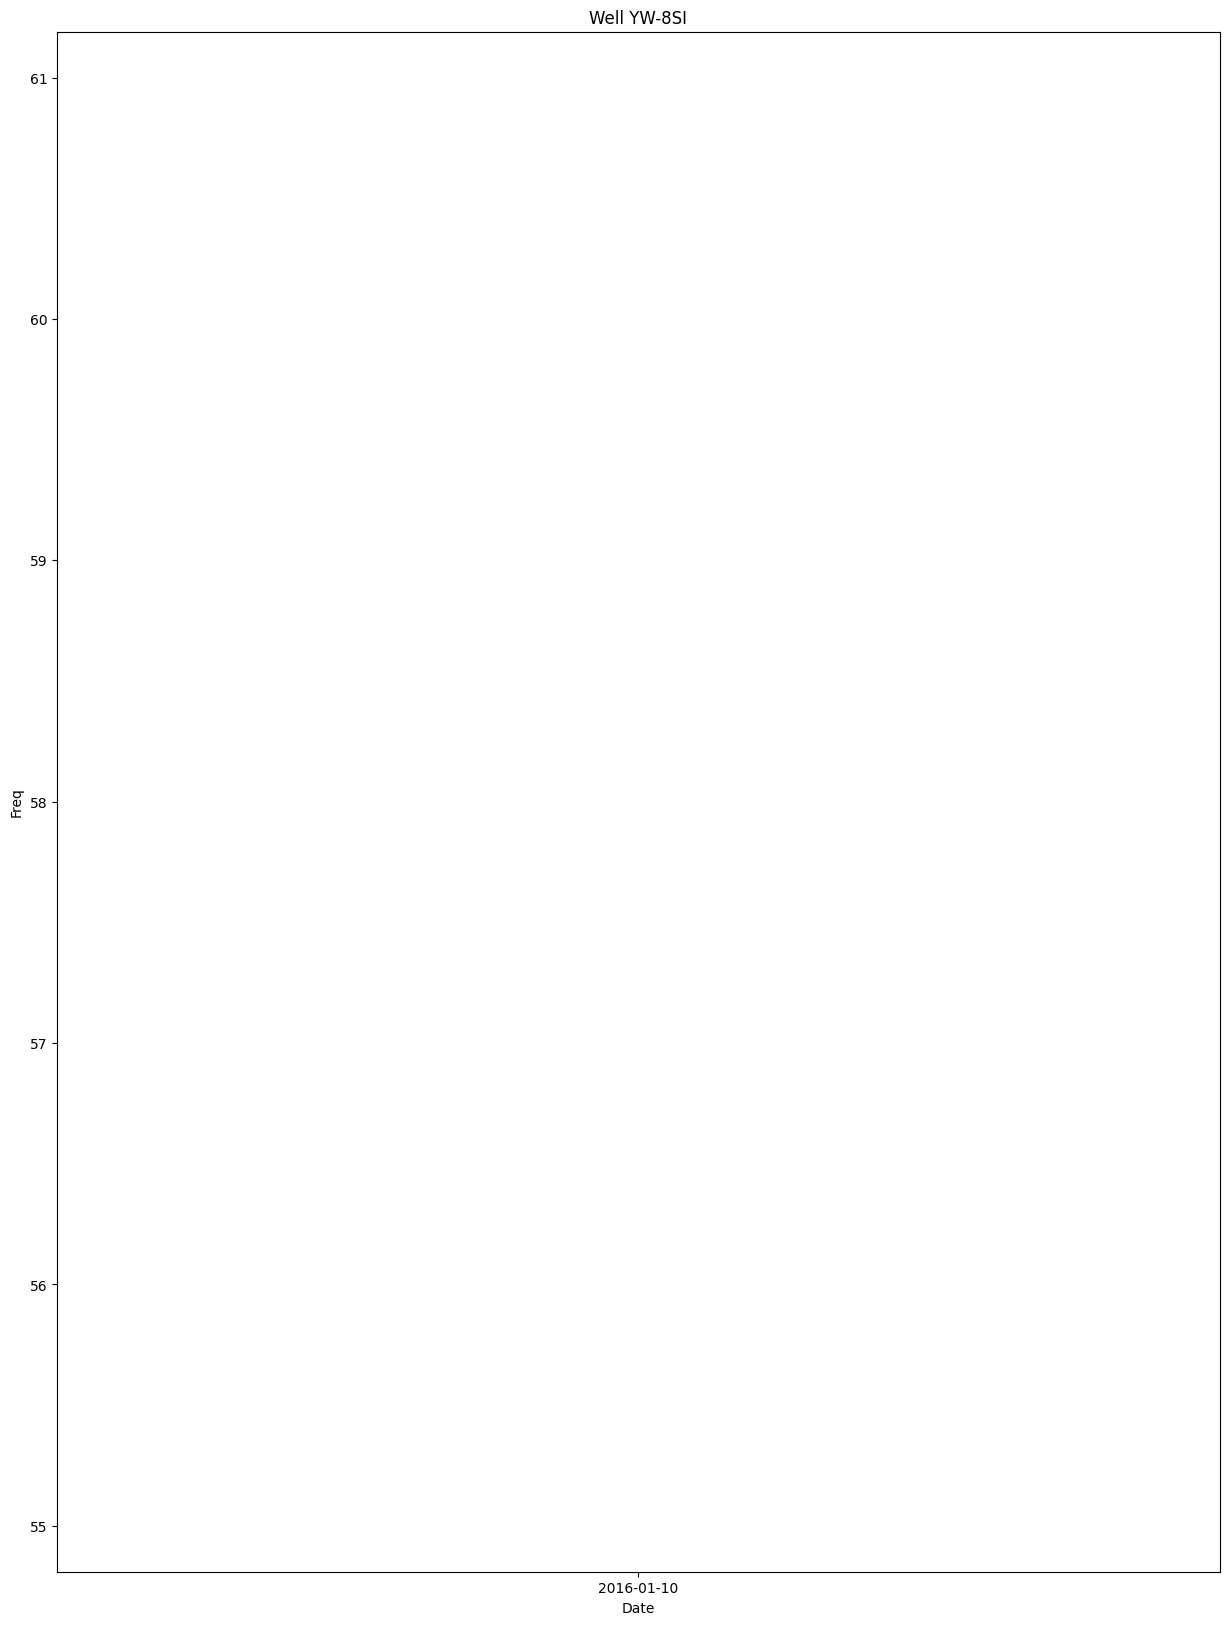

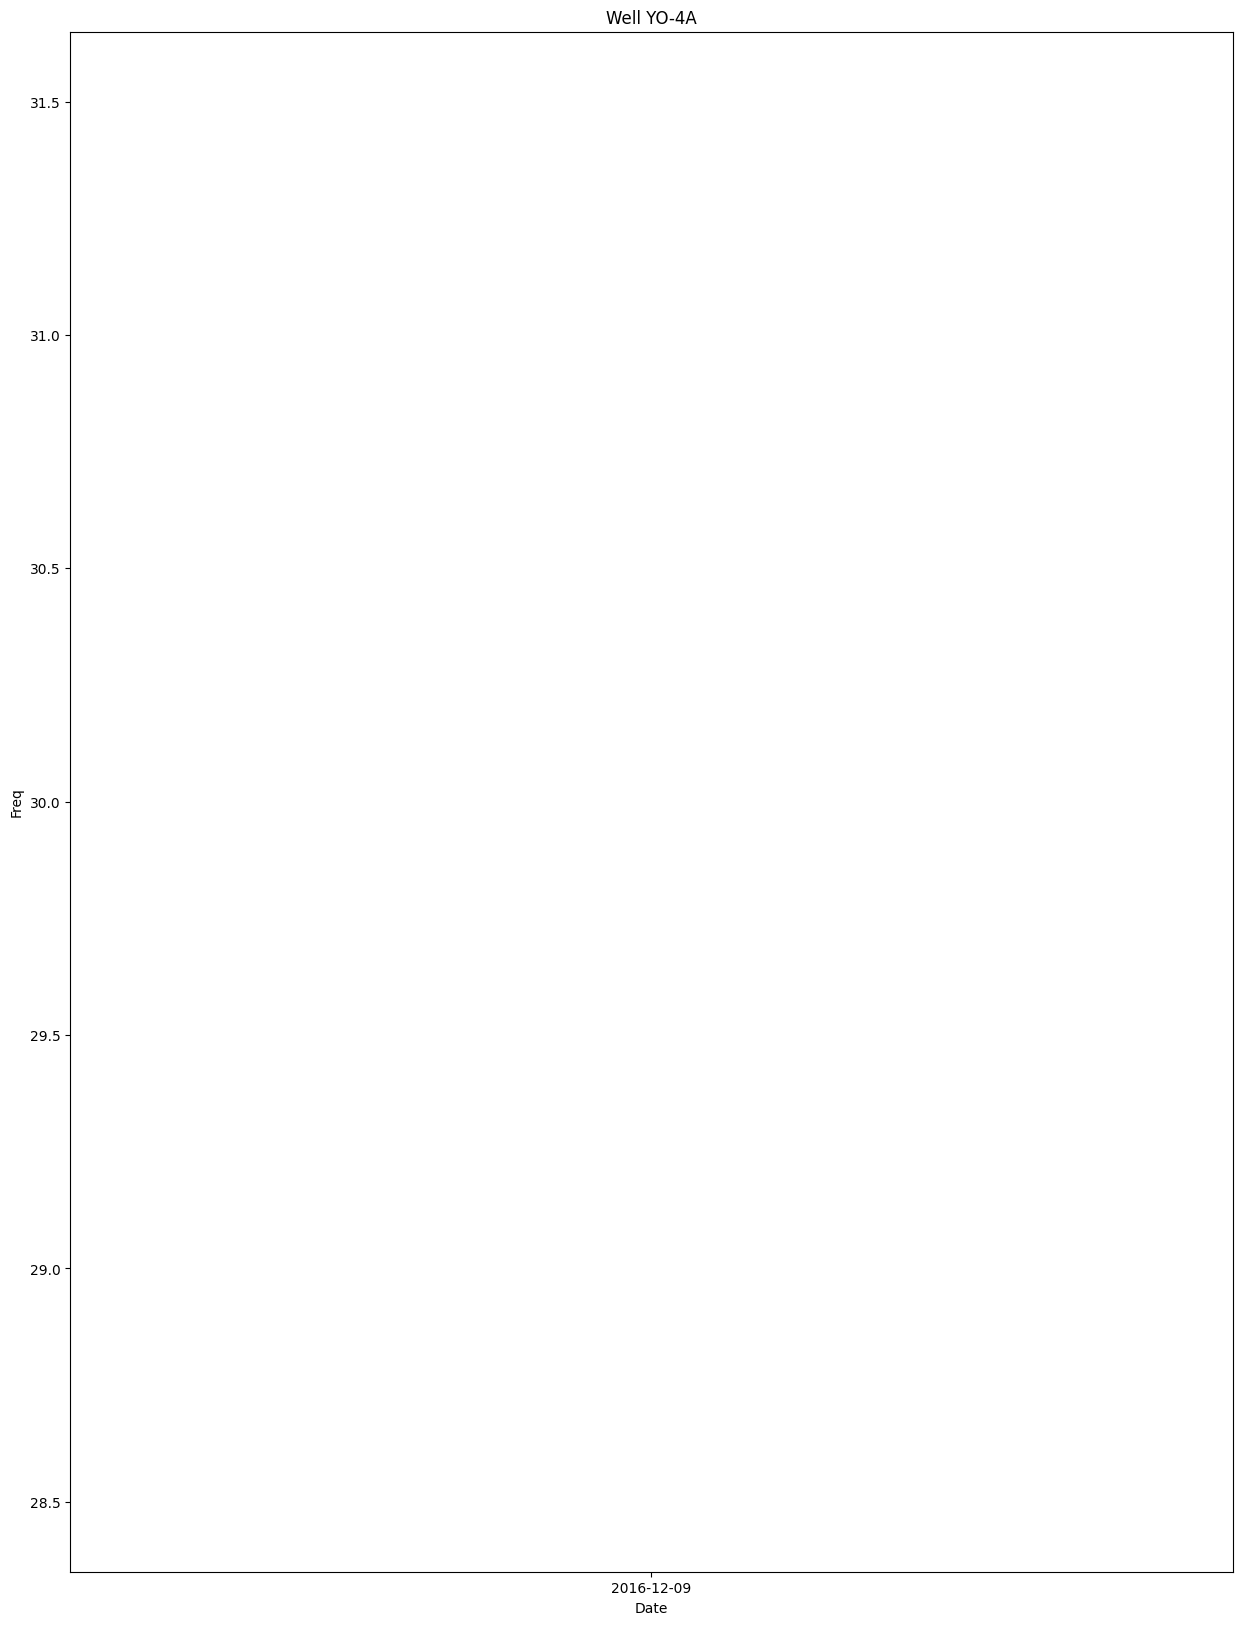

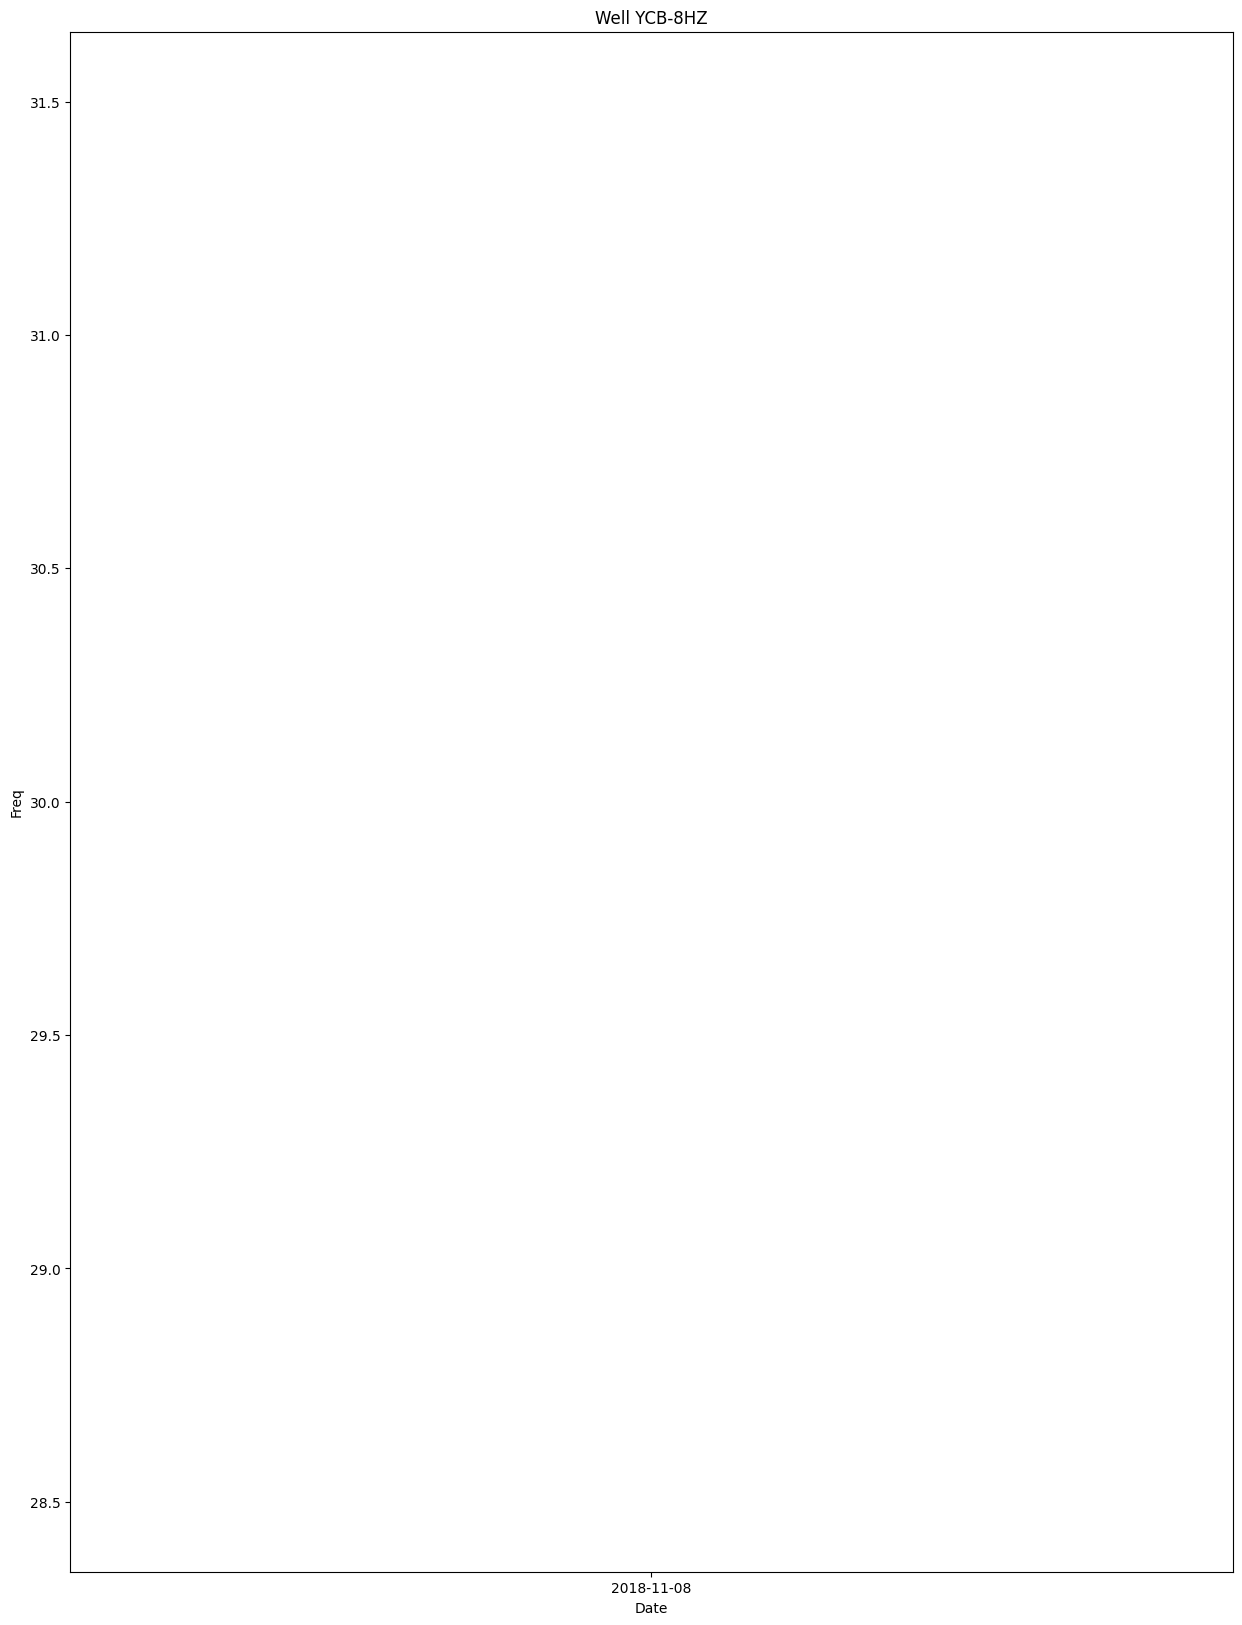

In [45]:
plot_freq(train,well_dict)